# Выпускной проект.   Анализ клиентов регионального банка, сегментация пользователей по количеству используемых продуктов  

**Материалы:**  
[Презентация](https://disk.yandex.com.am/d/cvLMgR7sPMoU3A)

**Описание проекта:**  
В региональном банке в последнее время увеличился отток клиентов. Отдел маркетинга просить подготовить сегментацию клиентов по количеству используемых продуктов банка и признаку отточности для дальнейшей стратегии по привлечению новых клиентов и удержанию имеющихся.


**Цель проекта:**  
- анализ клиентов регионального банка
- анализ клиентов по признаку отток
- сегментация клиентов по количеству потребляемых продуктов


**Описание данных:**  
- `user_id` - идентификатор клиентов
- `score` - баллы кредитного рейтинга
- `city` - город 
- `gender` - пол клиента
- `age` - возраст клиента
- `equity` - баллы собственности
- `balance` - баланс на счете на момент выгрузки данных
- `products` - количество продуктов, которым пользуется клиент
- `credit_card` - наличие кредитной карты у клиента
- `last_activity` - активный клиент (любая активность за последнее время)
- `est_salary` - среднемесячный доход клиента
- `churn` - признак оттока

**План исследования:**
- выгрузка и предобработка данных
- исследовательский анализ данных:
 - портрет типичного клиента банка, исследование признаков клиента
 - анализ клиентов банка по количеству потребляемых продуктов
 - анализ клиентов банка по признаку отток (портрет клиента)
 - корреляционный анализ
- проверка статистических гипотез
- промежуточный вывод (определение основных показателей для сегментации клиентов)
- сегментация клиентов по выделенным признакам
- итоговые выводы и рекомендации

## Шаг 1. Выгрузка и предобработка данных

In [82]:
#!pip install phik
#!pip3 install seaborn==0.13.0
#!pip install --upgrade matplotlib

In [2]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import phik
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from scipy import stats as st
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

In [3]:
# загружаем данные:

try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
except:
    data = pd.read_csv(r'C:\Users\ANDREY\Documents\datasets\bank_scrooge.csv', sep = ',')

In [4]:
# функция для вывода необходимых характеристик датафрейма

def data_info(data):
    print(f'\033[1;30m количество строк: \033[0m {data.shape[0]} \n \
          \n\033[1;30m количество столбцов: \033[0m {data.shape[1]}\n')
    print('\033[1;30m информация о датафрейме: \033[0m\n')
    data.info()
    print('\n\033[1;30m первые пять строк датафрейма: \033[0m')
    display(data.head())
    print('\n\033[1;30m количество пропусков в столбцах: \033[0m')
    display(data.isna().sum().sort_values())
    print('\n\033[1;30m количество явных дубликатов: \033[0m', data.duplicated().sum())
    print('\n\033[1;4;30m описание числовых столбцов: \033[0m')
    display(data.describe())

In [5]:
print('\n\033[7;30m файл: bank_scrooge \033[0m\n')
data_info(data)


 файл: bank_scrooge 

 количество строк:  10000 
           
 количество столбцов:  12

 информация о датафрейме: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB

 первые пять строк датафрейма: 


USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1


 количество пропусков в столбцах: 


USERID              0
score               0
city                0
gender              0
equity              0
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
age                26
balance          2295
dtype: int64


 количество явных дубликатов:  0

 описание числовых столбцов: 


USERID         score          age        equity       balance  \
count   10000.00000  10000.000000  9974.000000  10000.000000  7.705000e+03   
mean   171814.71260    848.699400    42.734409      2.627600  8.277943e+05   
std     33708.23812     65.448519    12.179971      1.980836  1.980614e+06   
min     94561.00000    642.000000    18.000000      0.000000  0.000000e+00   
25%    142810.25000    802.000000    33.000000      0.000000  2.955542e+05   
50%    172728.00000    853.000000    40.000000      3.000000  5.242722e+05   
75%    201261.75000    900.000000    51.000000      4.000000  9.807058e+05   
max    229145.00000   1000.000000    86.000000      9.000000  1.191136e+08   

           products   credit_card  last_activity    EST_SALARY         churn  
count  10000.000000  10000.000000   10000.000000  1.000000e+04  10000.000000  
mean       1.870100      0.680400       0.523500  1.478669e+05      0.182000  
std        0.792647      0.466345       0.499472  1.393885e+05      0.385864  
min        0.000000      0.000000       0.000000  2.546300e+03      0.000000  
25%        1.000000      0.000000       0.000000  7.525190e+04      0.000000  
50%        2.000000      1.000000       1.000000  1.196581e+05      0.000000  
75%        2.000000      1.000000       1.000000  1.745005e+05      0.000000  
max        5.000000      1.000000       1.000000  1.395064e+06      1.000000

Первые выводы по данным:
- в наших данных 10 тысяч строк. 
- названия столбцов приведем к нижнему и змеиному регистру где это необходимо
- имеются пропуски в столбцах с возрастом клиента и балансом на счете
- в столбце с возрастом поменяем тип данных на int
- явные дубликаты отсутствуют
- минимальный возраст клиента - 18 лет, максимальный - 86. 75% клиентов моложе 51 года
- в столбце balance - медианное значение ~ 500 тысяч, когда среднее ~ 800 тысяч, что говорит нам о сильном разброс значений (минимальное значение 0, максимальное почти 120 миллионов)
- также сильный разброс значений в столбце с оценочным доходом клиентов - минимальное значение 2.5 тысячи, максимальное - 1.4 миллионов, при этом среднее значение ~ 150 тысяч, медианное ~ 120 тысяч, у 75% клиентов оценочный доход менее 175 тысяч. 
- по предоставленным данным отток клиентов составляет 18%  

**Названия столбцов**

In [6]:
# приведем названия столбцов к нижнему/змеиному регистру

data.rename(columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'}, inplace=True)

**Уникальные значения**

In [7]:
# рассмотрим уникальные значения в столбцах

for columns in data[['score', 'city','gender', 'age', 'equity', 'balance', 'products', 'credit_card',\
                     'last_activity', 'est_salary', 'churn']]:
    print(f'\nуникальные значения в столбце \033[1;4;30m{columns}\033[0m\n',data[columns].unique())


уникальные значения в столбце score
 [ 850.  861.  892.  866.  730.  856.  807.  825.  923.  906.  927.  921.
  845.  837.  815.  731.  829.  793.  876.  922.  772.  896.  871.  732.
  898.  806.  766.  776.  868.  946.  828.  786.  944.  863.  822.  794.
  924.  811.  814.  956.  935.  826.  849.  901.  893.  792.  888.  831.
  748.  820.  860.  914.  930.  948.  789.  737.  812.  933.  809.  749.
  873.  859.  950.  937.  835.  768.  767.  785.  846.  750.  816.  894.
  891.  788.  758.  787.  821.  855.  779.  791.  838.  971.  797.  841.
  915.  985.  870.  897.  763.  774.  686. 1000.  875.  819.  869.  854.
  810.  761.  802.  958.  917.  745.  736.  908.  928.  884.  853.  780.
  726.  881.  975.  852.  965.  899.  890.  836.  818.  880.  795.  916.
  775.  902.  918.  842.  771.  895.  801.  721.  966.  804.  885.  986.
  753.  832.  979.  798.  754.  756.  823.  658.  734.  954.  827.  929.
  760.  688.  659.  817.  718.  705.  920.  652.  649.  862.  770.  824.
  934.  952. 

- видим уже выявленные пропуски в столбцах с возрастом клиентов и балансом на счете
- баллы кредитного рейтинга распределены от 642 до 1000
- всего в наших данных три города: Рыбинск, Ярославль и Ростов, добавим в данные столбцы с бинарными обозначениями для каждого города
- пол клиента представлен как "М" и "Ж", для работы с этим столбцом заменим данные на 0 - мужской, 1 - женский
- баллы собственности (equity) представлено в виде чисел от 0 до 9
- количество продуктов клиентов (products) представлено в виде чисел от 0 до 5
- столбец credit_card показывает имеется ли у клиента кредитная карта, где 0 - нет, 1 - да
- столбец last_activity говорит о факте любой активности клиента за последнее время, где 0 - нет, 1 - да
- признак оттока (churn) выражен 1 - факт оттока, 0 - клиент не в оттоке  

**Распределение клиентов по признакам**

In [8]:
# рассмотрим количество клиентов в разбивке по столбцам

for columns in data[['city','gender', 'age', 'equity', 'products', 'credit_card', 'last_activity', 'churn']]:
    print(f'\nколичество клиентов в разбивке по \033[1;4;30m{columns}\033[0m')
    display(data[columns].value_counts())


количество клиентов в разбивке по city


Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64


количество клиентов в разбивке по gender


М    5005
Ж    4995
Name: gender, dtype: int64


количество клиентов в разбивке по age


36.0    414
37.0    402
33.0    392
35.0    388
34.0    384
       ... 
83.0      3
82.0      2
84.0      2
79.0      2
86.0      2
Name: age, Length: 68, dtype: int64


количество клиентов в разбивке по equity


0    2592
5    1918
4    1850
3    1543
2    1052
1     774
6     161
7      80
8      17
9      13
Name: equity, dtype: int64


количество клиентов в разбивке по products


2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64


количество клиентов в разбивке по credit_card


1    6804
0    3196
Name: credit_card, dtype: int64


количество клиентов в разбивке по last_activity


1    5235
0    4765
Name: last_activity, dtype: int64


количество клиентов в разбивке по churn


0    8180
1    1820
Name: churn, dtype: int64

- больше всего клиентов из Ярославля - 5888 человек, далее следует Рыбинск (2695) и Ростов (1417)
- по половому признаку клиенты распределены практически 50*50 (5005 мужчин и 4995 женщин)
- больше всего клиентов в возрасте 33-37 лет
- по количеству баллов собственности больше всего клиентов с баллом 0 (2592 клиента), далее следуют баллы 5 и 4, меньше всего клиентов с баллом 9 (13 человек)
- по количеству продуктов банка больше всего клиентов у которых 1 или 2 продукта. Есть один клиент у которого нет продукта банка, рассмотрим эту строку ниже.
- у 6804 клиентов имеется кредитная карта
- 5235 клиентов оцениваются как активные клиенты
- 1820 клиентов обозначенны ушедшими в отток  

Сразу рассмотрим строку с нулевым значением в столбце products

In [9]:
data.query('products == 0')

user_id  score     city gender   age  equity  balance  products  \
8957   147837  962.0  Рыбинск      Ж  79.0       3      NaN         0   

      credit_card  last_activity  est_salary  churn  
8957            0              0    25063.96      1

Как мы видим это клиент пенсионного возраста, который не пользуется услугами банка (кредитная карта, как и активность за последнее время - отсутствуют) и уже определен в оттоке.  
Удалим данную строку.

In [10]:
data = data.drop(index=[8957])

**Неявные дубликаты**

In [11]:
# посмотрим на неявные дубликаты

data[data.duplicated(subset=['user_id', 'gender', 'age'], keep=False)]

user_id  score       city gender   age  equity     balance  products  \
3274   155765  863.0  Ярославль      М  30.0       5  1036114.50         5   
5197   155765  923.0    Рыбинск      М  30.0       0         NaN         1   
8205   227795  840.0    Рыбинск      М  34.0       2   350768.03         1   
8497   227795  839.0  Ярославль      М  34.0       2   326593.14         2   

      credit_card  last_activity  est_salary  churn  
3274            1              1   150744.50      1  
5197            1              1   120296.60      0  
8205            1              0   102036.14      1  
8497            1              0   103314.92      0

Видим задвоение по user_id, при этом у клиентов есть различия в городах, баллах скоринга и собственности, количествах продуктов.  
Здесь можно предположить два сценария, либо это на самом деле один клиент и он получил, например карту, в другом городе, либо это техническая ошибка и использовано одинаковое ID для двух разных людей.  
Посмотрим на количество дубликатов по полю user_id

In [12]:
data[data.duplicated('user_id', keep=False)].sort_values(by='user_id')

user_id  score       city gender   age  equity      balance  products  \
1893   116540  883.0    Рыбинск      Ж  55.0       1    362756.49         3   
7694   116540  887.0  Ярославль      Ж  38.0       0          NaN         1   
7542   117943  880.0  Ярославль      Ж  40.0       0          NaN         1   
4866   117943  855.0    Рыбинск      Ж  32.0       6   1036832.93         4   
5896   120258  905.0  Ярославль      М  30.0       0          NaN         1   
...       ...    ...        ...    ...   ...     ...          ...       ...   
2597   226719  990.0  Ярославль      М  37.0       4  14648692.14         2   
8205   227795  840.0    Рыбинск      М  34.0       2    350768.03         1   
8497   227795  839.0  Ярославль      М  34.0       2    326593.14         2   
6457   228075  839.0    Рыбинск      М  39.0       5    507199.85         3   
1247   228075  932.0  Ярославль      М   NaN       5   7601719.20         2   

      credit_card  last_activity  est_salary  churn  
1893            0              1   175920.48      1  
7694            0              1   119247.61      0  
7542            1              0   137718.93      0  
4866            1              1   107792.71      1  
5896            1              1   146427.96      0  
...           ...            ...         ...    ...  
2597            0              0   934412.61      1  
8205            1              0   102036.14      1  
8497            1              0   103314.92      0  
6457            0              1    85195.80      0  
1247            1              1   408121.16      0  

[146 rows x 12 columns]

Помимо одинаковых ID остальные данные у пар клиентов различаются. При этом мы видим только пару городов Рыбинск и Ярославль, вероятнее всего это сбой в присвоении уникальных ID клиентам. Посмотрим есть ли этому подтверждение, какое количество клиентов распределено по городам

In [13]:
data[data.duplicated('user_id', keep=False)].sort_values(by='user_id')['city'].value_counts()

Рыбинск      73
Ярославль    73
Name: city, dtype: int64

В данном случае принимаем решение, что данные строки не являются дубликатами, а результатом технической ошибки при присвоении уникального ID клиента в разных филиалах банка. В рекомендациях укажим данный момент, для дальнейшей проработки неточности.  

**Пропуски**

In [14]:
# пропуски в столбце age

data.query('age.isna()')

user_id  score       city gender  age  equity     balance  products  \
1247   228075  932.0  Ярославль      М  NaN       5  7601719.20         2   
2165   187635  692.0    Рыбинск      Ж  NaN       0         NaN         1   
2444   221156  913.0  Ярославль      М  NaN       0         NaN         1   
3091   138660  836.0     Ростов      Ж  NaN       5   294315.53         2   
4912   210674  834.0    Рыбинск      М  NaN       1   238330.52         2   
5470   218868  827.0    Рыбинск      Ж  NaN       4   448959.07         2   
5495   151662  884.0    Рыбинск      Ж  NaN       0         NaN         1   
7236   210135  908.0    Рыбинск      Ж  NaN       4  1120340.31         3   
7248   219343  920.0    Рыбинск      Ж  NaN       0         NaN         1   
7345   184913  829.0  Ярославль      Ж  NaN       3   188648.77         2   
7409   214031  777.0  Ярославль      М  NaN       2   171510.23         1   
8015   198635  670.0  Ярославль      Ж  NaN       0         NaN         1   
8070   226550  940.0    Рыбинск      М  NaN       0         NaN         1   
8293   216848  930.0  Ярославль      М  NaN       0         NaN         1   
8385   206759  915.0    Рыбинск      М  NaN       0         NaN         1   
8449   210898  805.0  Ярославль      Ж  NaN       0         NaN         1   
8632   221197  893.0  Ярославль      М  NaN       0         NaN         1   
8785   127440  663.0  Ярославль      М  NaN       0         NaN         1   
9104   222480  776.0    Рыбинск      Ж  NaN       5   796735.09         1   
9301   202983  942.0    Рыбинск      Ж  NaN       0         NaN         1   
9380   187459  894.0    Рыбинск      М  NaN       0         NaN         1   
9457   141945  929.0  Ярославль      М  NaN       0         NaN         1   
9632   185829  927.0  Ярославль      М  NaN       0         NaN         1   
9634   221809  917.0  Ярославль      М  NaN       0         NaN         1   
9667   163657  849.0  Ярославль      М  NaN       4  1254013.85         2   
9819   140934  832.0    Рыбинск      Ж  NaN       3   385763.16         2   

      credit_card  last_activity  est_salary  churn  
1247            1              1   408121.16      0  
2165            1              1   160368.82      0  
2444            1              1   135693.24      0  
3091            0              1    63310.22      1  
4912            0              1    93775.06      0  
5470            1              1    67835.95      0  
5495            1              1   137500.77      0  
7236            1              1    85002.15      0  
7248            1              0   159248.67      0  
7345            0              1    75206.90      0  
7409            1              1    75409.63      0  
8015            1              1   168699.33      0  
8070            0              1   147696.95      0  
8293            1              1   199542.51      0  
8385            1              0    71179.53      0  
8449            0              1   922080.25      0  
8632            1              0   173929.92      0  
8785            1              1   117197.56      0  
9104            1              1    55073.63      0  
9301            1              1   163804.73      0  
9380            1              0   178012.28      0  
9457            1              0   381868.89      0  
9632            1              0   231254.86      0  
9634            1              1   192644.15      0  
9667            1              1   119106.67      0  
9819            0              1    59651.35      0

26 строк с пропусками в столбце с возрастом клиента. При этом мы видим, что у всех клиентов признаки различаются, нет одного какого-либо параметра по которому можно было бы отследить причину пропуска. Посмотрим есть ли эти клиенты в наших данных с указанным возрастом, если да, то восполним пропуски. Возмем несколько клиентов и сделаем срезы по их ID

In [15]:
display(data.query('user_id == 228075'))
display(data.query('user_id == 187635'))
display(data.query('user_id == 221156'))

user_id  score       city gender   age  equity     balance  products  \
1247   228075  932.0  Ярославль      М   NaN       5  7601719.20         2   
6457   228075  839.0    Рыбинск      М  39.0       5   507199.85         3   

      credit_card  last_activity  est_salary  churn  
1247            1              1   408121.16      0  
6457            0              1    85195.80      0

user_id  score       city gender   age  equity  balance  products  \
918    187635  918.0  Ярославль      Ж  44.0       0      NaN         1   
2165   187635  692.0    Рыбинск      Ж   NaN       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
918             1              1   162497.52      0  
2165            1              1   160368.82      0

user_id  score       city gender   age  equity  balance  products  \
1389   221156  687.0    Рыбинск      М  61.0       0      NaN         1   
2444   221156  913.0  Ярославль      М   NaN       0      NaN         1   

      credit_card  last_activity  est_salary  churn  
1389            1              1   136361.72      0  
2444            1              1   135693.24      0

Похоже это те самые "технические дубликаты", так как у нас снова разные города и отстальные данные. В таком случае восполнять пропуски конечно же будет некорректно. Т.к. данные строки занимают меньше 1% данных, принимаем решение удалить строки с пропусками в возрасте клиента. И сразу поменяем тип данных в столбце на int

In [16]:
data = data.dropna(subset=['age'])
data['age'] = data['age'].astype('int')

In [17]:
# пропуски в столбце balance

data.query('balance.isna()')

user_id  score       city gender  age  equity  balance  products  \
2      120722  892.0    Рыбинск      Ж   30       0      NaN         1   
9      133130  906.0  Ярославль      Ж   67       0      NaN         1   
10     148929  927.0     Ростов      М   52       0      NaN         1   
11     172184  921.0     Ростов      М   41       0      NaN         1   
19     127034  922.0    Рыбинск      Ж   53       0      NaN         1   
...       ...    ...        ...    ...  ...     ...      ...       ...   
9976   208085  876.0     Ростов      М   38       0      NaN         1   
9984   125941  729.0  Ярославль      Ж   42       0      NaN         1   
9993   219924  884.0    Рыбинск      Ж   36       0      NaN         1   
9996   139170  894.0  Ярославль      М   46       0      NaN         1   
9997   115639  903.0  Ярославль      М   24       0      NaN         2   

      credit_card  last_activity  est_salary  churn  
2               1              1   107683.34      0  
9               0              1   238055.53      0  
10              1              1   196820.07      0  
11              1              1   217469.48      0  
19              0              0   147094.82      0  
...           ...            ...         ...    ...  
9976            0              0   171763.69      0  
9984            1              1   687538.70      0  
9993            1              1   169844.88      0  
9996            1              0   196898.29      0  
9997            1              1   108905.09      0  

[2278 rows x 12 columns]

Более 2х тысяч строк с пропущенными данными в столбце balance, достаточно большое значение для нашего датафрейма. Нам нужно понять, является ли это технической ошибкой или же это пропуски иного характера.  
Для начала посмотрим на средние значения признаков группируя по пропускам в balance.  
Добавим новые столбцы с кодированием городов и столбец с кодированным полом клиентов, где 0 - мужской, 1 - женский

In [18]:
data['gender_code'] = data['gender'].apply(lambda x: 0 if x == 'М' else 1)

# и заменем пол клиента на более изящное обозначение

data['gender'] = data['gender'].apply(lambda x: 'male' if x == 'М' else 'female')

# создадим кодированные столбцы для городов

data_copy = data.copy()
data = pd.get_dummies(data, columns=['city'])
data['city'] = data_copy['city']
data.rename(columns = {'city_Ростов':'rostov', 'city_Рыбинск':'rybinsk', 'city_Ярославль':'yaroslavl'}, inplace=True)

In [19]:
data.drop(['user_id', 'balance'], axis= 1).groupby(data['balance'].isnull()).mean()

score        age    equity  products  credit_card  last_activity  \
balance                                                                         
False    843.74412  42.924366  3.394802  2.081222     0.640156       0.515140   
True     865.31475  42.076822  0.050044  1.163740     0.815628       0.549166   

            est_salary     churn  gender_code    rostov   rybinsk  yaroslavl  
balance                                                                       
False    124520.394264  0.234698     0.516699  0.153476  0.272515   0.574009  
True     226433.776313  0.005268     0.441615  0.103161  0.256804   0.640035

Строка `False` - значение заполнено  
Строка `True` - значение пропущено  

Здесь можно обратить внимание на отличие в столбцах:
- количество баллов собственности (equity): у пользователей с отсутствующим балансом среднее близко к нулю, тогда как у заполненных более 3
- количество продуктов (products) у клиентов с пропущенным балансом ~ 1, с заполненным балансом ~ 2
- признак оттока (churn): пользователи без указанного баланса скорее всего не попадают в отток
- средний оценочный доход (est_salary) клиента с отсутствующим балансом более 200 тысяц, с заполненным - более 100 тысяч  

Построим визуализации по данным с пропущенными значениями, для этого добавим еще один столбец balance_na, где 0 - баланс заполнен и 1 - баланс пропущен.

In [20]:
data['balance_na'] = data['balance'].apply(lambda x: 1 if pd.isna(x) else 0)

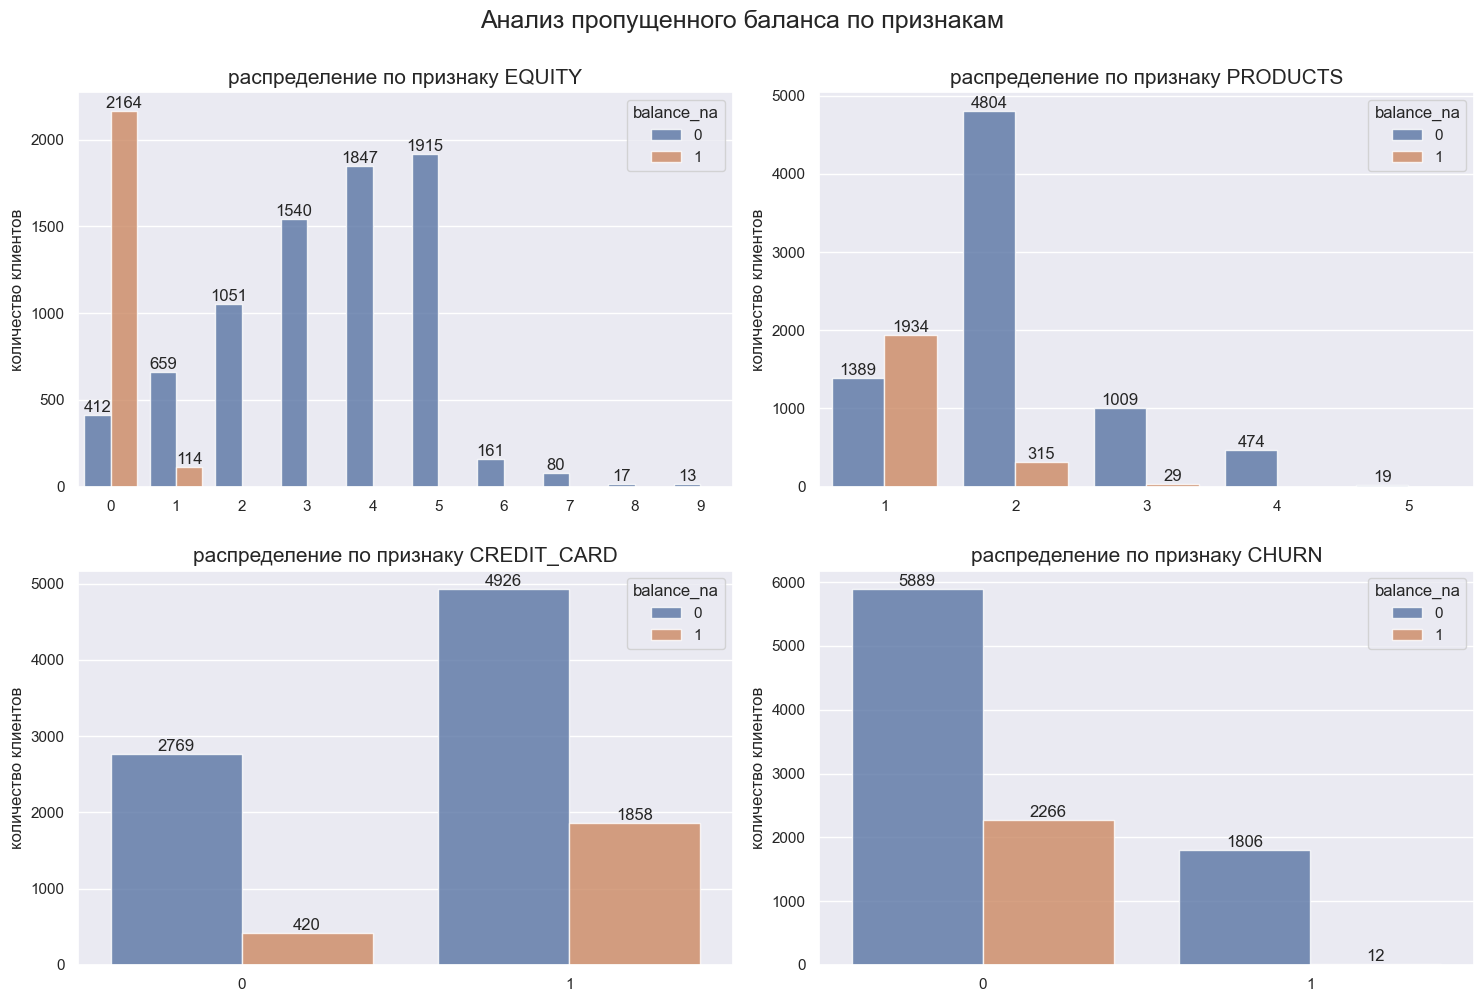

In [21]:
columns = ['equity', 'products', 'credit_card', 'churn']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Анализ пропущенного баланса по признакам', fontsize=18, y=1)
for column, ax in zip(columns, axs.ravel()):
    sns.countplot(data=data, x=column, hue='balance_na', alpha = .8, ax=ax)
    ax.set_title(f'распределение по признаку {column.upper()}', fontsize=15)
    ax.set_xlabel('')
    ax.set_ylabel('количество клиентов', fontsize=12)
    ax.legend(title='balance_na', loc="upper right")
    for container in ax.containers:
        ax.bar_label(container)
    #abs_values = data[column].value_counts(ascending=False).values
    #for p in ax.patches:
        #ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+20))
plt.tight_layout(h_pad= 2)
plt.show()

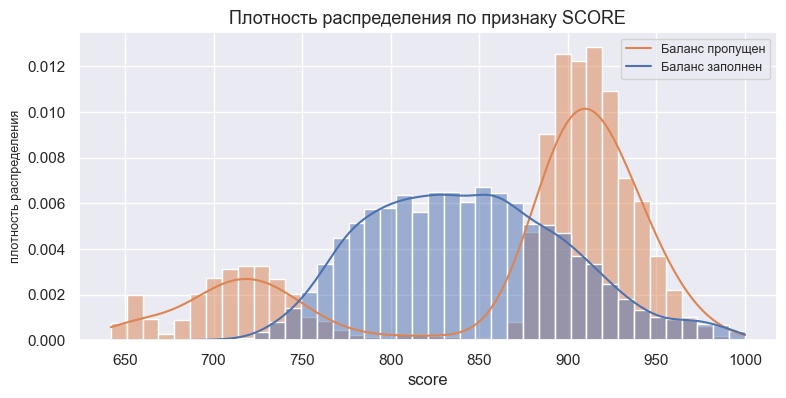

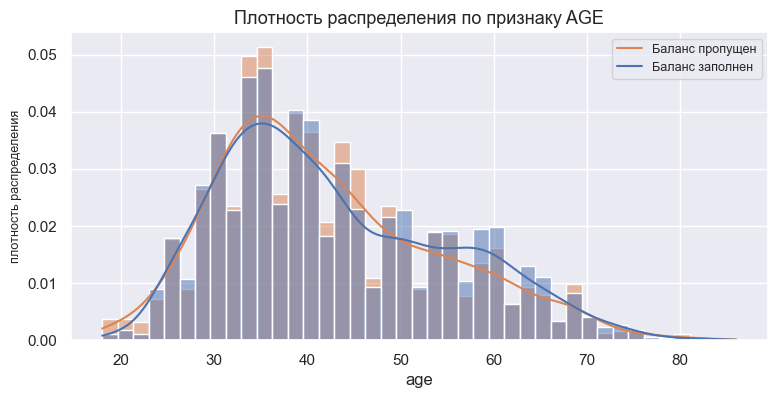

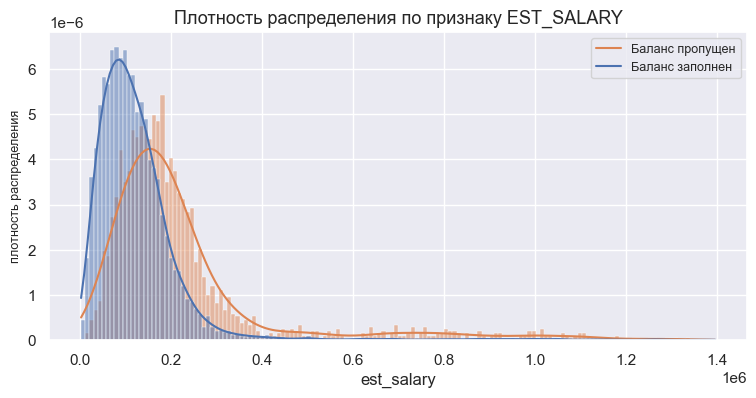

In [22]:
# рассмотрим числовые признаки

for column in ['score', 'age', 'est_salary']:
    hist, ax = plt.subplots(figsize = (9,4))
    ax = sns.histplot(x = column, data=data,  
                      hue='balance_na', common_norm=False, stat='density', kde=True)
    ax.set_title(f'Плотность распределения по признаку {column.upper()}',fontsize = 13)
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('плотность распределения', fontsize = 9)
    plt.legend(['Баланс пропущен', 'Баланс заполнен'], fontsize = 9)
    plt.show()

- самый ярко выраженный признак с пропущенными значениями в балансе на счете это equity (количество баллов собственности), у клиентов с балом 0 в большей степене отсутствуют данные о балансе. Всего у нас прорущено 2278 значений, у данных пользователей, с балом 0 - 2164 пропусков, это почти 95%. 
- стоит отметить признак products (количество продуктов) - у клиентов с 1м продуктом количество пропусков в балансе составляет 1934 или 85% от общего количества пропусков  
- распределение по признаку score (баллы кредитного скоринга) показывают интересный график, пропущенные значения расположены по сторонам графика, так пропуски в балансе у клиентов с баллами 650-770 и 870-970.  
По всем остальным признакам сложно проследить какую-либо зависимость, незаполненные значения "размыты" среди признаков.  

И наконец посмотрим на корреляцию. Воспользуемся библиотекой phik, т.к. она позволяется вычислять взаимосвязи между различными типами признаков (категориальными, непрерывными и их комбинациями), а это как раз то, что нам нужно. В отличие от корреляции Пирсона, коэффициенты находятся на отрезке от 0 (нулевая взаимосвязь) до 1 (максимальная взаимосвязь).

In [23]:
corr_phik = data[['score', 'equity', 'products', 'credit_card', 'est_salary', 'churn', 'balance_na']]
corr_phik.phik_matrix(interval_cols=['score', 'est_salary'])[6:]

score   equity  products  credit_card  est_salary     churn  \
balance_na  0.754058  0.97567  0.491195     0.244707     0.42992  0.381196   

            balance_na  
balance_na         1.0

Мы видим много взаимосвязей, что подтверждают графики выше. Здесь можно сделать вывод, что это точно не техническая ошибка, данные пропуски имеют зависимость, т.к. они распределены неслучайным образом, а не сосредоточены в одном каком-либо признаке. Возможно это обозначение задолженности по кредитной карте, либо клиенты определенной внутренней программы (может сотрудники банка?). 
Заполнять пропуски в данном случае медианными/средними значениями или нулями было бы некорректно. Пока оставляем столбец без изменений. Возможно при последующем анализе нам всплывут еще какие-либо аргументы и мы вернемся к этому вопросу.  

**Выбросы и аномальные значения**  

Рассмотрим два столбца `balance` и `est_salary`

In [24]:
# для более удобного отображения разделим значения на млн.
balance = data['balance']/1000000
salary = data['est_salary']/1000000

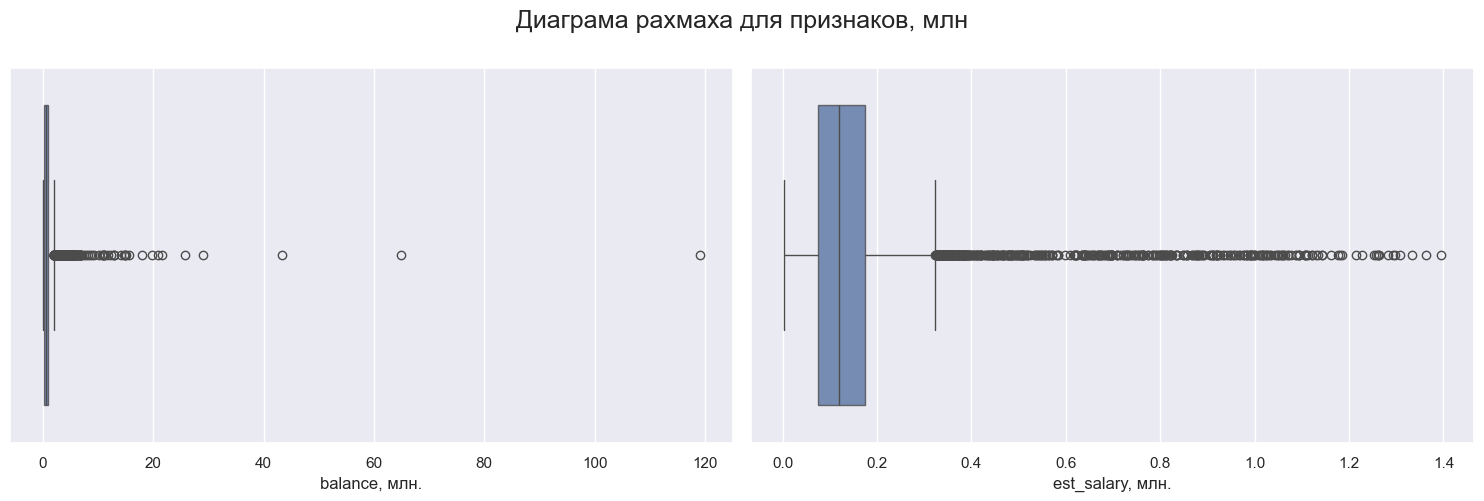

In [25]:
columns = [balance, salary]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Диаграма рахмаха для признаков, млн', fontsize=18, y=1)
for column, ax in zip(columns, axs.ravel()):
    sns.boxplot(x=column, boxprops=dict(alpha=.8), ax=ax)
    ax.set_xlabel(column.name + ', ' + 'млн.')
plt.tight_layout()
plt.show()

График boxplot определяет большое количество значений как выбросы по обоим параметрам. Что у нас есть длинный "правый хвост" было понятно еще на этапе описания числовых столбцов. Напомним, что медианное значение в столбце balance равно ~ 524 тысячи и в столбце est_salary ~ 120 тысяч.   
Построим график распределения баланса на счете и оценочного дохода клиентов.

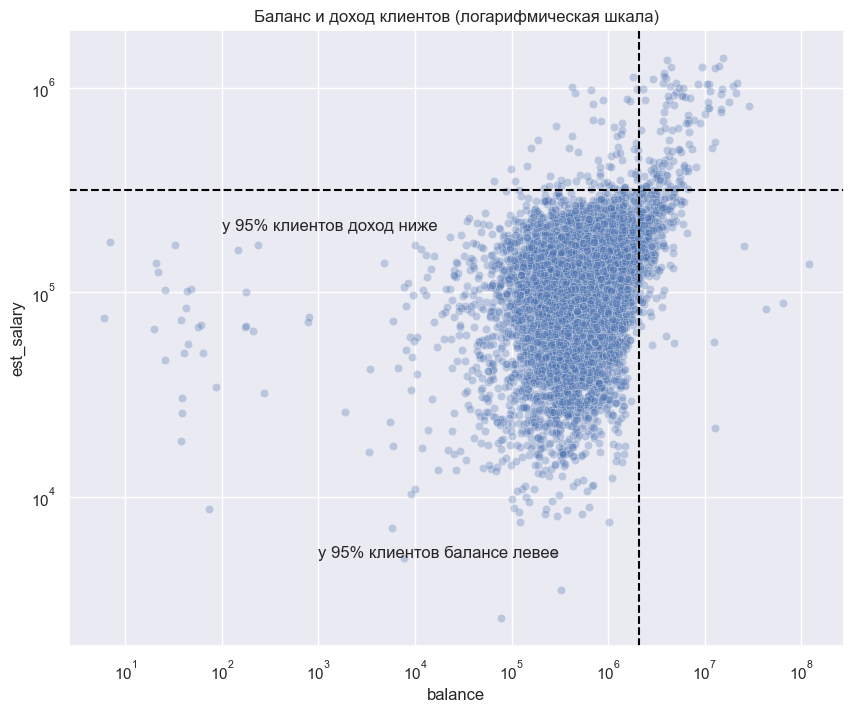

In [26]:
_, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=data, x='balance', y = 'est_salary', alpha=0.3, ax=ax)
ax.axhline(np.percentile(data['est_salary'], 95), linestyle='--', color='black')
ax.axvline(np.percentile(data['balance'].dropna(), 95), linestyle='--', color='black')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("Баланс и доход клиентов (логарифмическая шкала)")
plt.text(100,200000, 'у 95% клиентов доход ниже')
plt.text(1000,5000, 'у 95% клиентов балансе левее')
plt.show()

Видим, что основная масса значений сосредоточена в левой нижней части графика и есть явно выбивающиеся значения.  
У 95% клиентов оценочный доход менее 316 тысяч и баланс на счете бенее 2 миллионов.  
Хоть данные значения значительно выше медианных значений по всем данным, избавляться от них мы пока точно не будет, т.к. потенциально эти клиенты входят в сегмент с высокими доходом и балансом на счете.

**Выводы.** На данном этапе мы:
- привели названия столбцов к нижнему и змеиному регистру где это было необходимо
- в столбце с возрастом заменили тип данных на int
- рассмотрели неявные дубликаты. Выявленно задвоение присвоения уникальных ID клиентов в разных филиалах банка.
- рассмотрели пропущенные значения. Удалили строки с пропущенными значениями в столбце с возрастом клиентов (менее 1% от всех данных), пропуски в столбце с балансом на счете клиентов оставили без изменений, т.к. было выявлено, что это не техническая ошибка/сбой и природа пропусков имеет зависимость с другими факторами
- добавили столбцы с кодированными данными по городам, полу и наличием пропусков в столбце баланс
- отметили сильный разброс значений в столбцах с балансом клиентов и оценочным доходом.
- рассмотрели количество клиентов по признакам:
    - больше всего клиентов из Ярославля - 5888 (~ 59%), далее следует Рыбинск (2695 или 27%) и Ростов (1417 или 14%)
    - по половому признаку клиенты распределены практически 50*50 (5005 мужчин и 4995 женщин)
    - больше всего клиентов в возрасте 33-37 лет
    - по количеству баллов собственности больше всего клиентов с баллом 0 (2592 клиента), далее следуют баллы 5 и 4, меньше всего клиентов с баллом 9 (13 человек)
    - по количеству продуктов банка больше всего клиентов у которых 1 или 2 продукта
    - у 6804 клиентов имеется кредитная карта (68 %)
    - 5235 клиентов оцениваются как активные клиенты (52%)
    - 18% клиентов обозначенны ушедшими в отток

## Шаг 2. Исследовательский анализ данных

### Портрет типичного клиента банка  

Посмотрим как распределены клиенты по возрасту

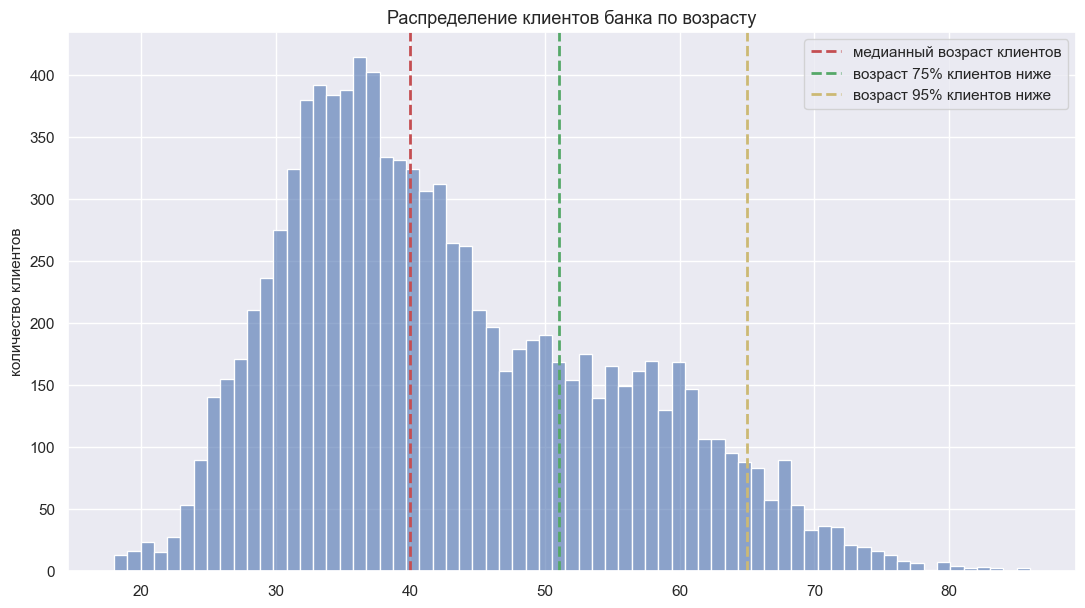

In [27]:
plt.figure(figsize=(13,7))
sns.histplot(data = data, x = 'age', bins = 69, alpha = .6)
plt.title('Распределение клиентов банка по возрасту',fontsize = 13)
plt.xlabel('')
plt.ylabel('количество клиентов', fontsize = 11)
plt.axvline(np.percentile(data['age'], 50), ls='--', lw=2, color='r', label = 'медианный возраст клиентов')
plt.axvline(np.percentile(data['age'], 75), ls='--', lw=2, color='g', label = 'возраст 75% клиентов ниже')
plt.axvline(np.percentile(data['age'], 95), ls='--', lw=2, color='y', label = 'возраст 95% клиентов ниже')
plt.legend()
plt.show()

Больше всего клиентов в возрасте 32-37 лет. Далее количество клиентов постепенно снижается. Самому молодому клиенту 18 лет, медианный возраст клиента равен 40 лет, 5% клиентов старше 65 лет.

**Построим визуализации как распределены доли клиентов по признакам**   

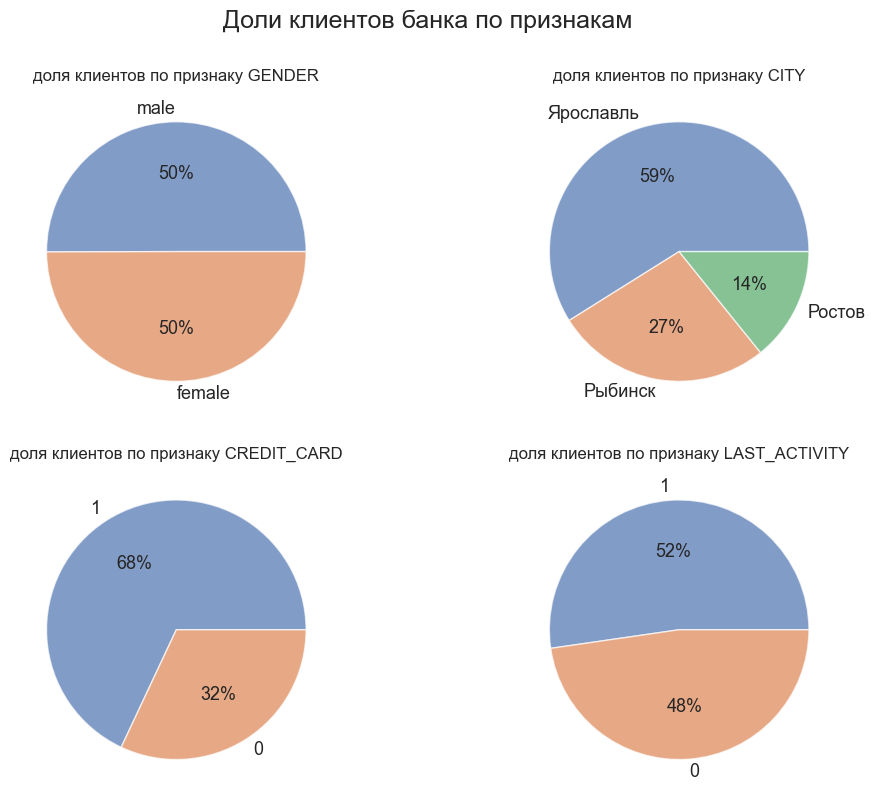

In [28]:
columns = ['gender', 'city', 'credit_card', 'last_activity']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Доли клиентов банка по признакам', fontsize=18, y=1)
for column, ax in zip(columns, axs.ravel()):
    (data[column]
    .value_counts()
    .plot(kind='pie', autopct='%1.0f%%',
          textprops = {"fontsize":13}, wedgeprops={'alpha':.7}, ax=ax)
    )
    ax.set_title(f'доля клиентов по признаку {column.upper()}', fontsize=12)
    ax.set_ylabel('')
plt.tight_layout(h_pad= 2)
plt.show()

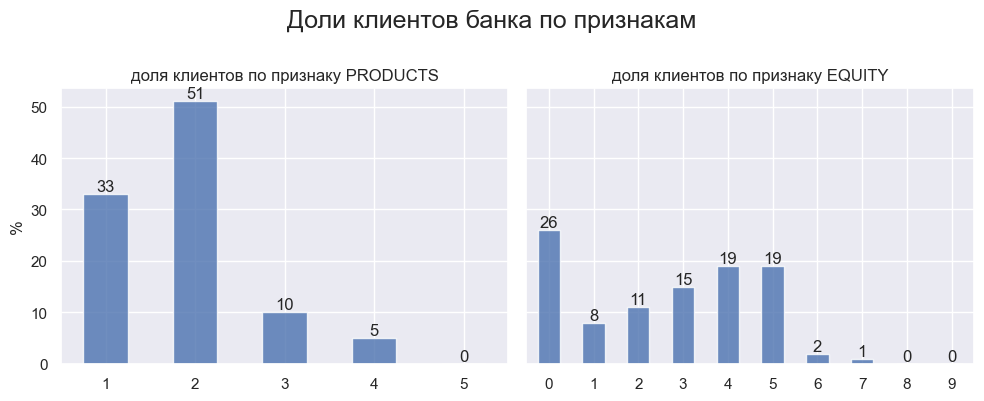

In [29]:
columns = ['products', 'equity']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey = True)
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Доли клиентов банка по признакам', fontsize=18, y=1)
for column, ax in zip(columns, axs.ravel()):
    ((data[column]
      .value_counts(normalize=True)*100).round().sort_index()
      .plot(kind='bar', color = 'b', alpha = .8, ax=ax)
     )
    ax.set_title(f'доля клиентов по признаку {column.upper()}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('%', fontsize=12)
    for label in ax.get_xticklabels():
        label.set_rotation(0)
    for container in ax.containers:
        ax.bar_label(container)
plt.tight_layout(h_pad= 2)
plt.show()

Среди всех клиентов банка:
- пол клиентов распределен равномерно 50 на 50%
- больше всего клиентов из города Ярославль - 59%, в Рыбинске 27% и в Ростове 14%
- у 68% имеется кредитная карта
- по активности клиентов доли распределены приблизительно равномерно, активных - 52%
- 51% клиентов имеют 2 продукта, далее клиенты с одним продуктом (33%), количество клиентов с пятью продуктами составляет меньше 1%
- по признаку equity (количесто баллов собственности) больше всего клиентов с нулевым баллом - 26%, далее в равных долях идут клиенты с баллом 4 и 5 (19%), менее 1% клиентов с баллом 8 и 9.

**Рассмотрим значения баланса и оценочного дохода клиентов в разрезе их признаков.**

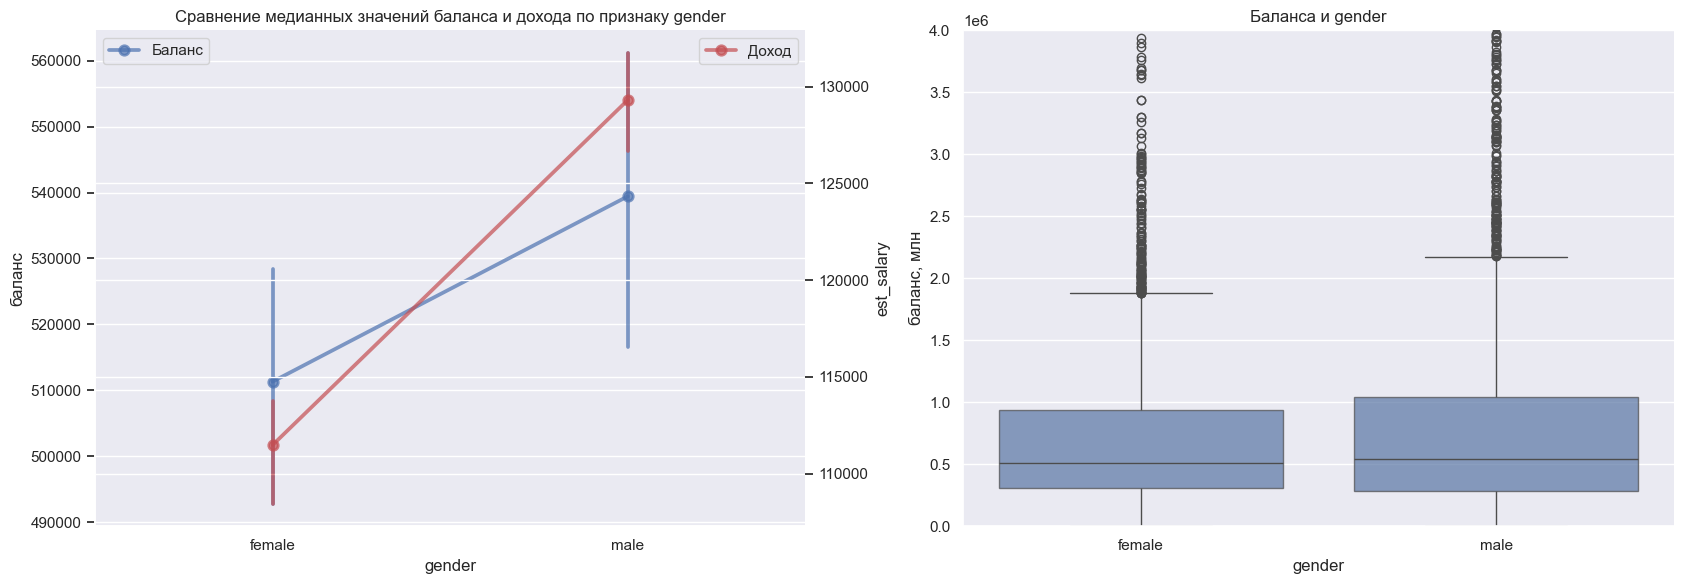

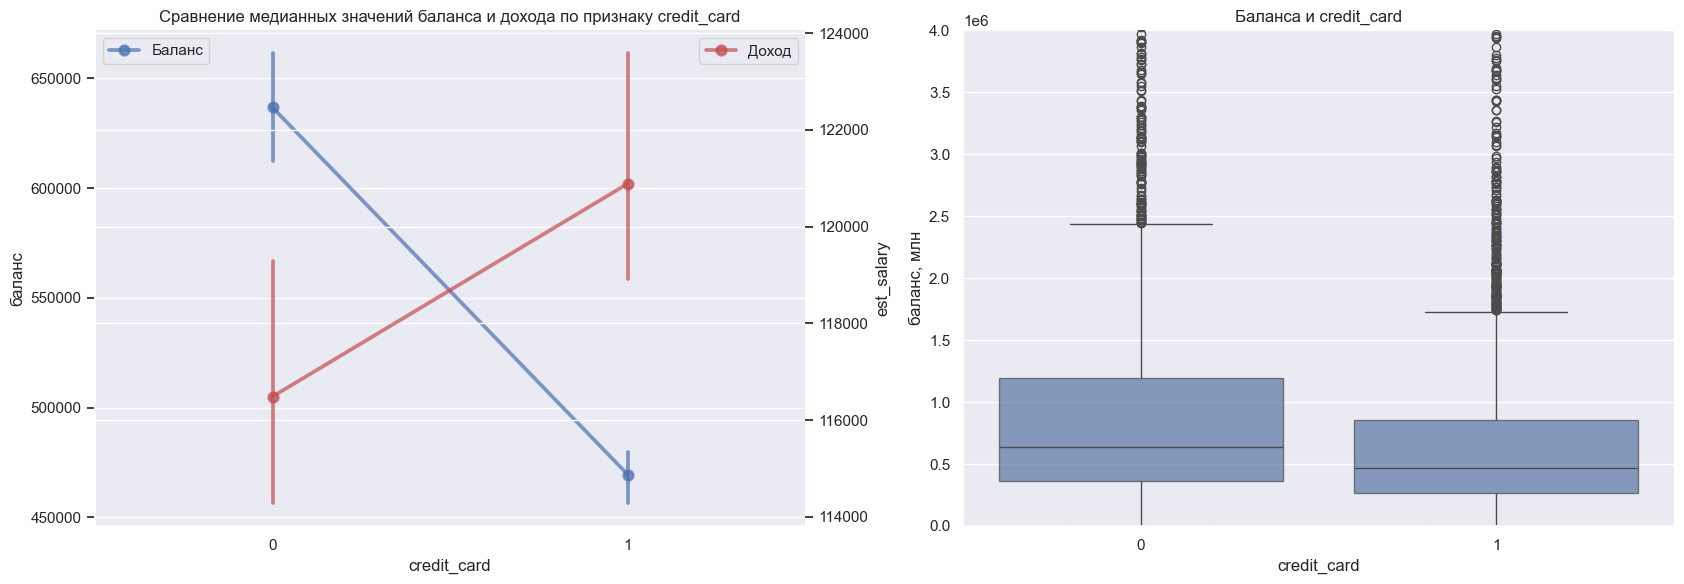

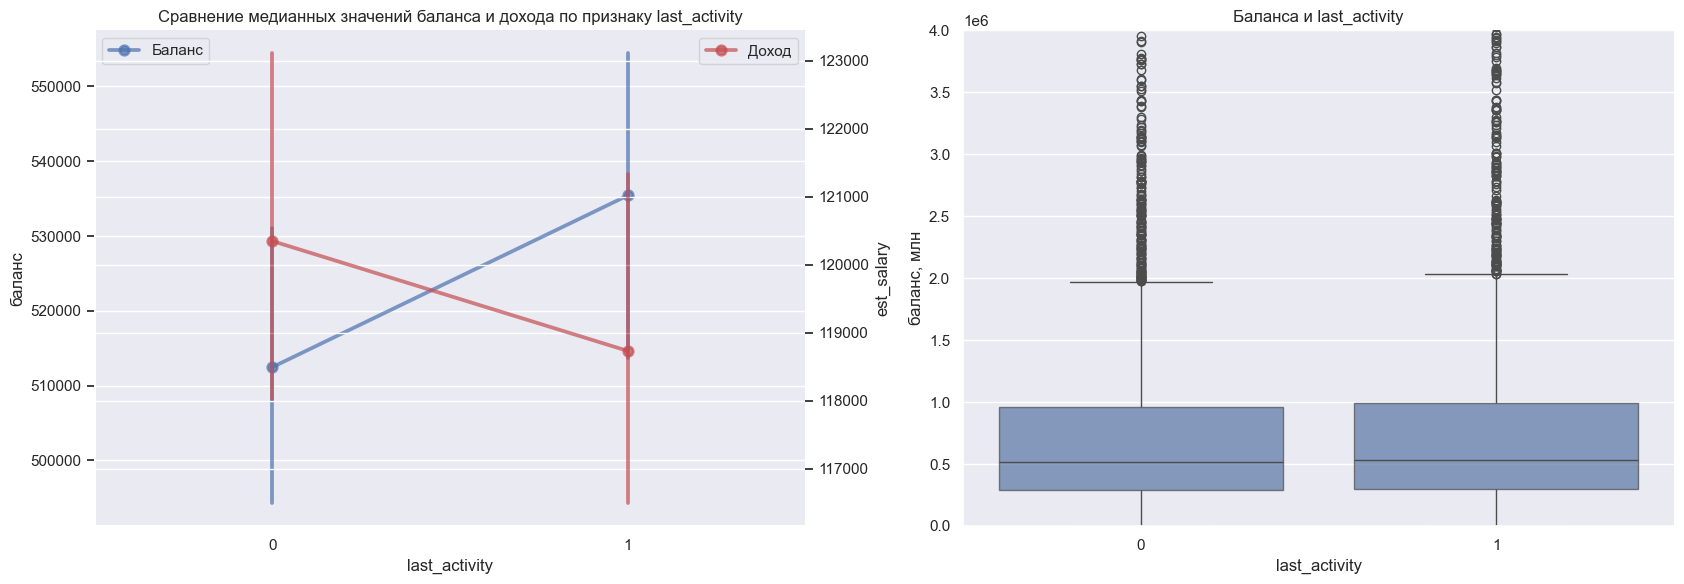

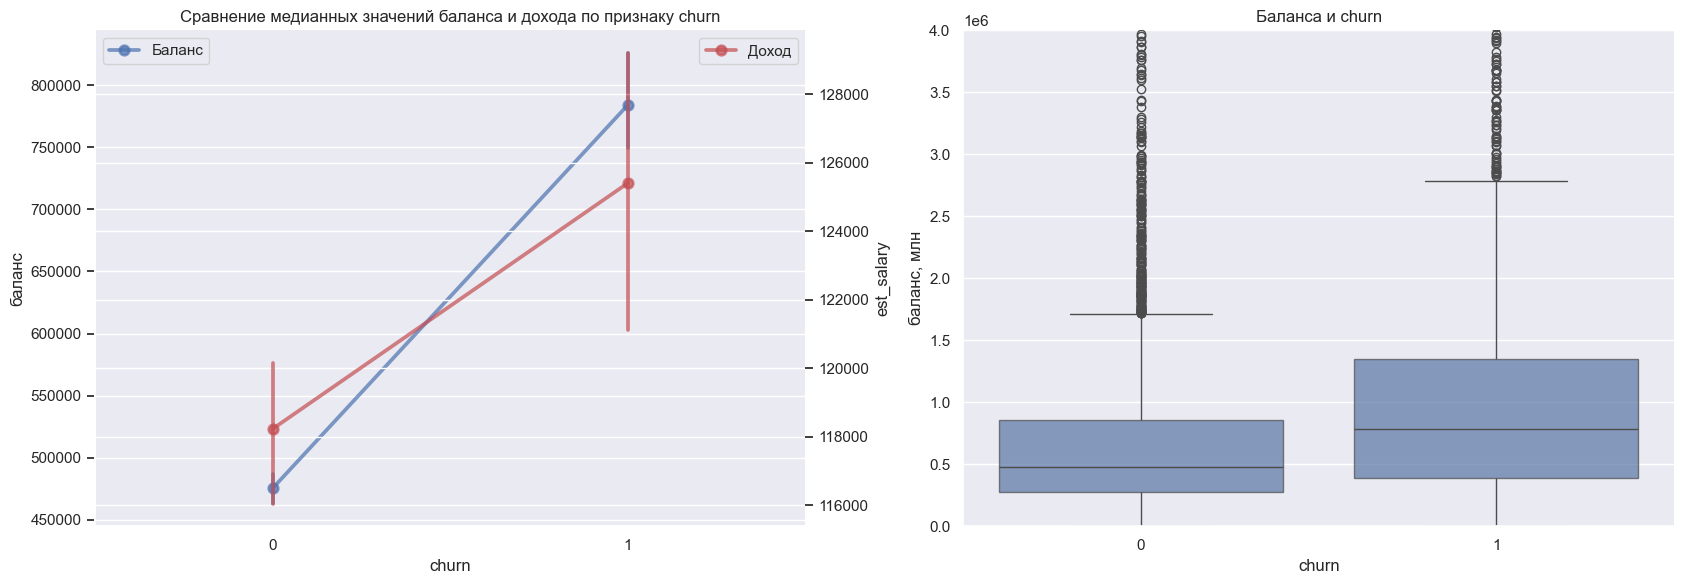

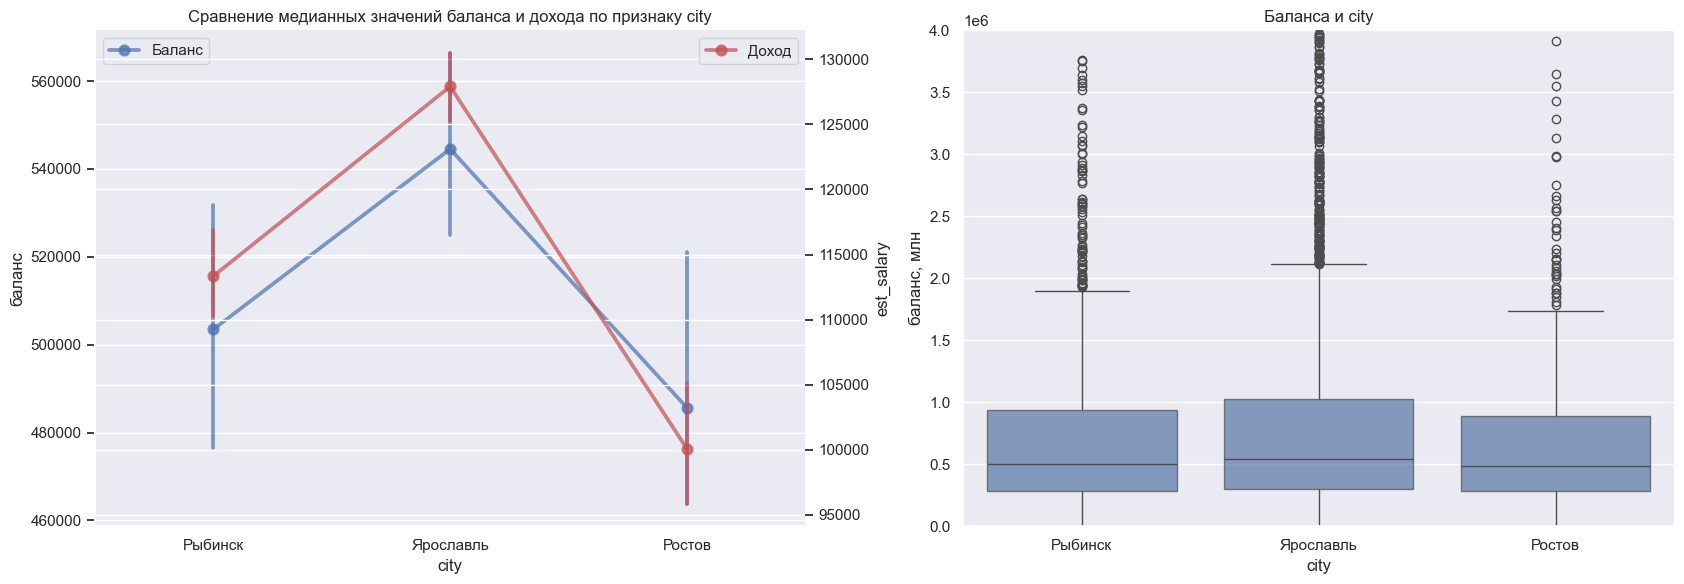

In [30]:
for column in ['gender', 'credit_card', 'last_activity', 'churn', 'city']:
    plt.figure(figsize=(17, 6))
    ax1 = plt.subplot(1, 2, 1)
    sns.pointplot(data=data, x=column, y="balance", color="b", alpha = .7, ax=ax1, estimator=np.nanmedian, label="Баланс")
    ax1.set_ylabel("баланс")
    ax1.legend(loc="upper left")
    sns.pointplot(data=data, x=column, y="est_salary", color="r", alpha = .7, ax=ax1.twinx(),
                  estimator=np.nanmedian, label="Доход")
    ax1.set_title(f"Сравнение медианных значений баланса и дохода по признаку {column}")
    ax2 = plt.subplot(1, 2, 2)
    sns.boxplot(x=column, y = "balance", data=data, boxprops=dict(alpha=.7), ax=ax2)
    #ax2.set_yscale("log")
    plt.title(f'Баланса и {column}')
    ax2.set_ylabel("баланс, млн")
    ax2.set_ylim(0, 4000000)
    sns.despine()
    plt.tight_layout()
    plt.show()    

По всем признакам, согласно диаграмме размаха, мы наблюдаем значительное количество выбросов, точки на левом графике характеризуют медианные значения баланса и дохода клиентов в разрезе признаков:
- медианные значения баланса и дохода у женщин ниже чем у мужчин, баланс у женщин ~ 510 тысяч (против 540 у мужчин), доход ~ 111 тысяч против 129 у мужчин
- медианный баланс клиентов без кредитной карты (~ 640 тысяч) значительно превышает данный показатель у владельцев кредитных карт (~ 470 тысяч), по показателю медианного дохода мы наблюдаем обратную картину: у пользователей без кредитной карты он ниже чем у клиентов с данным продуктом (116 тысяч против 121 тысячи)
- медианный баланс активных клиентов превышает баланс неактивных, доходы снова различаются в обратную сторону - медианный доход выше у неактивных клиентов, стоит отметить, что в данном случае оба показателя различаются на незначительную величину (разницы в балансах ~ в 20 тысяч, в доходах ~ 2 тысячи)
- по факту оттока медианные показатели дохода и баланса ниже у лояльных клиентов
- Среди городов самые высокие показатели по обоим признакам у г. Ярославль, низкие - в Ростове.

Далее рассмотрим оставшиеся признаки, для этого построим диаграммы рассеяния для признаков балл кредитного скоринга и возраст клиента, где каждая точка будет соответствовать паре значений - баланс и признак клиента. Для признаков количество продуктов и баллы собственности построим диаграммы размаха.

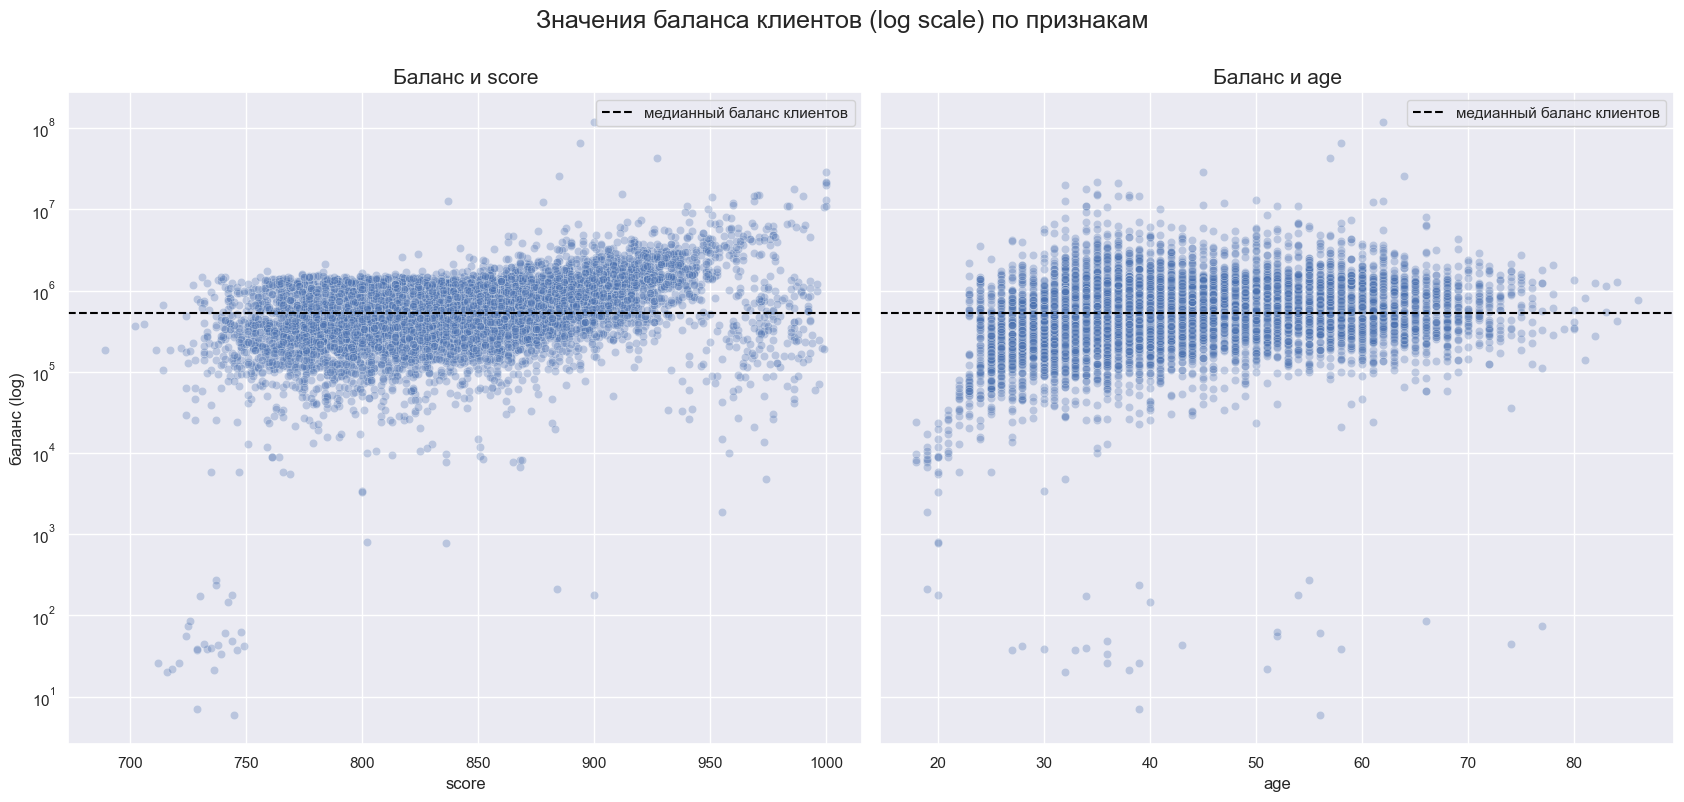

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 8), sharey=True)
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Значения баланса клиентов (log scale) по признакам', fontsize=18, y=1)
for column, ax in zip(['score', 'age'], axs.ravel()):
    sns.scatterplot(data=data, x=column, y = 'balance', alpha=0.3, ax=ax)
    ax.axhline(np.percentile(data['balance'].dropna(), 50), ls='--', c='black', label = 'медианный баланс клиентов')
    ax.legend(loc = 'upper right')
    plt.yscale('log')
    ax.set_title(f'Баланс и {column}', fontsize=15)
    ax.set_ylabel('баланс (log)', fontsize=12)
plt.tight_layout(h_pad= 2)
plt.show()

- зависимость между баллом кредитного скоринга и балансом клиентов отсутствует, основная масса значений сосредоточена в районе миллиона и ниже, при этом мы видим небольшое увеличение баланса с ростом балла скоринга с отметки ~ в 850 баллов, с другой стороны есть немалое количество клиентов у которых балл скоринга более 950, а значения баланса на счете значительно ниже
- баланс на счете также не особо коррелирует с возрастом клиентов. Изначально мы можем наблюдать увеличение баланса на счете с ростом значения возраста, но после отметки в 25 лет все значения рассеяны. 

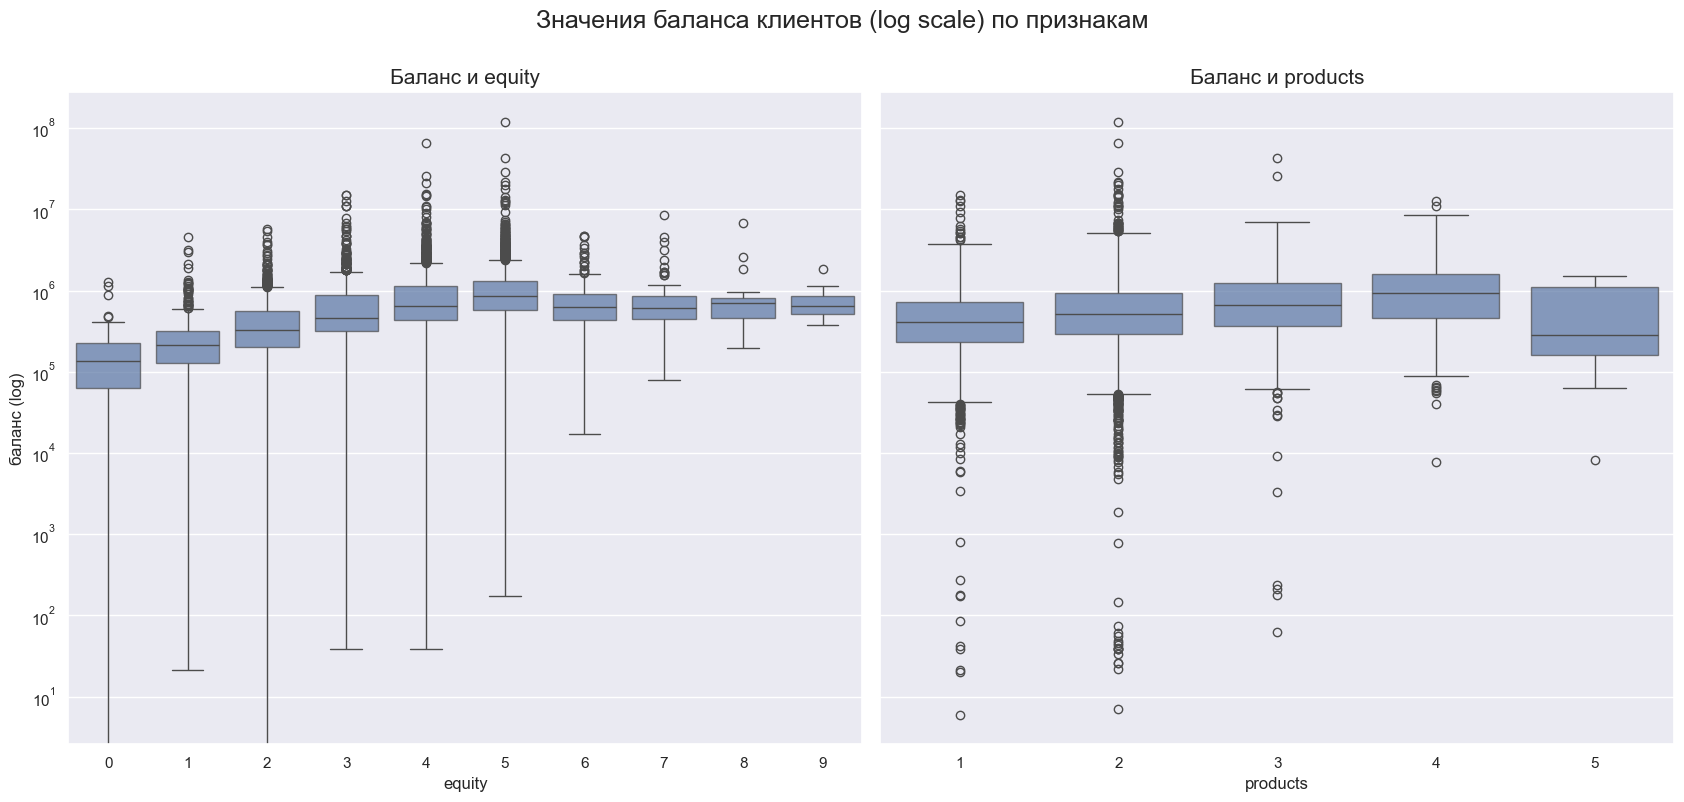

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 8), sharey=True)
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Значения баланса клиентов (log scale) по признакам', fontsize=18, y=1)
for column, ax in zip(['equity', 'products'], axs.ravel()):
    sns.boxplot(data=data, x=column, y = 'balance', boxprops=dict(alpha=.7), ax=ax)
    plt.yscale('log')
    ax.set_title(f'Баланс и {column}', fontsize=15)
    ax.set_ylabel('баланс (log)', fontsize=12)
plt.tight_layout(h_pad= 2)
plt.show()

- существенный различия наблюдаются в признаке `equity` (баллы собственности). Самый высокий показатель медианного баланса у клиентов с баллом 5 (~ 850 тысяч), далее следуют склиенты с баллом 8 (чуть более 700 тысяч) при том что их доля среди всех клиентов составляет менее 1%. Самый низкий медианный баланс у клиента с баллом 0 (130 тысяч), отсюда можно предположить, что чем выше баланс на счете, тем более высокий балл собственности у клиента
- по количеству продуктов видим, что с ростом количества продуктов увеличивается медианный баланс на счете (низкие значения для пяти продуктов вероятно обусловленны несмногочисленностью данной категории), самый высокий медианный баланс у клиентов с 4 продуктами  

**Посмотрим как среди клиентов и их признаков распределено наличие/отсутствие кредитной карты**

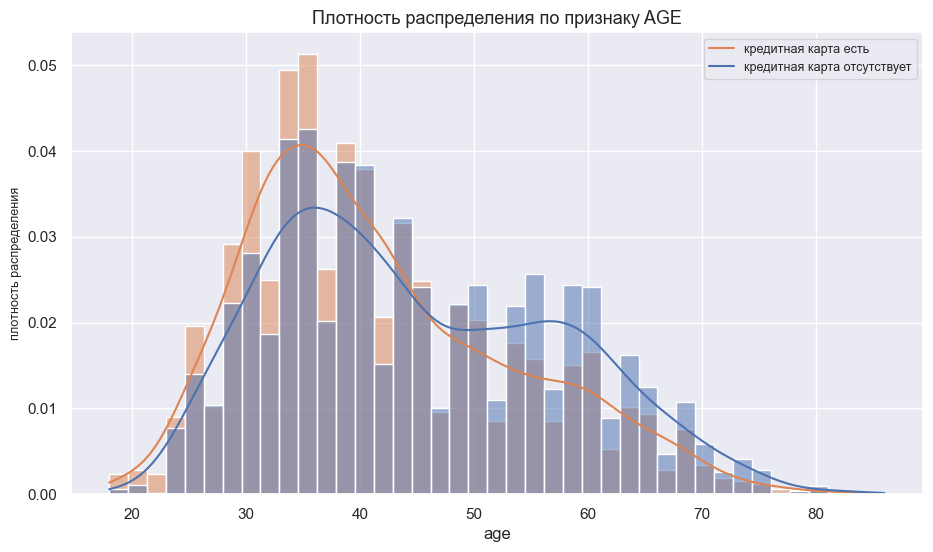

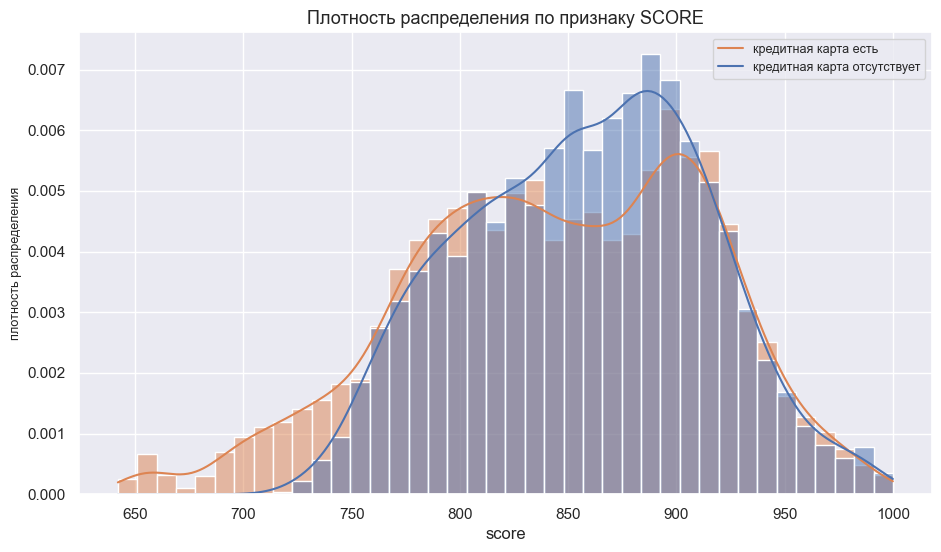

In [33]:
for column in ['age', 'score']:
    hist, ax = plt.subplots(figsize = (11,6))
    ax = sns.histplot(x = column, data=data, hue='credit_card', common_norm=False, stat='density', kde=True)
    ax.set_title(f'Плотность распределения по признаку {column.upper()}',fontsize = 13)
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('плотность распределения', fontsize = 9)
    plt.legend(['кредитная карта есть', 'кредитная карта отсутствует'], fontsize = 9)
    plt.show()

согласно графиков:
- у клиентов до 45 лет с большей вероятностью есть в наличии кредитная карта, особенно значимо это прослеживается на интервале 30 - 35 лет. После 45 лет в большей степени кредитная карта у клиентов отсутствует, особенно на интервале 53-60 лет
- клиенты с баллом кредитного скоринга меньше 720 практически в 100% случаев имеют кредитную карту, у клиентов с баллом 840-900 с большей вероятность кредитная карта оствутствует 

Рассмотрим признаки - баланс на счете и оценочный доход клиента. Для этого уберем явновыбивающиеся значения и построим гистограммы.

In [34]:
no_outliers = data.copy()

for feature in ['balance', 'est_salary']:
    no_outliers = no_outliers[no_outliers[feature] <= np.nanpercentile(no_outliers[feature], 99)]

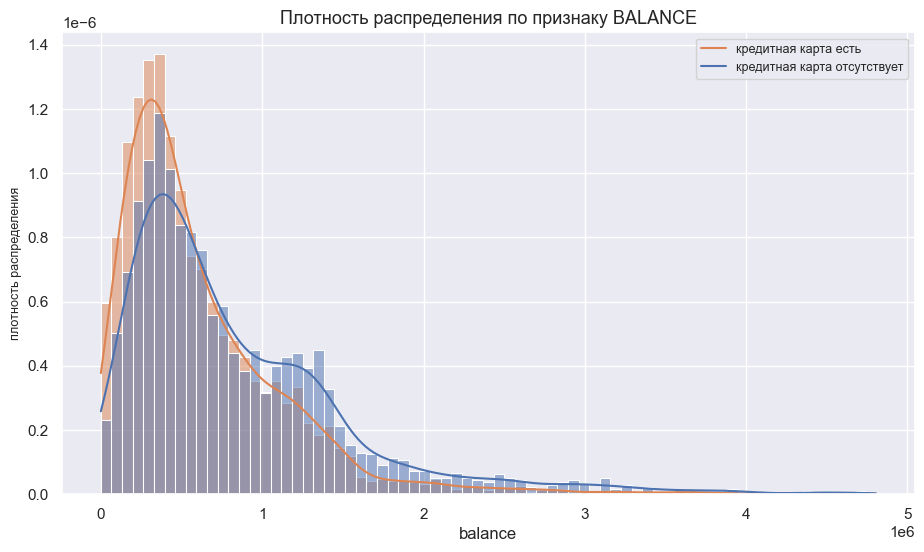

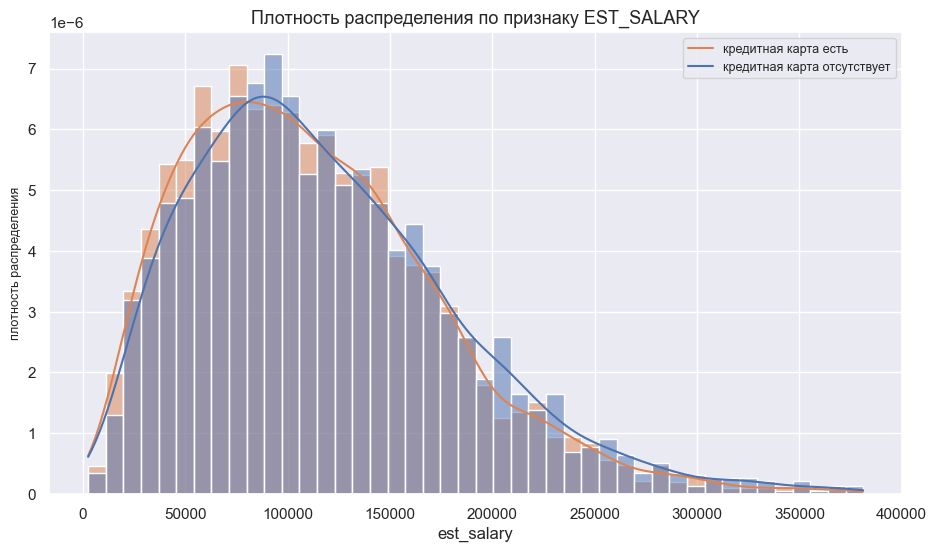

In [35]:
for column in ['balance', 'est_salary']:
    hist, ax = plt.subplots(figsize = (11,6))
    ax = sns.histplot(x = column, data=no_outliers, hue='credit_card', common_norm=False, stat='density', kde=True)
    ax.set_title(f'Плотность распределения по признаку {column.upper()}',fontsize = 13)
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('плотность распределения', fontsize = 9)
    plt.legend(['кредитная карта есть', 'кредитная карта отсутствует'], fontsize = 9)
    plt.show()

- клиенты с балансом на счете до 500 тысяч с большей вероятностью обладают кредитной картой, после отметки в ~ 1 млн. возрастает вероятность отсутствия кредитной карты у клиента
- размер оценочного дохода практически не связан с наличием/отсутствием кредитной карты, в районе 50 тысяч видим увеличение вероятности наличия кредитной карты, в районе 200 тысяч возрастает вероятность отсутствия кредитной катры  

Посмотрим как распределены доли клиентов в зависимости от наличия/отсутствия кредитной карты среди категориальных признаков

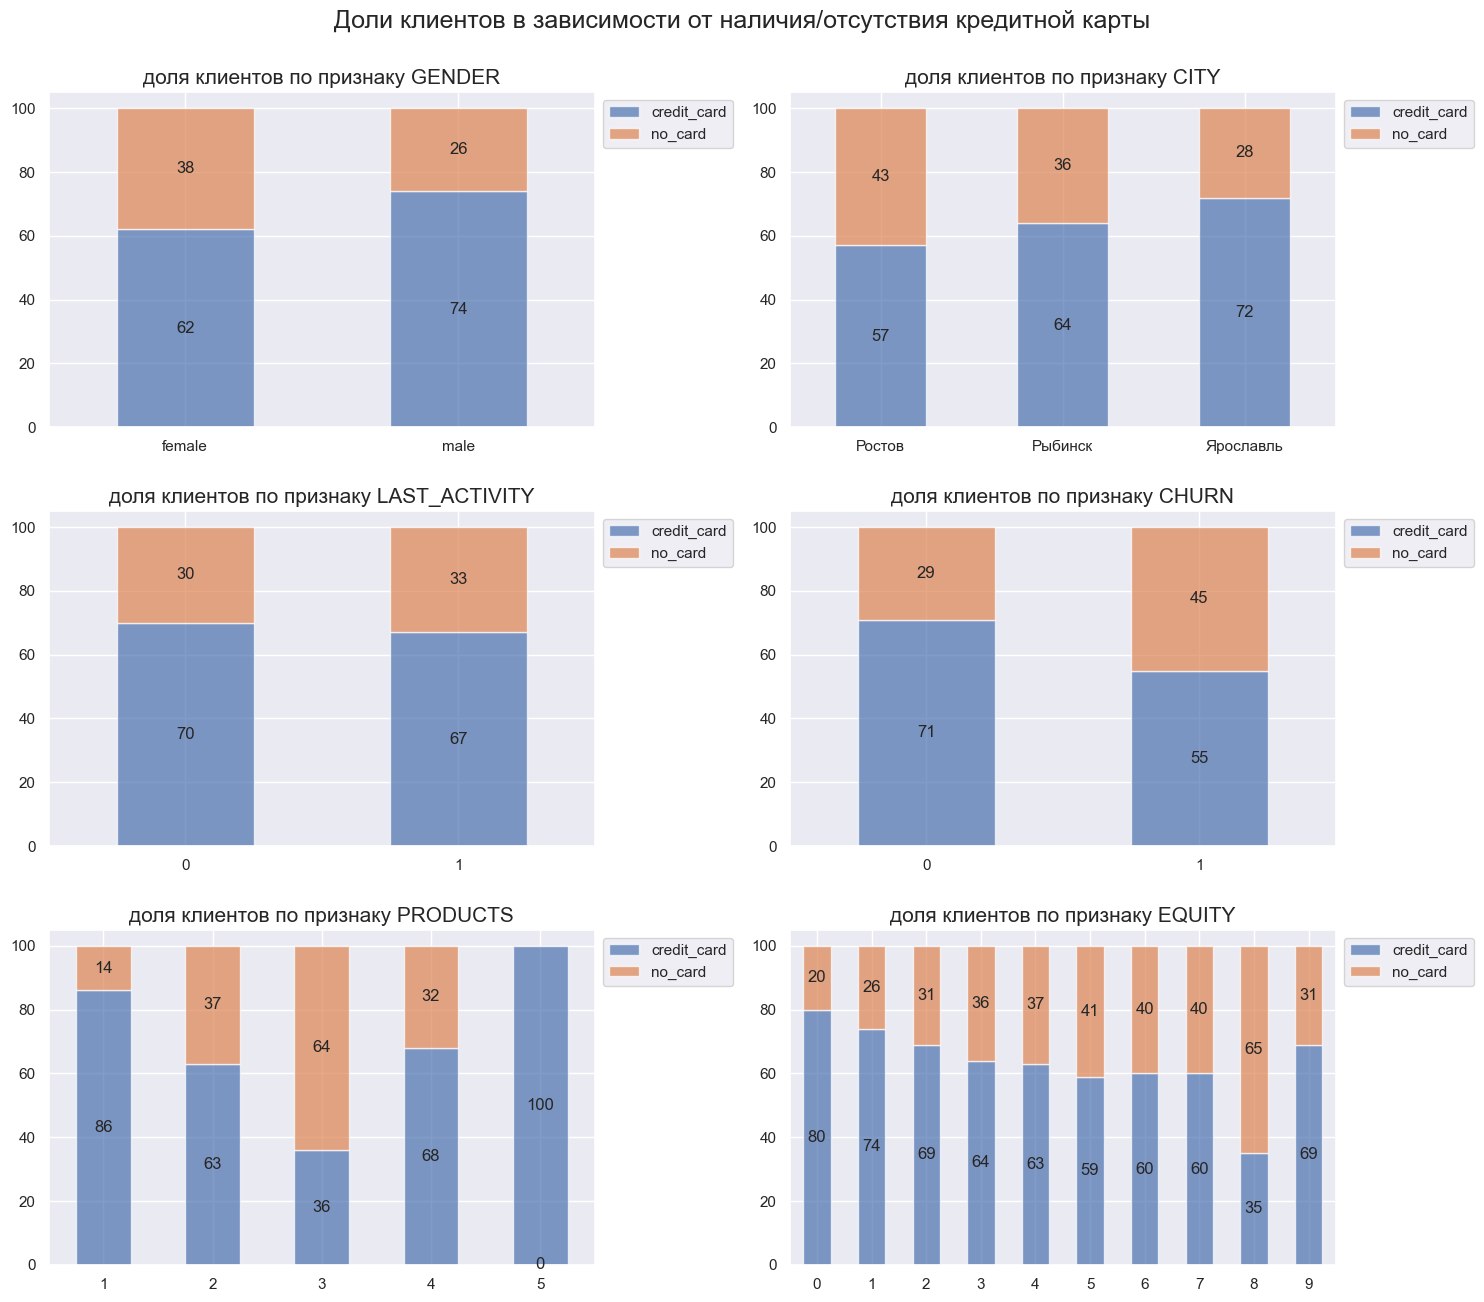

In [36]:
columns = ['gender', 'city', 'last_activity', 'churn', 'products', 'equity']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 13))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Доли клиентов в зависимости от наличия/отсутствия кредитной карты', fontsize=18, y=1)
for column, ax in zip(columns, axs.ravel()):
    df = (data.groupby(column)['credit_card'].mean()*100).round().reset_index()
    df['no_card'] = 100 - df['credit_card']
    df.plot(x = column, kind='bar', rot=0, stacked=True, y=['credit_card', 'no_card'], alpha = .7, ax=ax)
    ax.set_title(f'доля клиентов по признаку {column.upper()}', fontsize=15)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(bbox_to_anchor=(1,1))
    for container in ax.containers:
        ax.bar_label(container, label_type='center')
plt.tight_layout(h_pad= 2)
plt.show()

Ранее мы выяснили что у 68% клиентов имеется кредитная карта, но распределение среди клиентов неоднородно:
- мужчины пользются кредитными картами чаще чем женщины (72% против 62%)
- среди филиалов банка кредитная карта чаще выдавалась клиентам из города Ярославль - 72%, в Рыбинске доля пользователей составила 64% и в Ростове - 57%
- по признаку активности клиентов доли распределены примерно в равном соотношении - как у активных, так и неактивных клиентов кредитная карта имеется у ~ 67-70 % клиентов и отсутствует у 30-33 % клиентов
- лояльные клиенты чаще пользуются кредитной картой (71%). Среди "отточных" клиентов доли распределены примерно равномерно - карта имеется у 55% пользователей
- среди клиентов с одним продуктом у 86% имеется кредитная карта, у 64% клиентов с тремя продуктами кредитная карта отсутствует, категория клиентов с пятью продуктами самая немногочисленная (19 человек) и у всех их имеется кредитная карты. Для пользователей с 2 и 4 продуктами доли распределены примерно одинаково - более 60% имеют кредитную карту
- с ростом баллов собственности наблюдаем снижение доли клиентов, пользующихся кредитной картой. Максимальный процент у клиентов с баллом 0 - 80%, минимальный с баллом 8 - 35%.

**Выводы:**  

- согласно данному разделу, чаще других клиентами банка становятся пользователи в возрасте 32-37 лет, медианный возраст клиента равен 40 лет, 5% клиентов старше 65 лет. Пол, как и активность клиентов распределены равномерно 50 на 50%, больше всего клиентов из города Ярославль - 59%, у 68% имеется кредитная карта. 51% клиентов пользуются 2 продуктами, количество клиентов с пятью продуктами составляет меньше 1%, по признаку equity (балл собственности) больше всего клиентов с нулевым баллом - 26%, далее в равных долях идут клиенты с баллом 4 и 5 (19%), менее 1% клиентов с баллом 8 и 9  
- по признакам баланс на счете клиентов и оценочный доход мы наблюдаем значительное количество выбросов. Медианные значения баланса и дохода у женщин ниже чем у мужчин, у клиентов без кредитной карты медианный баланс значительно превышает данный показатель у владельцев кредитных карт, доходы различаются в обратную сторону - медианный доход выше у владельцев карт. Медианный баланс активных клиентов превышает баланс неактивных. По факту оттока медианные показатели дохода и баланса ниже у лояльных клиентов. Среди городов самые высокие показатели по обоим признакам у г. Ярославль, низкие - в Ростове. Зависимость между баллом кредитного скоринга и балансом клиентов отсутствует, как и отсутствие явной корреляции между балансом на счете и возрастом клиентов. С ростом балла собственности у клиента (equity) растет медианный баланс на счете, также с ростом количества продуктов увеличивается медианный баланс на счете
- кредитная карта является востребованным продуктом банка. Чаще остальных кредитная карта имеется у клиентов до 45 лет, особенно значимо это прослеживается на интервале 30 - 35 лет, после 45 лет вероятность отсутствия кредитной карты возрастает. Клиенты с баллом кредитного скоринга меньше 720, с балансом на счете до 500 тысяч и клиенты из города Ярославль также чаще других имеют кредитную карту. Размер оценочного дохода, как и пол клиента практически не связан с наличием/отсутствием кредитной карты. По активности клиентов значимых различий не наблюдается ~ 67-70 % имеют кредитную карту. Лояльные клиенты чаще пользуются кредитной картой (71%). Среди клиентов с одним продуктом у 86% имеется кредитная карта, у 64% клиентов с тремя продуктами кредитная карта отсутствует, категория клиентов с пятью продуктами самая немногочисленная (19 человек) и у всех их имеется кредитная карты. С ростом баллов собственности наблюдаем снижение доли клиентов, пользующихся кредитной картой. Максимальный процент у клиентов с баллом 0 - 80%, минимальный с баллом 8 - 35%.

### Анализ клиентов банка по признаку количество продуктов (`products`)  

Посмотрим на средние/медианные значения признаков в разрезе количества продуктов

In [37]:
(data
 .groupby('products')
 .agg({
     'gender': pd.Series.mode,
     'city': pd.Series.mode,
     'age':'mean',
     'score':'mean',
     'equity':'mean',
     'balance':'median',
     'est_salary':'median',
     'credit_card':'mean',
     'last_activity':'mean',
     'churn':'mean'
     })
 .round(2)
 .T
)

products               1          2          3          4          5
gender              male     female     female       male       male
city           Ярославль  Ярославль  Ярославль  Ярославль  Ярославль
age                 42.2      42.77      45.71      39.78      36.47
score              854.3     844.56     837.24     878.27     859.26
equity              1.33       3.15       3.52       4.15       3.68
balance        415369.49   515461.0  665382.31   939342.9  282262.33
est_salary      142163.0  109508.21  105655.98  122472.51  106033.79
credit_card         0.86       0.63       0.36       0.68        1.0
last_activity       0.53       0.52       0.42       0.79       0.89
churn               0.07       0.19       0.29       0.63       0.42

Практически по всем продуктам наблюдаются различия в признаках. Здесь главный вывод для нас, что с ростом количества продуктов у клиентов растет процент оттока, максимальное значение 63% у клиентов с 4 продуктами.  
Согласно средним значениям по продуктам мы также видим:
- Ярославль лидирует по всем столбцам, у мужчин чаще либо однин продукт, либо 4-5, двумя/тремя продуктами чаще пользуются женщины
- балл кредитного скоринга живет своей жизнью, у клиентов с одним продуктом он выше чем у клиентов с тремя и примерно наравне с клиентами, у которых 5 продуктов, минимальный средний кредитный бал у клиентов с 3 продуктами
- средний возраст клиентов с количеством продуктов 4 и 5 ниже, чем у остальных клиентов с кол-вом продуктов 1-3
- с увеличением количества продуктов растет количество баллов собственности
- с увеличением количества продуктов растет медианное значение баланса на счете, а так как нам известно, что кредитные средства (в нашем случае) не учитываются в балансе, можем сделать вывод, что это продукты сберегательного характера: вклады/депозиты, накопительные счета, инвестиционные продукты
- у всех клиентов с 5 продуктами есть кредитная карта, у клиентов с тремя продуктами в большей степени кредитная карта отсутствует
- по активности клиенты с 1-3 продуктами примерно на одном уровне, самые активные клиенты с 4 и 5 продуктами
- самый высокий медианный оценочный доход у клиентов с одним продуктом, самый низкий - клиенты с 3 продуктами  

В данном проекте заказчиками не было представлено описания продуктов, используемых клиентами. Далее попробуем предположить какие это могут быть продукты. Нам уже известно, что кредитная карта есть у 68% клиентов. Среди клиентов, у которых только один продукт, у 14% пользователей - это не кредитная карта. Рассмотрим их подробнее

In [38]:
# не кредитка и 1 продукт

nocredit_1prod = data.query('products == 1 and credit_card == 0')
nocredit_1prod.describe().round()

user_id  score    age  equity    balance  products  credit_card  \
count     453.0  453.0  453.0   453.0      104.0     453.0        453.0   
mean   171532.0  885.0   46.0     1.0   442849.0       1.0          0.0   
std     32962.0   52.0   12.0     1.0   417109.0       0.0          0.0   
min    100920.0  724.0   18.0     0.0        6.0       1.0          0.0   
25%    143086.0  875.0   36.0     0.0   177747.0       1.0          0.0   
50%    171403.0  897.0   44.0     0.0   310639.0       1.0          0.0   
75%    200414.0  918.0   55.0     0.0   576144.0       1.0          0.0   
max    229050.0  999.0   86.0     8.0  2832592.0       1.0          0.0   

       last_activity  est_salary  churn  gender_code  rostov  rybinsk  \
count          453.0       453.0  453.0        453.0   453.0    453.0   
mean             1.0    179525.0    0.0          1.0     0.0      0.0   
std              0.0    148645.0    0.0          1.0     0.0      0.0   
min              0.0      9766.0    0.0          0.0     0.0      0.0   
25%              0.0     94544.0    0.0          0.0     0.0      0.0   
50%              1.0    148561.0    0.0          1.0     0.0      0.0   
75%              1.0    212614.0    0.0          1.0     1.0      1.0   
max              1.0   1076228.0    1.0          1.0     1.0      1.0   

       yaroslavl  balance_na  
count      453.0       453.0  
mean         0.0         1.0  
std          0.0         0.0  
min          0.0         0.0  
25%          0.0         1.0  
50%          0.0         1.0  
75%          1.0         1.0  
max          1.0         1.0

Клиентов с одним продуктом и без кредитной карты 453 человека.  
Все значения достаточно сильно отличаются как возраст (от 18 до 86), так и баланс (от 6 до почти трех миллионов). Посмотрим есть ли такие пользователи у которых баланс на счете меньше оценочного дохода.

In [39]:
nocredit_1prod.query('balance < est_salary')

user_id  score  gender  age  equity    balance  products  credit_card  \
2829   159768  973.0    male   43       2  156464.70         1            0   
4018   194018  808.0  female   33       2  124736.51         1            0   
4930   174354  789.0  female   39       3  177945.72         1            0   
5370   226795  775.0    male   45       1   65097.40         1            0   
6164   163445  745.0  female   56       0       6.00         1            0   
9137   144229  769.0  female   36       0   90445.63         1            0   
9738   130441  932.0    male   47       0   33943.62         1            0   

      last_activity  est_salary  churn  gender_code  rostov  rybinsk  \
2829              0   221840.86      0            0       1        0   
4018              1   125420.93      0            1       1        0   
4930              1   189807.41      0            1       1        0   
5370              0   135150.61      0            0       1        0   
6164              1    74698.29      1            1       0        1   
9137              1   177674.34      0            1       1        0   
9738              1   169755.14      0            0       0        0   

      yaroslavl       city  balance_na  
2829          0     Ростов           0  
4018          0     Ростов           0  
4930          0     Ростов           0  
5370          0     Ростов           0  
6164          0    Рыбинск           0  
9137          0     Ростов           0  
9738          1  Ярославль           0

В данном случае мы можем предположить что у клиентов открыт текущий счет/дебетовая карта для оплаты ежедневных потребностей.  
Еще одно предположение, которое мы можем вынести, это отталкиваться от размера страхового возмещения вкладов, установленного АСВ (до 1 миллиона 400), посмотрим на клиентов с балансом более этого значения

In [40]:
nocredit_1prod.query('balance > 1400000')

user_id  score gender  age  equity     balance  products  credit_card  \
35     221927  863.0   male   39       5  1461423.33         1            0   
546    179087  952.0   male   42       5  2832591.68         1            0   
7018   224955  851.0   male   38       5  1517283.99         1            0   
8918   157319  925.0   male   49       3  1459363.02         1            0   

      last_activity  est_salary  churn  gender_code  rostov  rybinsk  \
35                1   221699.52      0            0       1        0   
546               1   208710.01      0            0       0        1   
7018              1   141750.47      0            0       0        1   
8918              0   197910.11      0            0       1        0   

      yaroslavl     city  balance_na  
35            0   Ростов           0  
546           0  Рыбинск           0  
7018          0  Рыбинск           0  
8918          0   Ростов           0

Здесь мы видим что клиенты среднего возраста и их оценочный доход значительно превышает баланс на счете. Можем предположить, что этим продуктом может являться вклад с особо привлекательными условиями (что клиенты идут на риск), либо это инвестиционный продукт.  
Для остальных клиентов, у которых баланс на счете больше оценочного дохода и ниже 1.4 миллионов единственным продуктом банка может быть как открытый вклад/депозит, так и текущий счет (всего таких клиентов 93 человек).  
И посмотрим на клиентов у которых в балансе пропуски.

In [41]:
nocredit_1prod.query('balance.isna()').describe().round()

user_id  score    age  equity  balance  products  credit_card  \
count     349.0  349.0  349.0   349.0      0.0     349.0        349.0   
mean   171318.0  903.0   46.0     0.0      NaN       1.0          0.0   
std     32896.0   33.0   12.0     0.0      NaN       0.0          0.0   
min    115473.0  753.0   19.0     0.0      NaN       1.0          0.0   
25%    141188.0  886.0   37.0     0.0      NaN       1.0          0.0   
50%    171424.0  903.0   44.0     0.0      NaN       1.0          0.0   
75%    201786.0  922.0   56.0     0.0      NaN       1.0          0.0   
max    229050.0  990.0   86.0     1.0      NaN       1.0          0.0   

       last_activity  est_salary  churn  gender_code  rostov  rybinsk  \
count          349.0       349.0  349.0        349.0   349.0    349.0   
mean             1.0    202139.0    0.0          1.0     0.0      0.0   
std              0.0    158959.0    0.0          1.0     0.0      0.0   
min              0.0     20858.0    0.0          0.0     0.0      0.0   
25%              0.0    114731.0    0.0          0.0     0.0      0.0   
50%              1.0    168037.0    0.0          1.0     0.0      0.0   
75%              1.0    227868.0    0.0          1.0     0.0      1.0   
max              1.0   1076228.0    0.0          1.0     1.0      1.0   

       yaroslavl  balance_na  
count      349.0       349.0  
mean         0.0         1.0  
std          0.0         0.0  
min          0.0         1.0  
25%          0.0         1.0  
50%          0.0         1.0  
75%          1.0         1.0  
max          1.0         1.0

Таких клиентов большинство из данного среза. И снова видим значительный разброс среди признаков клиентов, и в возрасте и по доходу. Единственный признак, который может нам о чем-то говорить это equity (балл собственности), у большинства клиентов он равен 0. Об этом признаке нам известно только, что чем он больше, тем не хуже), тогда сделаем предположение, что это может быть либо продукт по которому у клиента есть задолженность, либо клиент обратился в банка за услугой и ему пришел отказ в связи с низким баллом собственности в том числе. Также можно предположить, что данные клиенты могут быть сотрудниками банка или клиенты зарплатного проекта.  

Далее пойдем от обратного и посмотрим на клиентов у которых 5 продуктов. Согласно таблице со средними показателями у них самый низкий показатель среднего баланса и наоборот высокий показатель активности.

In [42]:
# 5 продуктов

product_5 = data.query('products == 5')
product_5

user_id  score  gender  age  equity     balance  products  credit_card  \
401    187761  868.0  female   19       4     8126.88         5            1   
523    195914  852.0  female   39       5  1388255.70         5            1   
893    132781  820.0    male   37       5   259677.16         5            1   
1019   122402  833.0    male   32       3   234560.94         5            1   
1346   159649  847.0  female   39       1   137974.02         5            1   
1479   209431  882.0    male   42       4  1142013.06         5            1   
1880   134758  850.0  female   35       4   282262.33         5            1   
3274   155765  863.0    male   30       5  1036114.50         5            1   
3809   191408  838.0    male   28       2    99461.51         5            1   
3884   138642  823.0  female   37       1   118329.87         5            1   
4141   122532  856.0  female   25       4    63271.41         5            1   
4183   162834  913.0    male   40       5  1392227.00         5            1   
4414   101899  928.0  female   38       4  1293525.90         5            1   
4983   150478  933.0    male   46       5  1501715.17         5            1   
5481   227803  836.0    male   57       5   326808.60         5            1   
6932   127985  851.0  female   33       3  1070245.47         5            1   
7545   226524  893.0    male   29       5   867727.78         5            1   
8417   191301  823.0  female   54       2   185304.76         5            1   
8430   157429  817.0    male   33       3   201143.98         5            1   

      last_activity  est_salary  churn  gender_code  rostov  rybinsk  \
401               1    85323.98      0            1       0        0   
523               1   135432.48      1            1       0        0   
893               1   124261.01      0            0       0        0   
1019              1   106033.79      0            0       1        0   
1346              1   219672.26      0            1       0        0   
1479              0   101051.78      1            0       0        1   
1880              1   105312.07      0            1       0        0   
3274              1   150744.50      1            0       0        0   
3809              1    88641.84      0            0       1        0   
3884              1   105095.05      0            1       0        0   
4141              1   127973.06      0            1       0        0   
4183              1   142818.22      1            0       0        0   
4414              1   162347.82      1            1       0        0   
4983              1   199664.86      1            0       0        0   
5481              1    58680.09      0            0       1        0   
6932              0    81659.07      1            1       0        0   
7545              1   144983.66      1            0       0        0   
8417              1    29397.71      0            1       1        0   
8430              1    47295.72      0            0       0        0   

      yaroslavl       city  balance_na  
401           1  Ярославль           0  
523           1  Ярославль           0  
893           1  Ярославль           0  
1019          0     Ростов           0  
1346          1  Ярославль           0  
1479          0    Рыбинск           0  
1880          1  Ярославль           0  
3274          1  Ярославль           0  
3809          0     Ростов           0  
3884          1  Ярославль           0  
4141          1  Ярославль           0  
4183          1  Ярославль           0  
4414          1  Ярославль           0  
4983          1  Ярославль           0  
5481          0     Ростов           0  
6932          1  Ярославль           0  
7545          1  Ярославль           0  
8417          0     Ростов           0  
8430          1  Ярославль           0

Таких клиентов немного - 19 человек, у всех имеется кредитная карта, у трех клиентов баланс на счете меньше дохода, тогда можно предположить что остальные продукты - это текущий счет (дебетовая карта) и, т.к. кредитные средства не учитываются на балансе, это могут быть кредитные продукты (ипотека, автокредит и т.д.), это также объясняется высокой активностью клиентов, т.к. они ежемесячно совершают какое-либо действие по проверке/уплате кредита.  
У остальных клиентов баланс на счете не превышает 1.5 миллионов и можно предположить, что это могут быть как кредитные продукты, так и вклады/депозиты + текущий счет.  
Сделаем срез для клиентов у которых 2 продукта и один из них кредитная карта

In [43]:
# 2 продукта и кредитная карта

yescredit_2prod = data.query('products == 2 and credit_card == 1')
yescredit_2prod.describe().round()

user_id   score     age  equity      balance  products  credit_card  \
count    3203.0  3203.0  3203.0  3203.0       2946.0    3203.0       3203.0   
mean   171346.0   840.0    42.0     3.0     714509.0       2.0          1.0   
std     33760.0    59.0    12.0     2.0    2641612.0       0.0          0.0   
min     97901.0   646.0    18.0     0.0          0.0       2.0          1.0   
25%    140978.0   796.0    33.0     2.0     270187.0       2.0          1.0   
50%    172547.0   837.0    39.0     3.0     458425.0       2.0          1.0   
75%    201552.0   882.0    50.0     4.0     825456.0       2.0          1.0   
max    229136.0  1000.0    80.0     9.0  119113552.0       2.0          1.0   

       last_activity  est_salary   churn  gender_code  rostov  rybinsk  \
count         3203.0      3203.0  3203.0       3203.0  3203.0   3203.0   
mean             0.0    128831.0     0.0          0.0     0.0      0.0   
std              1.0    118106.0     0.0          0.0     0.0      0.0   
min              0.0      8402.0     0.0          0.0     0.0      0.0   
25%              0.0     68177.0     0.0          0.0     0.0      0.0   
50%              0.0    108097.0     0.0          0.0     0.0      0.0   
75%              1.0    156350.0     0.0          1.0     0.0      1.0   
max              1.0   1296838.0     1.0          1.0     1.0      1.0   

       yaroslavl  balance_na  
count     3203.0      3203.0  
mean         1.0         0.0  
std          0.0         0.0  
min          0.0         0.0  
25%          0.0         0.0  
50%          1.0         0.0  
75%          1.0         0.0  
max          1.0         1.0

Таких клиентов уже более трех тысяч. Сразу бросается в глаза максимальное значение баланса - почти 120 миллионов. Для начала также посмотрим количество клиентов у которых оценочный доход превышает баланс, потенциально эти клиенты в качестве второго продукта имеют текущий счет или дебетовую карту, также количество клиентов с пропусками в балансе и клиентов потенциально с вкладами и депозитами (баланс больше дохода и баланс меньше 1.4 миллиона).

In [44]:
print('количество клиентов с доходом выше баланса', len(yescredit_2prod.query('est_salary > balance')), 'человек - потенциально дебетовая карта')
print('количество клиентов с пропуском в балансе', len(yescredit_2prod.query('balance.isna()')), 'человек - потенциально задолженность или отказ')
print('количество клиентов с предполагаемым продуктом вклад/депозит', len(yescredit_2prod.query('est_salary < balance and balance < 1400000')), 'человек')

количество клиентов с доходом выше баланса 195 человек - потенциально дебетовая карта
количество клиентов с пропуском в балансе 257 человек - потенциально задолженность или отказ
количество клиентов с предполагаемым продуктом вклад/депозит 2558 человек


У нас остались клиенты с балансом выше оценочного дохода и выше порогового значения в 1.4 млн. Попробуем увидеть зависимость от их баланса, дохода и возраста. Построим точечную диаграмму scatterplot, где по оси х будет возраст, по оси у - баланс клиента, а размер точек установим признак оценочный доход (т.к. значения высокие, для наглядного отображения разделим все доходы клиентов на 10тысяч)

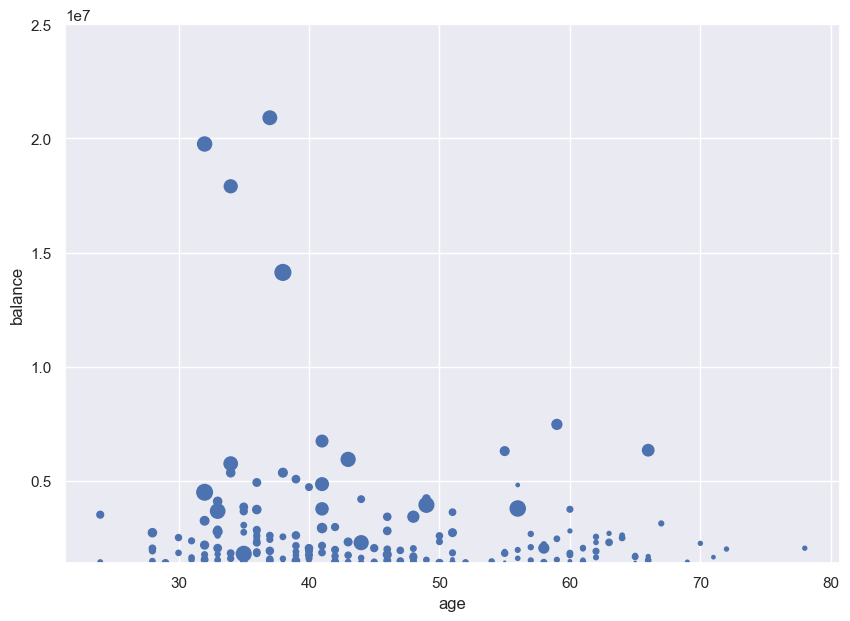

In [45]:
_ = (yescredit_2prod.query('est_salary < balance and balance > 1400000')['est_salary'])/10000
yescredit_2prod.query('est_salary < balance and balance > 1400000').plot.scatter (x='age', y='balance', s = _, figsize=(10,7))
plt.ylim(1400000, 25000000)
plt.show()

Точки более крупного размера характеризуют высокий уровень дохода, больше всего таких клиентов на отрезке 30-50 лет, тогда для данных клиентов сделаем предположение, что вторым продуктом может быть инвестиционный/брокерский счет. Для клиентов с точками меньшего размера или в возрасте от 50 лет не исключаем наличия инвестиций, либо это накопительный счет. 

Клиенты у которых 3 и 4 продукта составляют 10 и 5 % от всего датафрейма соответственно. Основные возможные варианты какими продуктами могут обладать клиенты мы рассмотрели выше. **Подытожим согласно нашим предположениям:**
- если баланс на счете клиента меньше оценочного дохода, то предполагаемым продуктом может быть текущий счет/дебетовая карта (небольшие балансы люди держат на текущие расходы) или какой-либо кредит (ипотечный, потребительский, автокредит)
- пропущенный баланс и балл собственности равный нулю может говорить о наличии задолженности у клиента, либо клиенту было отказано в предоставлении услуги, также это могут быть сотрудники банка либо клиенты зарплатного проекта
- если баланс на счете превышает доход, но ниже порога в 1.4 миллиона, предположительно у клиента открыт вклад или накопительный счет
- если клиент в возрасте до 50 лет и имеет высокий доход и баланс на счете, можем предполагать что клиенты знакомы с инвестициями и все деньги кладут не на депозит, а инвестируют, для клиентов после 50 лет продуктом может являться накопительный счет, но и не исключаем наличие инвестиционного продукта.

### Анализ клиентов банка по признаку отток (`churn`)  

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [46]:
(data
 .groupby('churn')
 .agg({
     'gender': pd.Series.mode,
     'city': pd.Series.mode,
     'age':'mean',
     'score':'mean',
     'equity':'mean',
     'products':'mean',
     'balance':'median',
     'est_salary':'median',
     'credit_card':'mean',
     'last_activity':'mean'
     })
 .round(2)
 .T
)

churn                  0          1
gender            female       male
city           Ярославль  Ярославль
age                43.02      41.43
score              845.4     863.36
equity              2.38       3.76
products            1.76       2.38
balance        475410.09   783908.9
est_salary      118227.6  125408.88
credit_card         0.71       0.55
last_activity       0.48        0.7

Значения всех признаков достаточно сильно различаются в зависимости от оттока. Женщины более лояльные, Ярославль встречается чаще, т.к. и самих клиентов из этого города гораздо больше. Построим визуализации для наглядного отображения оттока клиентов в зависимости от признаков. Сначала рассмотрим баланс и оценочный доход, будем использовать датафрейм с отфильтрованными максимальными значениями по 99 перцентилю. Далее будем рассматривать оставшиеся признаки с помощью гистограмм и столбчатых диаграмм

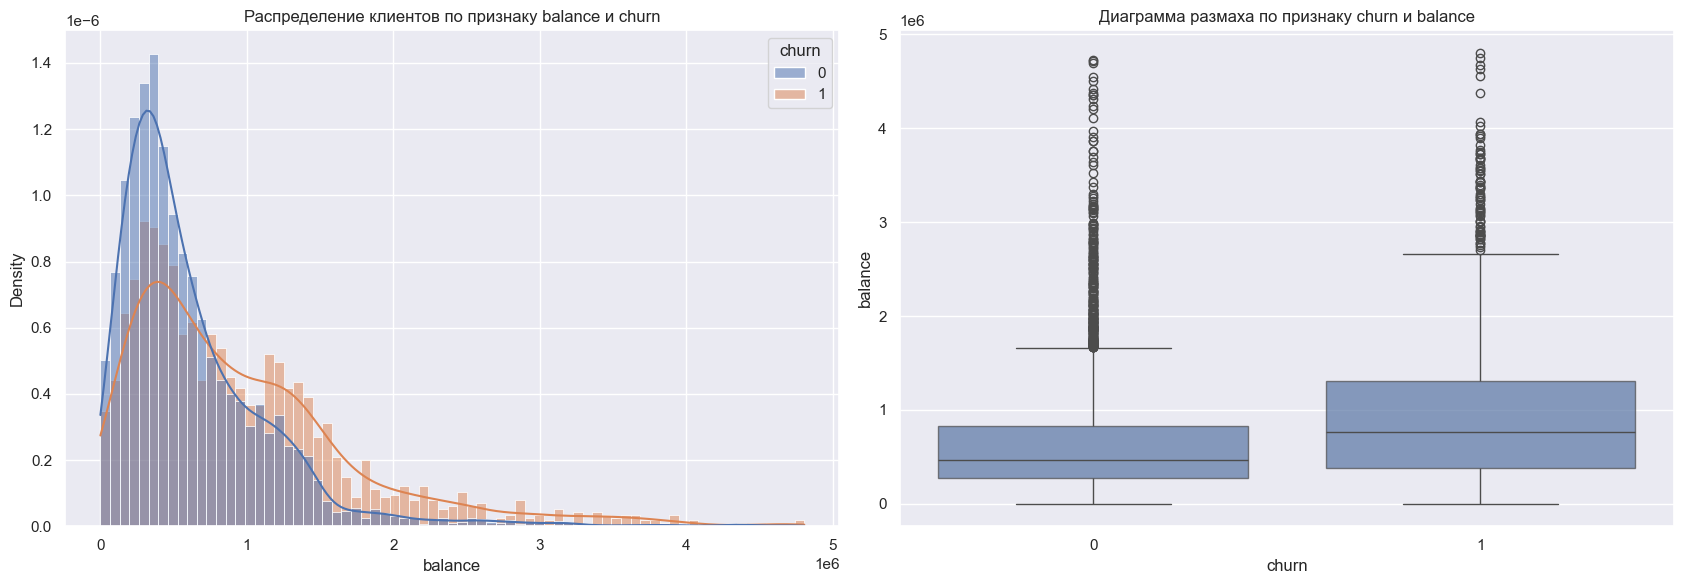

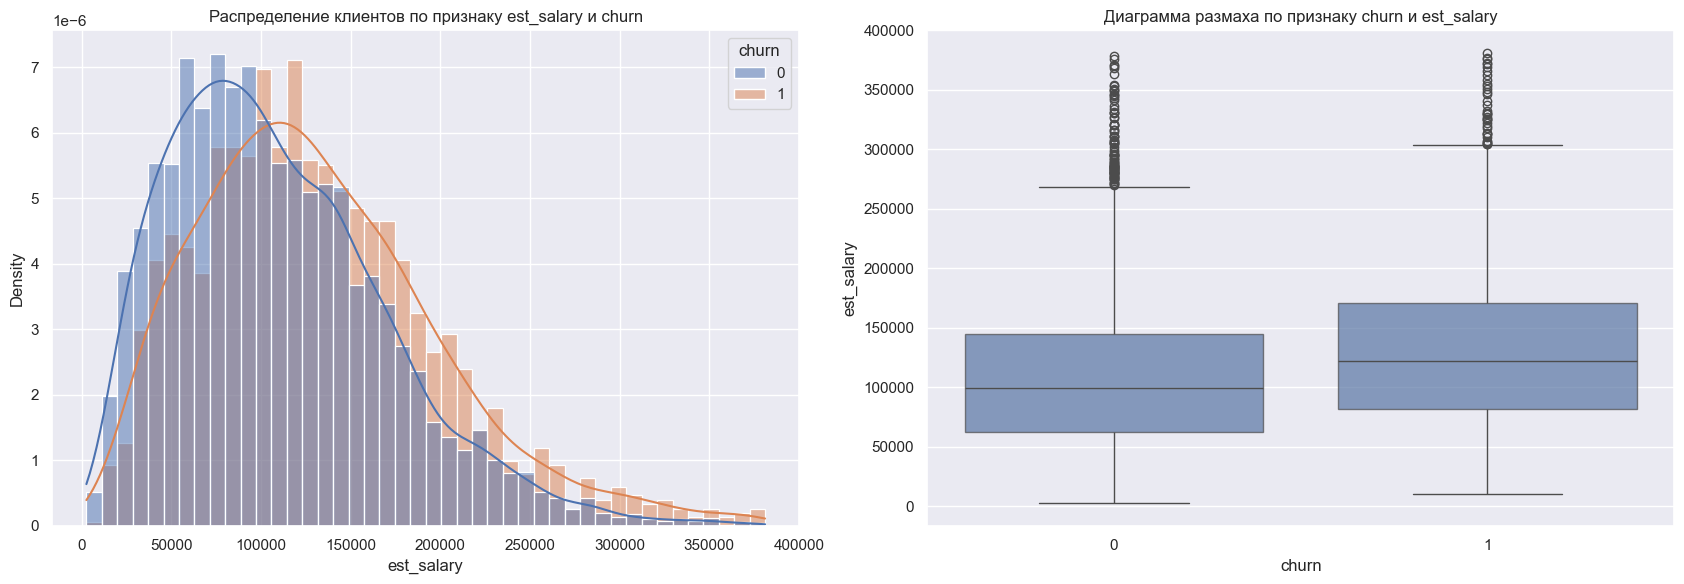

In [47]:
for column in ['balance', 'est_salary']:
    plt.figure(figsize=(17, 6))
    ax1 = plt.subplot(1, 2, 1)
    sns.histplot(x = column, data=no_outliers, hue='churn', common_norm=False, stat='density', kde=True, ax=ax1)
    plt.title(f'Распределение клиентов по признаку {column} и churn')
    
    ax2 = plt.subplot(1, 2, 2)
    sns.boxplot(x='churn', y = column, data=no_outliers, boxprops=dict(alpha=.7), ax=ax2)
    plt.title(f'Диаграмма размаха по признаку churn и {column}')
    plt.tight_layout()
    plt.show()     

- по признаку balance клиенты с балансом на счете ~ до 700 тысяч с большей вероятностью не определены в отток, после этого значения вероятность попадания в отток возрастает. Медианное значение баланса у клиентов в оттоке выше чем у оставшихся клиентов (~ 700 тысяч против 500 тысяч)
- по оценочному доходу видим похожий график - клиенты с доходом до 100 тысяч не попадают в отток, далее вероятность попадания в отток увеличивается. Медианное значение дохода у клиентов в оттоке выше (~ 125 тысяч против 100 тысяч)
- исходя из графиков можно предположить, что чем больше доход и баланс на счете, тем возрастает вероятность попадания клиента в отток

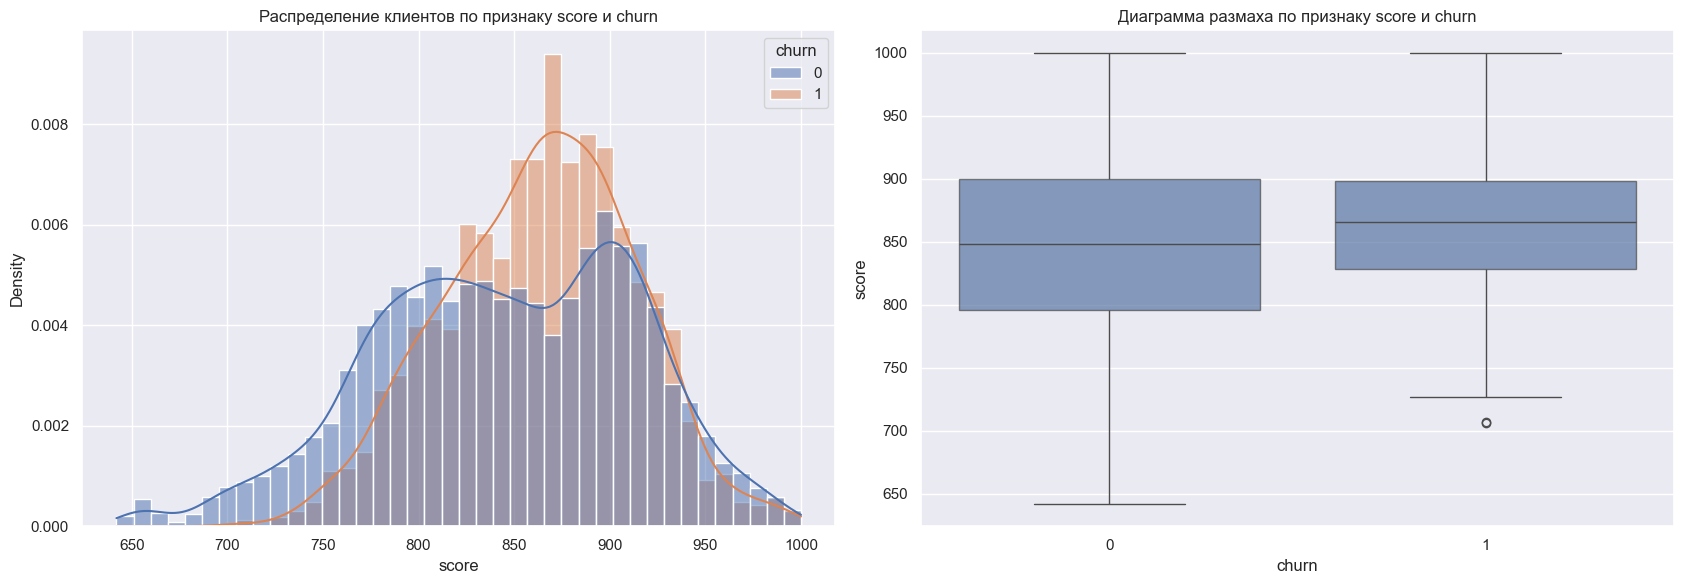

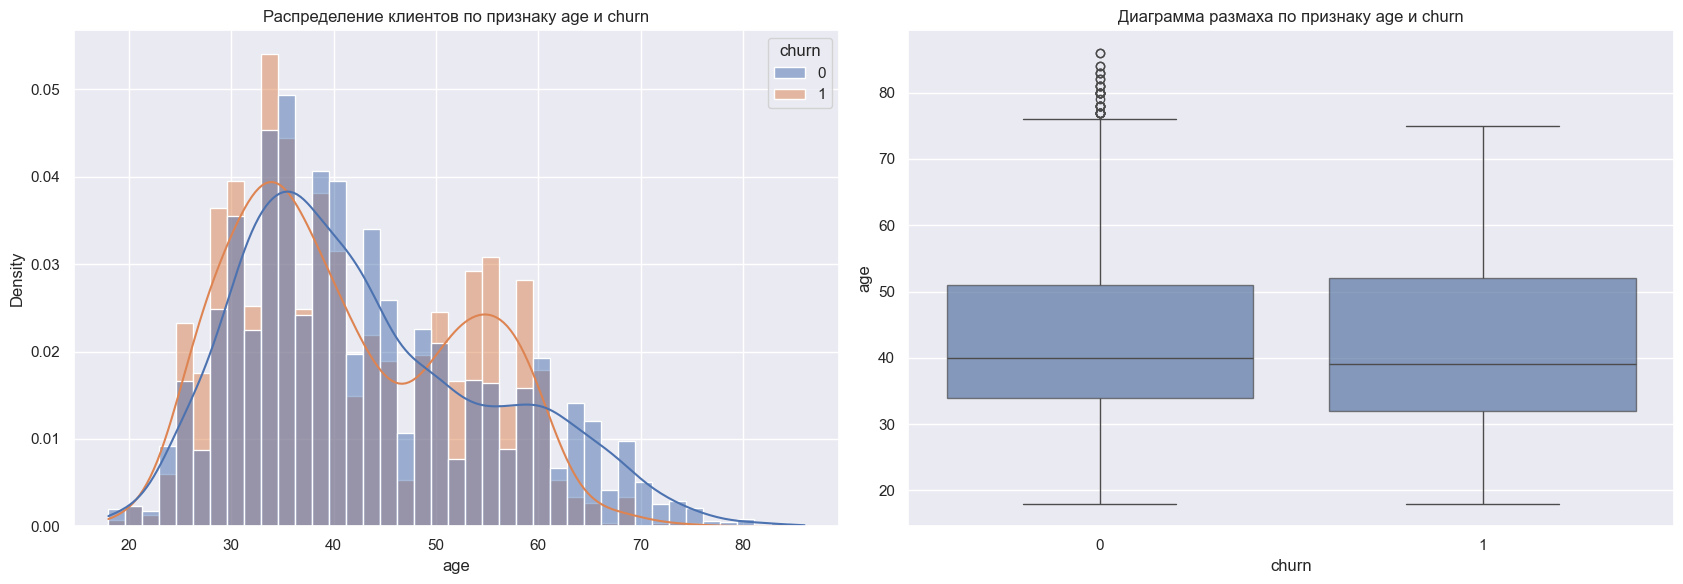

In [48]:
for column in ['score', 'age']:
    plt.figure(figsize=(17, 6))
    ax1 = plt.subplot(1, 2, 1)
    sns.histplot(x = column, data=data, hue='churn', common_norm=False, stat='density', kde=True, ax=ax1)
    plt.title(f'Распределение клиентов по признаку {column} и churn')
    
    ax2 = plt.subplot(1, 2, 2)
    sns.boxplot(x='churn', y = column, data=data, boxprops=dict(alpha=.7), ax=ax2)
    plt.title(f'Диаграмма размаха по признаку {column} и churn')
    plt.tight_layout()
    plt.show()     

- клиенты с баллом кредитного скоринга до 820 и более 940 с большей вероятностью не попадают в отток, для клиентов с баллом скоринга в интервале 830-920 вероятность попадания в отток возрастает. Медианное значение балла скоринга у клиентов в оттоке выше (870 против 850)
- согласно графику распределения клиентов по возрасту с большей вероятностью в отток попадают клиенты в возрасте до 35 лет и в возрасте 50-60 лет. Средние и медианные показатели возраста клиентов попавших в отток ниже, чем клиенты не в оттоке: средний возраст 41 против 43 и медианный - 39 против 40 лет

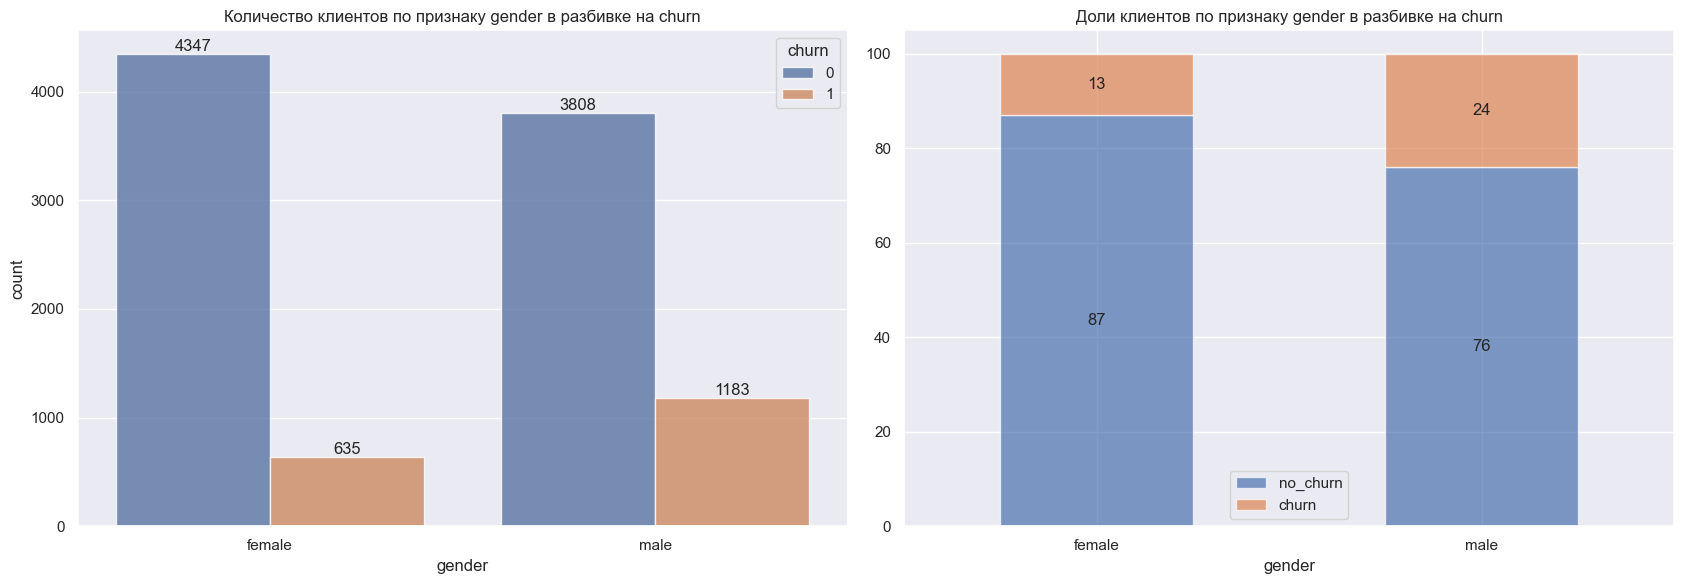

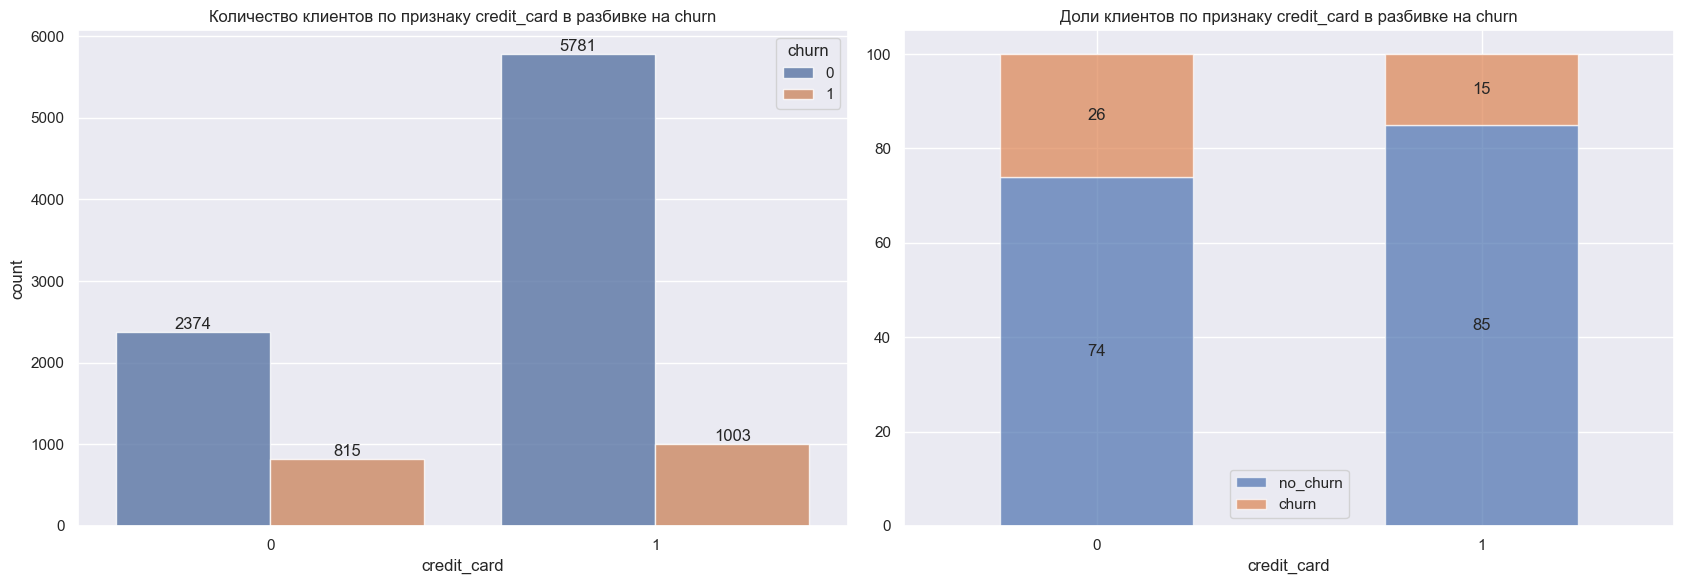

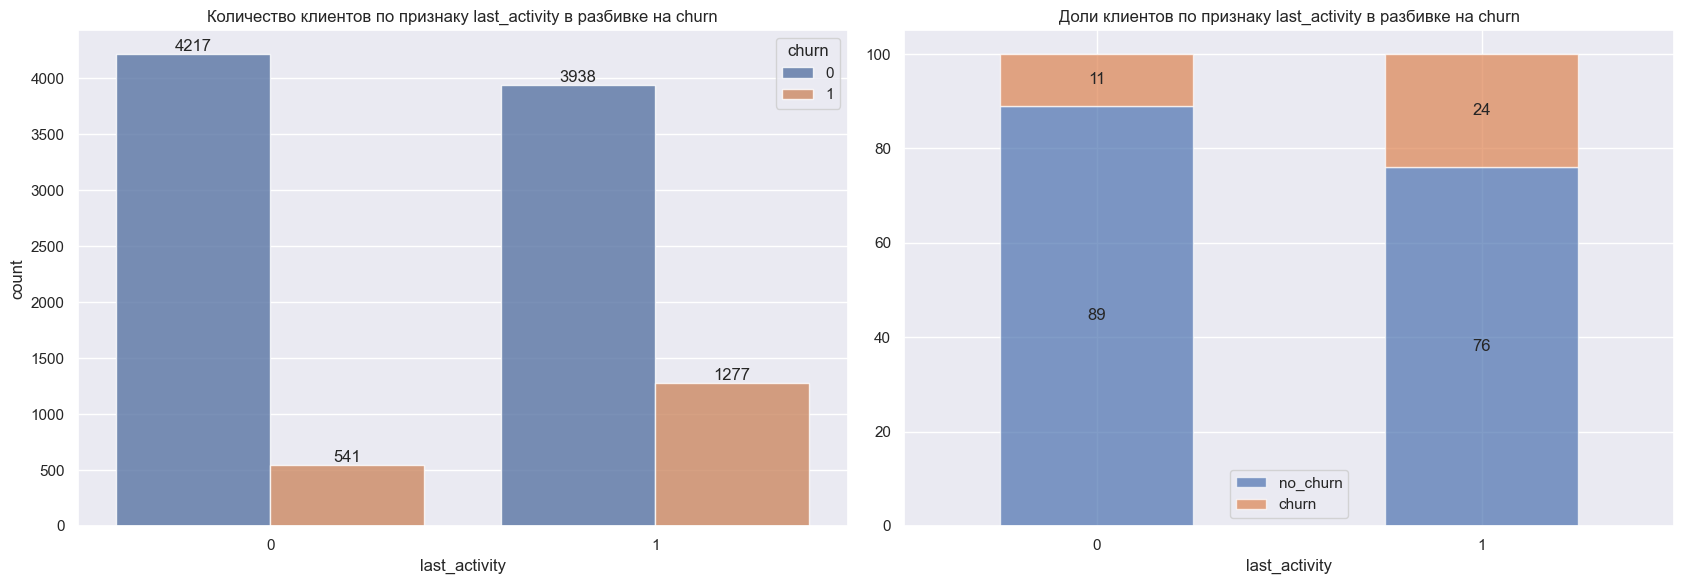

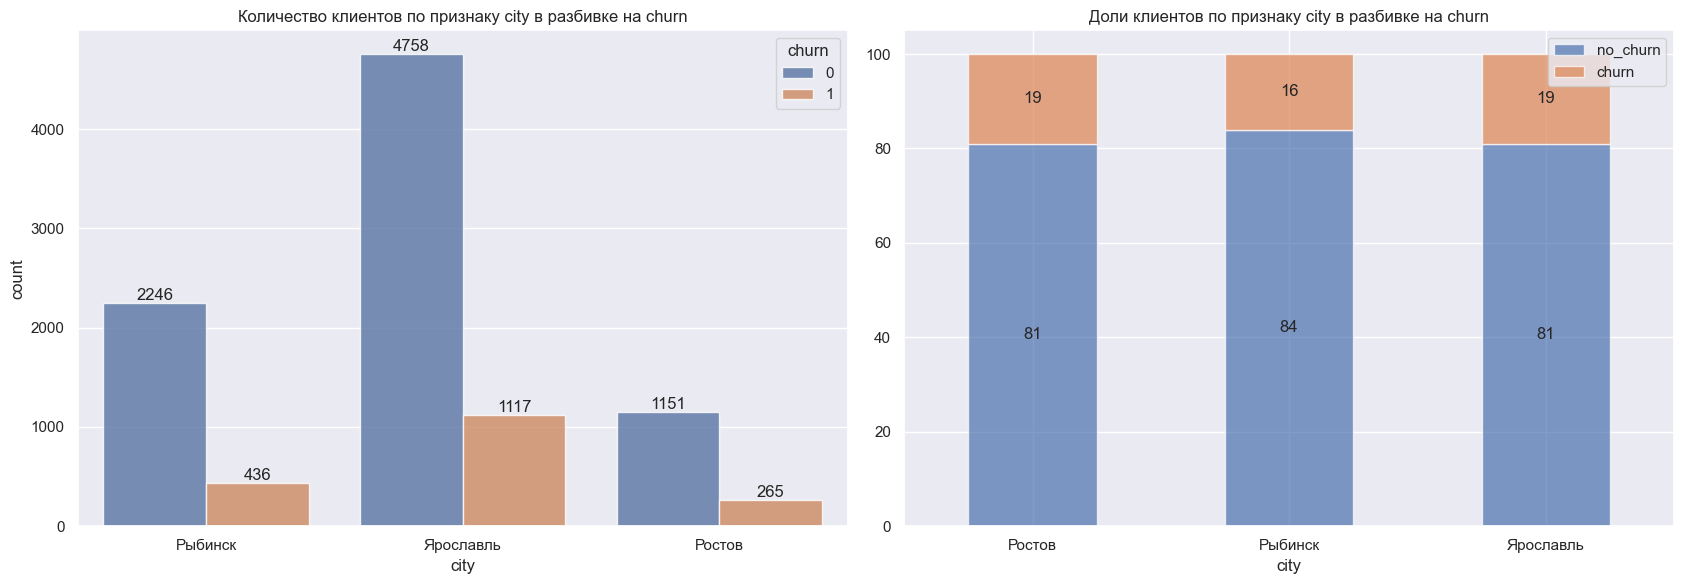

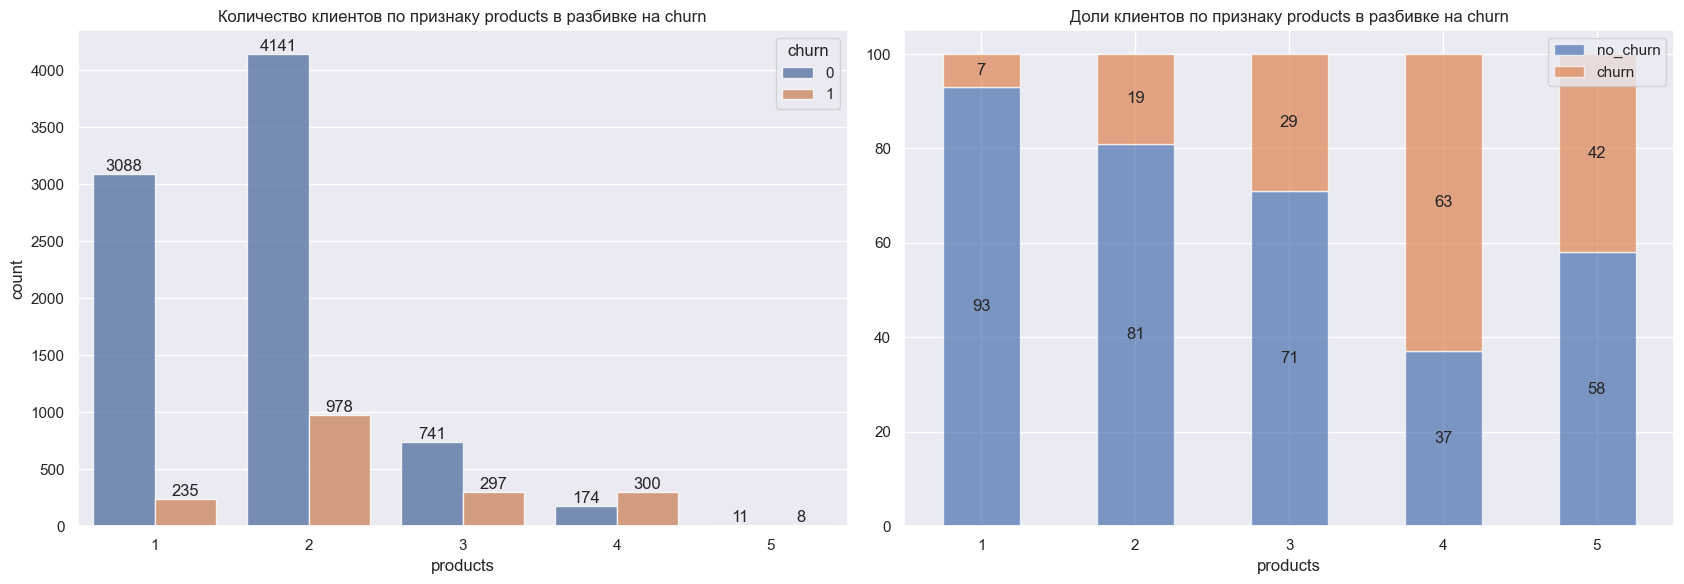

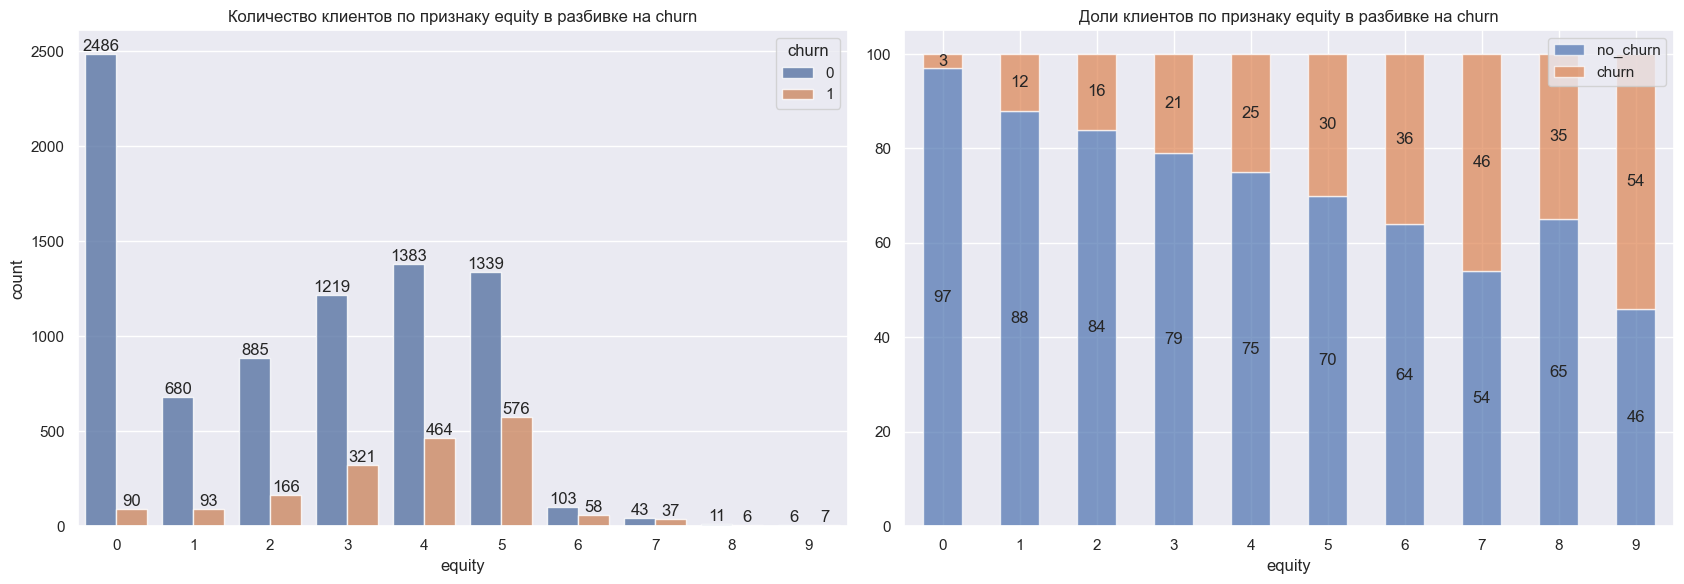

In [49]:
for column in ['gender', 'credit_card', 'last_activity', 'city', 'products', 'equity']:
    plt.figure(figsize=(17, 6))
    ax1 = plt.subplot(1, 2, 1)
    ax = sns.countplot(x = column, data=data, hue='churn', alpha = .8, ax=ax1)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Количество клиентов по признаку {column} в разбивке на churn')
    
    ax2 = plt.subplot(1, 2, 2)
    df = (data.groupby(column)['churn'].mean()*100).round().reset_index()
    df['no_churn'] = 100 - df['churn']
    ax = df.plot(x = column, kind='bar', rot=0, stacked=True, y=['no_churn', 'churn'], alpha = .7, ax=ax2)
    for container in ax.containers:
        ax.bar_label(container, label_type='center')
    plt.title(f'Доли клиентов по признаку {column} в разбивке на churn')
    plt.tight_layout()
    plt.show()

- в нашем датафрейме мужчины и женщины распределены практически в равных долях 50х50, при этом среди всех мужчин 24% определено в отток, у женщин этот показатель ниже - 13%
- среди всех пользователей, у которых отсутствует кредитная карта, доля оттока составляет 26%, клиенты, имеющие кредитную карту, уходят в отток реже - 15%
- активные клиенты чаще уходят в отток - 24 % (против 11% у неактивных клиентов)
- среди жителей разных городов доли оттока распределены приблизительно одинаково, среди всех клиентов из Рыбинска доля оттока составляет 16%, для клиентов из Ярославля и Ростова долии оттока равны - 19%. Таким образом можно предположить, что город проживания клиента не влияет на отток
- с ростом количества продуктов у клиента возрастает доля оттока. Среди всех клиентов, больше всего тех, у которых 1 и 2 продукта, доли оттока составляют 7 и 19 % соответственно. У клиентов с 4 продуктами отток составляет 63% 
- доля оттока увеличивается и с ростом баллов собственности. Самая многочисленная группа с баллом собственности 0 показывает минимальный процент оттока - 3%, доля оттока более 18% (среднее значение по всем пользователям) начинается с балла собственности 3 и более.

Далее рассмотрим отток клиентов в зависимости от количества продуктов, которыми пользуется клиент и также в разрезе признаков.  
Посмотрим распределение оттока по количеству продуктов и баллов собственности (equity)

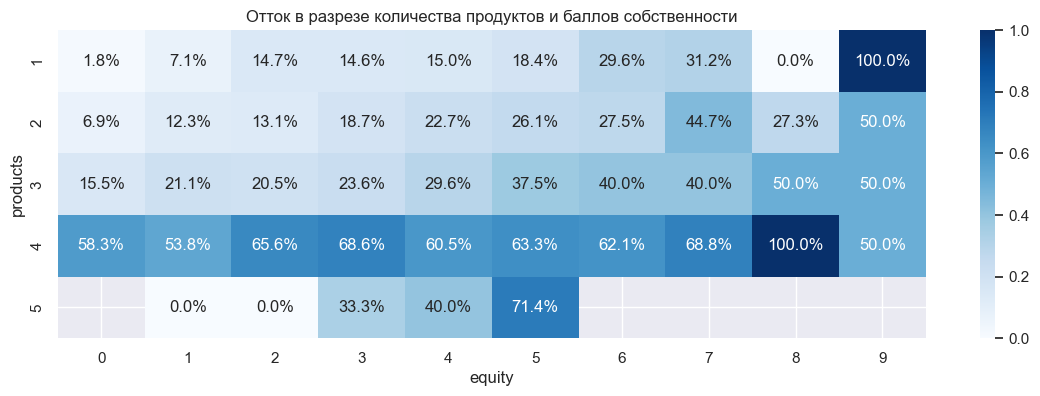

In [50]:
plt.figure(figsize=(14,4))
sns.heatmap((data
             .pivot_table(index = 'products', columns = 'equity', values = 'churn', aggfunc = 'mean')), 
            annot=True, 
            cmap='Blues', 
            fmt='.1%')
plt.title('Отток в разрезе количества продуктов и баллов собственности')
plt.show()

Самая "яркая" строка, это клиенты у которых 4 продукта банка (всего таких клиентов 474 человек), по всем баллам собственности процент оттоко 50 и выше. Также видим, что чем выше балл собственности, тем выше процент оттока.  
Нам уже известно, что больше всего клиентов с 1 и 2мя продуктами и средний % оттока по данным 18%. Для пользователей с одним продуктом процент оттока свыше 18 начинается с балла собственности 5, для клиентов с двумя продуктами процент свыше 18 - с балла собственности 3. Самые низкие проценты оттока у клиентов с 1-2 продуктами и баллами собственности 0-1.  

Построим таблицы оттока для оставшихся признаков в разрезе продуктов

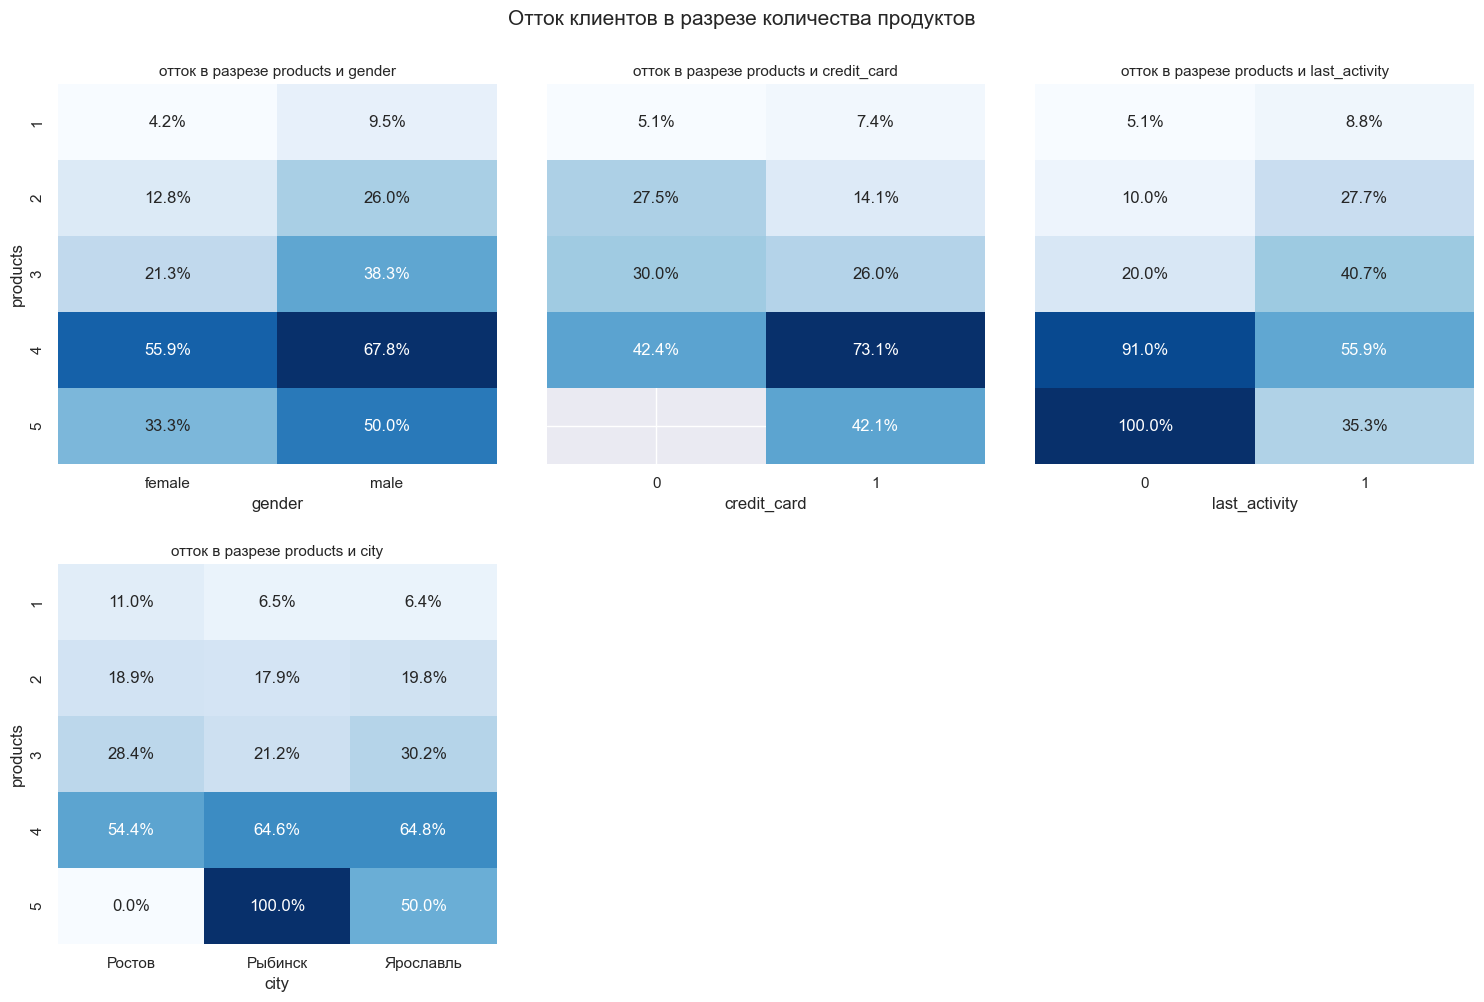

In [51]:
columns = ['gender', 'credit_card', 'last_activity', 'city']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey = True)
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Отток клиентов в разрезе количества продуктов', fontsize=15, y=1)
for column, ax in zip(columns, axs.ravel()):
    df = data.pivot_table(index = 'products', columns = column, values = 'churn', aggfunc = 'mean')
    sns.heatmap(df, annot=True, cmap='Blues', fmt='.1%', cbar = False, ax=ax)
    ax.set_title(f'отток в разрезе products и {column}', fontsize=11)
    ax.set_ylabel('')
for i in range(len(columns), len(axs.flatten())):
    fig.delaxes(axs.flatten()[i])
plt.setp(axs[:, 0], ylabel='products')
plt.tight_layout(h_pad= 2, w_pad=3)
plt.show()

Как и выше, по всем признакам самый высокий процент оттока у пользователей с 4 продуктами и с ростом количества продуктов растет отток. Самые надежные клиенты с одним продуктом.  
В разрезе количества продуктов и признаков:
- по всем продуктам % оттока мужчин выше чем у женщин
- клиенты обладающие кредитной картой и количеством продуктов от 3х чаще попадают в отток, для клиентов без кредитной карты отток увеличивается уже с 2х продуктов
- активные клиенты чаще уходят в отток, у неактивнык клиентов с 4 и 5 продуктами процент оттока больше 90%, но стоит помнить, что их количество во всем датафрейме незначительное (~5%)
- среди городов картина приблизительно одинаковая - уровень оттока растет с количеством используемых продуктов

**Вывод**  *Портрет клиента, попадающего в отток*  
Главное что стоит отметить - большинство клиентов все же остаются лояльными к банку.  
Чаще других в отток попадают клиенты:
- с балансом на счете более 700 тысяч и с оценочным доходом более 100 тысяч
- в возрасте до 35 лет и 50-60 лет
- с баллом сотственности от 3 и количеством продуктом от 2х
- без кредитной карты и более активные клиенты
- с баллом скоринга в интервале 830-920 вероятность попадания в отток возрастает
- мужчины чаще попадают в отток чем женщины  

Город проживания клиента практически не влияет на отток

### Корреляционный анализ  

Построим матрицы корреляций, чтобы увидеть наличие/отсутствие взаимосвязей между признаками клиентов. Воспользуемся ранговой корреляцией Спирмена и корреляцией из библиотеки phik, которая основана на подсчете  хи-квадрат статистики и трансформации ее в коэффициент на отрезке от 0 до 1.  

**Коэффициент корреляции Спирмена**

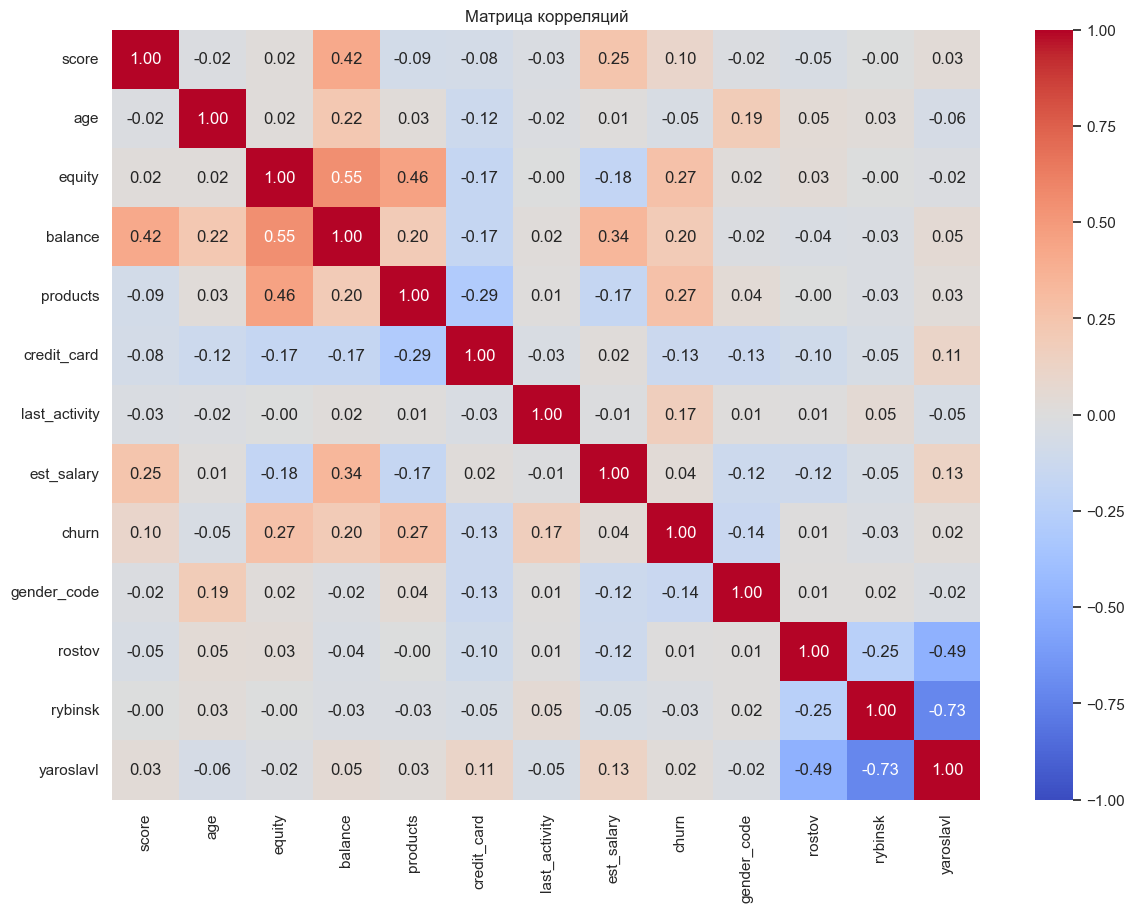

In [52]:
spearman_corr = (data.drop(['user_id', 'balance_na'], axis= 1)).corr(method='spearman')
#spearman_corr.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1, axis=None)
plt.figure(figsize=(14,10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin = -1, vmax = 1, center = 0)
plt.title('Матрица корреляций')
plt.show()

Согласно матрице и шкале Чеддока
- заметная взаимосвязь наблюдается только у пары признаков баланс на счете (balance) и балл собственности (equity) - 0.55
- умеренные взаимосвязи между признаками:
    - баланс на счете (balance) и балл кредитного скоринга (score) - 0.42
    - количество продуктов (products) и балл собственности (equity) - 0.46
- практические нулевая корреляция у признаков активность клиента (last_activity) и у признаков с городом проживания клиентов
- у целевого признака оттока (churn) слабые взаимосвязи с другими признаками, можно отметить признаки: балл собственности (equity) - 0.27, баланс на счете (balance) - 0.2 и количество продуктов (products) - 0.27. Заметим, что есть признаки с обратной корреляцией, значит при усилении признака - снижается отток клиентов.  

**Корреляция phik**

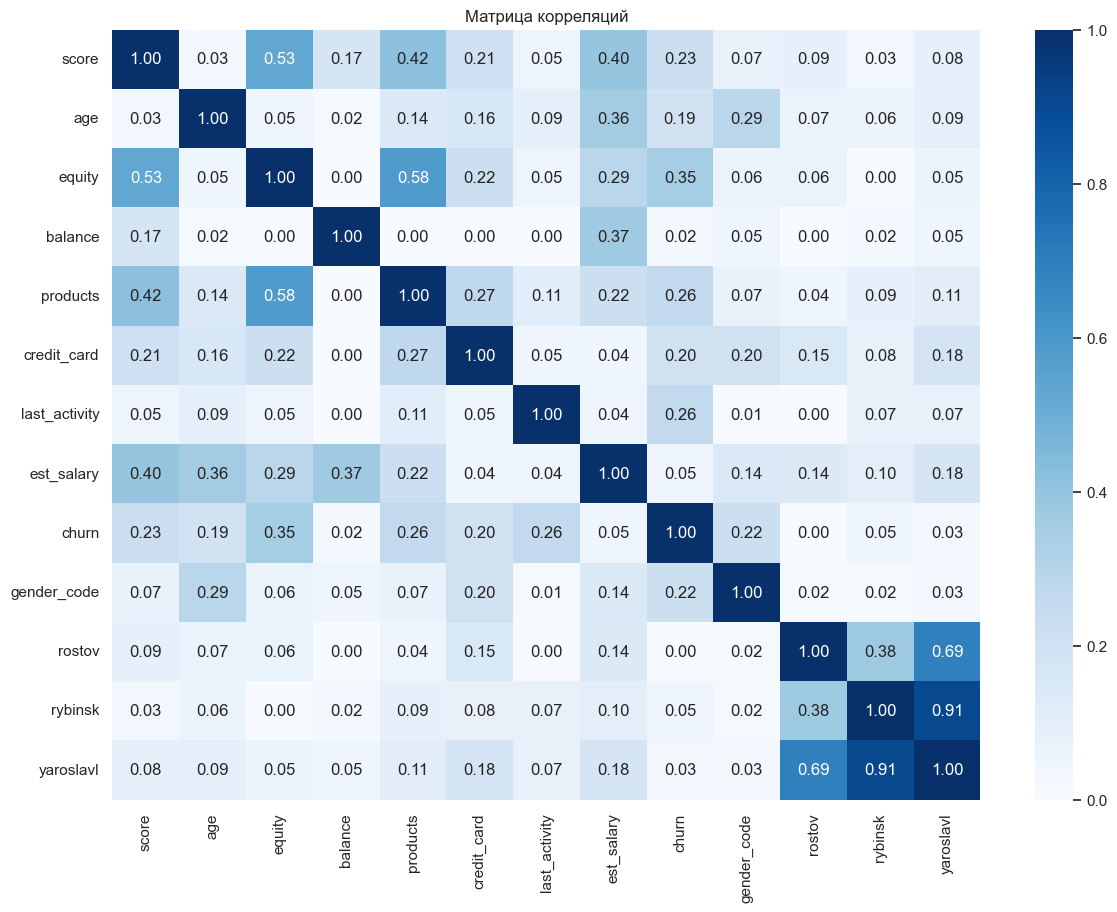

In [53]:
phik_corr = ((data
              .drop(['user_id', 'balance_na', 'city', 'gender'], axis= 1))
             .phik_matrix(interval_cols = ['score', 'balance', 'age', 'est_salary']))
#phik_corr.style.background_gradient(cmap='Blues', vmin=0, vmax=1, axis=None)
plt.figure(figsize=(14,10))
sns.heatmap(phik_corr, annot=True, cmap='Blues', fmt='.2f', vmin = 0, vmax = 1)
plt.title('Матрица корреляций')
plt.show()

сильные взаимосвязи видны между признаками:
- балл кредитного скоринга (score) и количество продуктов (products) - 0.42
- балл кредитного скоринга (score) и балл собственности (equity) - 0.53
- количество продуктов (products) и балл собственности (equity) - 0.58 (корреляция Спирмена также демонстрирует умеренную взаимосвязь)  

У целевого признака оттока (churn) как и в корреляции Спирмена видны слабые взаимосвязи с другими признаками, можно отметить признаки: балл кредитного скоринга (score) - 0.23, балл собственности (equity) - 0.35, количество продуктов (products) - 0.26, активность клиентов (last_activity) - 0.26

**Выводы**  

В данном разделе мы посмотрели на портрет типичного клиента банка, особенности наличия кредитной карты у клиентов, количество продуктов, которым пользуется клиент и клиентов попадающих в отток.  
Портрет клиента:
 - мужчины и женщины распределены в равных долях
 - больше всего клиентов в возрасте 32-37 лет
 - 59% клиентов из города Ярославль
 - у 51% клиента 2 продукта, далее клиенты с одним продуктом - 33%
 - 68% клиентов владеют кредитной картой
 - самые высокие показатели медианного баланса у клиентов без кредитной карты, клиентов с баллом собственности 5 и количеством продуктов 4 
 
Клиенты, обладающие кредитной картой:
 - до 45 лет
 - балл кредитного скоринга до 720
 - размер оценочного дохода не влияет на наличие кредитной карты, баланс на счете до 500 тысяч
 - среди мужчина - 74% карта имеется, у женщин этот показатель 62%
 - среди клиентов с одним продуктом у 86% имеется кредитная карта, далее этот показатель снижается
 - чаще кредитная карта выдана клиентам с баллом собственности 0 и 1  
 
Количество продуктов:  

 - с увеличением количества продуктов растет среднее значение баланса на счете и количество баллов собственности, также растет процент оттока клиентов, максимальное значение 63% у клиентов с 4 продуктами
 - самый высокий медианный оценочный доход у клиентов с одним продуктом, самый низкий - клиенты с 3 продуктами
 - у всех клиентов с 5 продуктами есть кредитная карта, у клиентов с тремя продуктами в большей степени кредитная карта отсутствует
 -  выдвинутые предположения об используемых продуктах:
   - если баланс на счете клиента меньше оценочного дохода, то предполагаемым продуктом может быть текущий счет/дебетовая карта либо кредит (ипотечный, потребительский, автокредит)
   - пропущенный баланс и балл собственности равный нулю может говорить о наличии задолженности у клиента, либо клиенту было отказано в предоставлении услуги, также данные клиенты могут являться сотрудниками банка либо клиентами зарплатного проекта
   - если баланс на счете превышает доход, но ниже порога в 1.4 миллиона (страховая сумма от АСВ), предположительно у клиента открыт вклад или накопительный счет
   - если клиент в возрасте до 50 лет и имеет высокий доход и баланс на счете, можем предполагать что клиенты знакомы с инвестициями и все деньги кладут не на депозит, а инвестируют, для клиентов после 50 лет продуктом может являться накопительный счет, но и не исключаем наличие инвестиционного продукта.  
   
Портрет клиента, попадающего в отток, чаще других в отток попадают клиенты:
- с балансом на счете более 700 тысяч и с оценочным доходом более 100 тысяч
- в возрасте до 35 лет и 50-60 лет
- с баллом собственности от 3 и количеством продуктом от 2х
- без кредитной карты и более активные клиенты
- с баллом скоринга в интервале 830-920 вероятность попадания в отток возрастает
- мужчины чаще попадают в отток чем женщины  
- город проживания клиента практически не влияет на отток  

Корреляционный анализ:
 - Согласно матрицы корреляции Спирмена заметная взаимосвязь наблюдается только у пары признаков баланс на счете (balance) и балл собственности (equity) - 0.55, умеренные взаимосвязи между признаками баланс на счете (balance) и балл кредитного скоринга (score) - 0.42; количество продуктов (products) и балл собственности (equity) - 0.46. У целевого признака оттока (churn) слабые взаимосвязи с другими признаками, можно отметить признаки: балл собственности (equity) - 0.27, баланс на счете (balance) - 0.2 и количество продуктов (products) - 0.27. Заметим, что есть признаки с обратной корреляцией, значит при усилении признака - снижается отток клиентов.  
 - Корреляция phik - сильные взаимосвязи видны между признаками балл кредитного скоринга (score) и количество продуктов (products) - 0.42, балл кредитного скоринга (score) и балл собственности (equity) - 0.53, количество продуктов (products) и балл собственности (equity) - 0.58. У целевого признака оттока (churn) как и в корреляции Спирмена видны слабые взаимосвязи с другими признаками, можно отметить признаки: балл кредитного скоринга (score) - 0.23, балл собственности (equity) - 0.35, количество продуктов (products) - 0.26, активность клиентов (last_activity) - 0.26

## Шаг 3. Проверка статистических гипотез  

Первым делом нам необходимо подготовить данные и избавиться от пропусков в них.

In [54]:
new_df = data.copy()
new_df.dropna(inplace=True)

In [55]:
# функция для построения гистограмм двух выборок

def plot_hypotheses(data_1, data_2, title = '', label_1 = '', label_2 = '', x_label = '', lim = (None, None)):
    plt.figure(figsize=(15,6))
    sns.histplot(data = data_1, color = '#009797',alpha = .7, label=label_1)
    sns.histplot(data = data_2, color = '#c1e5e5',alpha = .7, label=label_2)
    plt.axvline(data_1.mean(), c='k', ls='-', lw=2, label='средний' + ' ' + label_1)
    plt.axvline(data_2.mean(), c='k', ls='--', lw=2, label='средний' + ' ' + label_2)
    plt.title(title,fontsize = 15)
    plt.xlabel(x_label, fontsize = 13)
    plt.ylabel('Количество клиентов', fontsize = 13)
    plt.xlim(lim)
    plt.legend()
    plt.show()

### Гипотеза. Возраст клиентов, пользующихся одним продуктом равен возрасту клиентов, пользующихся двумя продуктами.  

Сформулируем нулевую и альтернативную гипотезы:

`H0` : средние показатели возраста клиентов с одним и двумя продуктами равны  
`H1` : средние показатели возраста клиентов с одним и двумя продуктами различаются  

Уровень статистической значимости примем равным 5%.  

Создадим две выборки с возрастом клиентов, которые используют один и два продукта.

In [56]:
# зададим уровень значимости

alpha = 0.05

# две выборки для первой гипотезы

age_one_p = new_df.query('products == 1')['age']
age_two_p = new_df.query('products == 2')['age']
print(f'\nРазмер выборки с одним продуктом - {len(age_one_p)} \nРазмер выборки с двумя продуктами - {len(age_two_p)}')


Размер выборки с одним продуктом - 1389 
Размер выборки с двумя продуктами - 4804


Выборки достаточно велики и независимы, их размеры значительно отличаются. Построим график распределения значений двух выборок

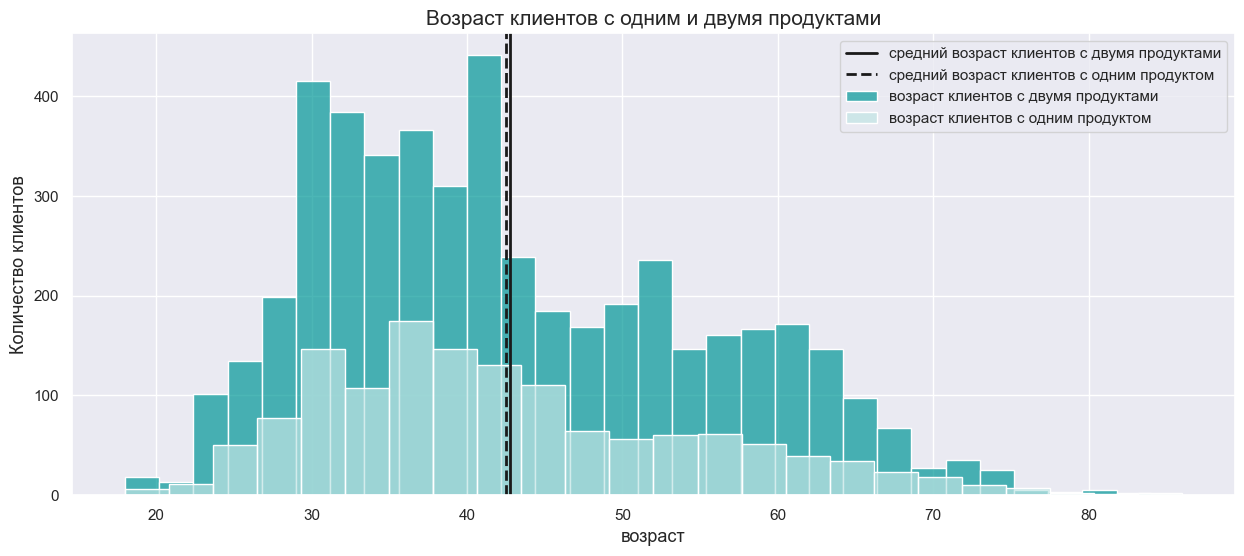

In [57]:
plot_hypotheses(age_two_p, age_one_p, 'Возраст клиентов с одним и двумя продуктами',\
                'возраст клиентов с двумя продуктами', 'возраст клиентов с одним продуктом', 'возраст')

Распределения слабо похожи на нормальные, но в данном случае нас интересуют средние значения случайных выборок.  
Так в нашем распоряжении выборки больших размеров и при многократном вычислении средних значений из выборок, выбранных лучайным образом, среднее значение будет стремиться к ее математическому ожиданию, что обосновано законом больших чисел.  
Также выборочные средние нормально распределены - это условие не должно быть препятствием благодаря Центральной предельной теореме.  
В данном случае, принимая во внимание неравные размеры выборок и допущение о нормальном распределении выборочных средних, будем использовать t-критерий Уэлча (и параметром equal_var равное False, чтобы тест посчитал дисперсии выборок по отдельности), который является модификацией стандартного t-критерия Стьюдента и учитывает неравные отклонения в двух распределениях.

In [58]:
results = st.ttest_ind(age_two_p, age_one_p, equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('\n\033[0;31m Отвергаем нулевую гипотезу\033[0m')
else:
    print('\n\033[0;32m Нет оснований отвергнуть нулевую гипотезу\033[0m')   

p-value:  0.418116562354069

 Нет оснований отвергнуть нулевую гипотезу


В данном случае значение p-value превышает уровень статистической значимости, поэтому оснований отвергать нулевую гипотезу (о равенстве средниx показателей возраста клиентов с одним и двумя продуктами) у нас нет. Посмотрим на средние показатели возраста в двух группах

In [59]:
print(f'\n\033[1;30m Средний возраст клиентов с одним продуктом: \033[0m {age_one_p.mean().round(2)}\
          \n\033[1;30m Средний возраст клиентов с двумя продуктами: \033[0m {age_two_p.mean().round(2)}\n')


 Средний возраст клиентов с одним продуктом:  42.48          
 Средний возраст клиентов с двумя продуктами:  42.78



Среднее значение возраста клиентов, пользующихся одним и двумя продуктами - 42 года.  

Согласно матрицам корреляции, рассмотренным выше, остался открытым вопрос влияет ли доход клиентов на количество используемых продуктов банка. Сформулируем вторую гипотезу.

### Гипотеза. Оценочный доход клиентов, пользующихся одним продуктом равен оценочному доходу клиентов, пользующихся двумя продуктами.  

Сформулируем нулевую и альтернативную гипотезы:

`H0` : средние показатели дохода клиентов с одним и двумя продуктами равны  
`H1` : средние показатели дохода клиентов с одним и двумя продуктами различаются  

Уровень статистической значимости примем равным 5%.  

Создадим две выборки с доходом клиентов, которые используют один и два продукта

In [60]:
salary_one_p = new_df.query('products == 1')['est_salary']
salary_two_p = new_df.query('products == 2')['est_salary']
print(f'\nРазмер выборки с одним продуктом - {len(salary_one_p)} \nРазмер выборки с двумя продуктами - {len(salary_two_p)}')


Размер выборки с одним продуктом - 1389 
Размер выборки с двумя продуктами - 4804


Размер выборок различается, посмотрим на графики

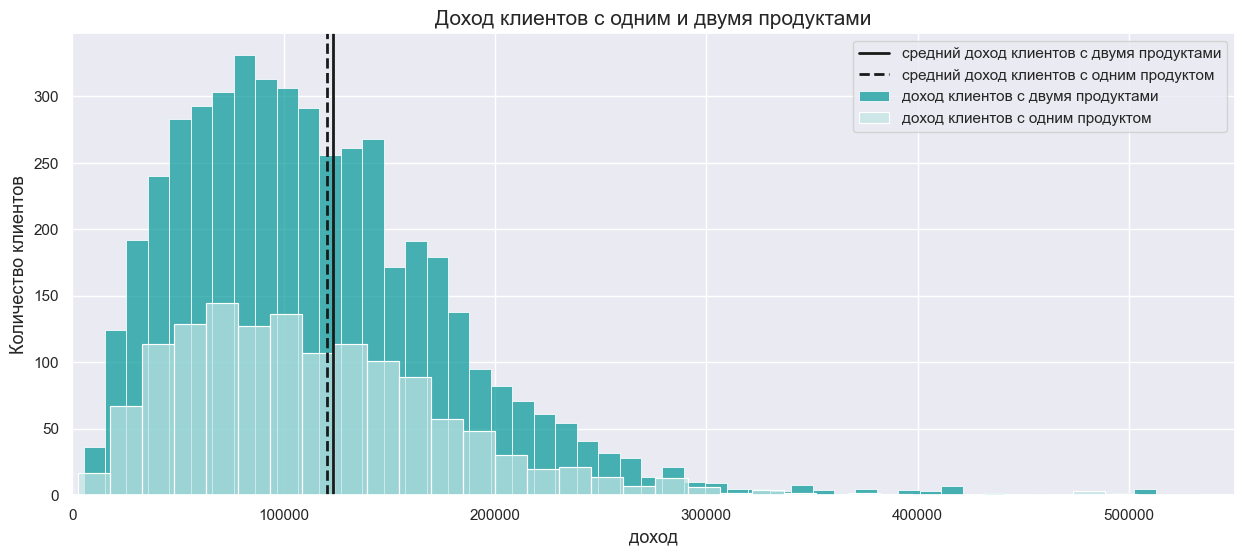

In [61]:
plot_hypotheses(salary_two_p, salary_one_p, 'Доход клиентов с одним и двумя продуктами',\
                'доход клиентов с двумя продуктами', 'доход клиентов с одним продуктом',\
                'доход', (0, 550000))

Мы наблюдаем длинный правый хвост значений и при распределении выборочных средних на них будут влиять выбросы, но в силу Центральной предельной теоремы и выборок больших размеров мы снова можем использовать критерий Уэлча (указав параметр equal_var = False).

In [62]:
results = st.ttest_ind(salary_one_p, salary_two_p, equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('\n\033[0;31m Отвергаем нулевую гипотезу\033[0m')
else:
    print('\n\033[0;32m Нет оснований отвергнуть нулевую гипотезу\033[0m')   

p-value:  0.3119426377688668

 Нет оснований отвергнуть нулевую гипотезу


In [63]:
print(f'\n\033[1;30m Средний показатель дохода клиентов с одним продуктом: \033[0m {salary_one_p.mean().round(2)}\
          \n\033[1;30m Средний показатель дохода клиентов с двумя продуктами: \033[0m {salary_two_p.mean().round(2)}\n')


 Средний показатель дохода клиентов с одним продуктом:  120360.73          
 Средний показатель дохода клиентов с двумя продуктами:  123411.54



Принимаем нулевую гипотезу о равенстве среднего оценочного дохода клиентов с одним продуктом и с двумя продуктами.  
Средние показатели по группам составили 120 и 123 тысячи.  

При исследовательском анализе данных мы отметили различия в балансе пользователей, определенных в отток и оставшихся. Проверим есть ли статистически значимые различия. Сформулируем третью гипотезу 

### Гипотеза. Баланс клиентов, определенных в отток равен балансу оставшихся клиентов.  

Сформулируем нулевую и альтернативную гипотезы:

`H0` : средние показатели баланса лояльных и отточных клиентов равны  
`H1` : средние показатели баланса лояльных и отточных клиентов различаются  

Уровень статистической значимости примем равным 5%.  

Создадим две выборки с балансом клиентов, которые определены в отток и остались, построим график распределения

In [64]:
balance_no_churn = new_df.query('churn == 0')['balance']
balance_churn = new_df.query('churn == 1')['balance']
print(f'\nРазмер выборки с лояльными клиентами - {len(balance_no_churn)} \
\nРазмер выборки с клиентами в оттоке - {len(balance_churn)}')


Размер выборки с лояльными клиентами - 5889 
Размер выборки с клиентами в оттоке - 1806


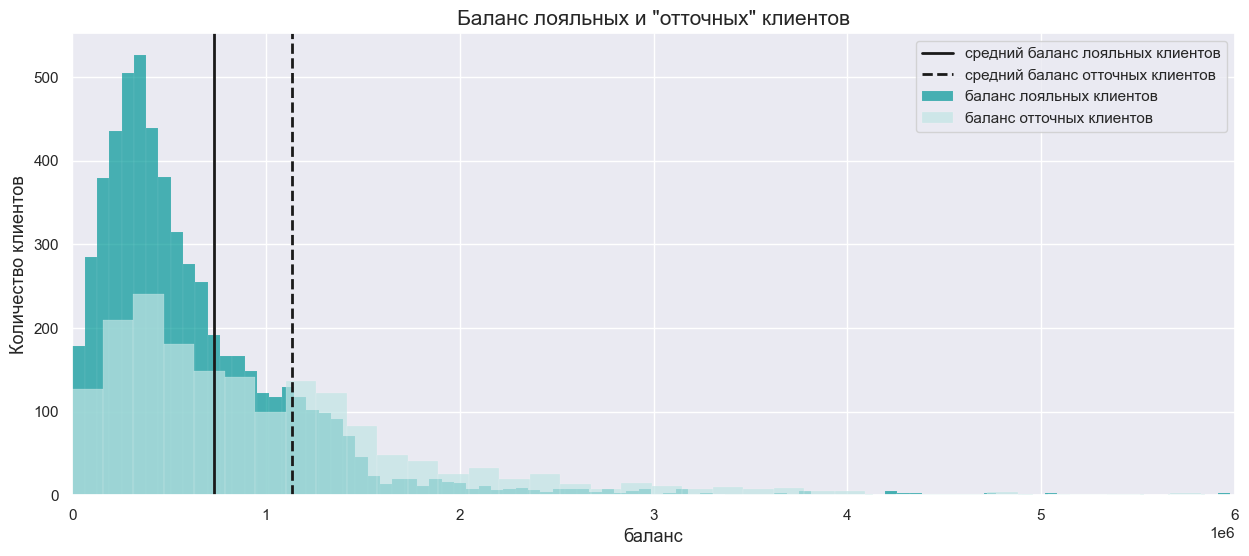

In [65]:
plot_hypotheses(balance_no_churn, balance_churn, 'Баланс лояльных и "отточных" клиентов',\
                'баланс лояльных клиентов', 'баланс отточных клиентов',\
                'баланс', (0, 6000000))

И снова выборочные средние непрерывной величины при многократном проведении теста будут следовать нормальному распределению согласно ЦПТ, используем t-критерий Уэлча с параметром equal_var.

In [66]:
results = st.ttest_ind(balance_no_churn, balance_churn, equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('\n\033[0;31m Отвергаем нулевую гипотезу\033[0m')
else:
    print('\n\033[0;32m Нет оснований отвергнуть нулевую гипотезу\033[0m')    

p-value:  1.7317408579113568e-13

 Отвергаем нулевую гипотезу


Мы получили очень маленькое значение p-value, которое говорит о том, что наблюдаемое равенство в нулевой гипотезе маловероятно и мы ее отвергаем в пользу альтернативной гипотезы.

In [67]:
print(f'\n\033[1;30m Среднее значение баланса лояльных клиентов: \033[0m {balance_no_churn.mean().round(2)}\
          \n\033[1;30m Среднее значение баланса отточных клиентов: \033[0m {balance_churn.mean().round(2)}\n')


 Среднее значение баланса лояльных клиентов:  733031.63          
 Среднее значение баланса отточных клиентов:  1134458.21



Действительно средние значения сильно различаются, при том что клиентов в оттоке значительно меньше, их средний баланс превышает баланс лояльных клиентов.  

### Гипотеза. Влияние наличия кредитной карты на отток среди мужчин  

Ранее мы выяснили что мужчины чаще попадают в отток. Интересно будет проверить влияет ли наличие кредитной карты на отток клиентов среди мужчин. Для этого составим таблицу сопряженности, которая суммирует все наблюдения между двумя переменными: отток да/нет и кредитная карта есть/нет.

In [68]:
test_4 = new_df.query('gender == "male"')
contingency_table = pd.crosstab(test_4['churn'], test_4['credit_card'])
contingency_table

credit_card    0     1
churn                 
0            632  1914
1            456   717

Можем ли мы выдвинуть предположение, что наличие или отсутствие кредитной карты способствует "отточности" клиентов-мужчин.  

Сформулируем нулевую и альтернативную гипотезы:

`H0` : доли оттока среди мужчин с кредитной картой и без равны  
`H1` : доли оттока среди мужчин с кредитной картой и без различаются  

Уровень статистической значимости примем равным 5%.

В данном случае у нас две качественные (бинарные) величины. Для проверки гипотезы будем использовать хи-квадрат тест.

In [69]:
chi_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print('p-value: ', p_value)  
#print('Статистика хи-квадрат:', chi_stat)
#print('Число степеней свободы:', dof)

if p_value < alpha:
    print('\n\033[0;31m Отвергаем нулевую гипотезу\033[0m')
else:
    print('\n\033[0;32m Нет оснований отвергнуть нулевую гипотезу\033[0m')

p-value:  2.9382395704487153e-18

 Отвергаем нулевую гипотезу


Очень малое значение p_value говорит о том, что в данном случае мы отвергаем нулевую гипотезу в пользу альтернативной и предполагаем что доли мужчин с кредитной картой и без по степени оттока имеют статистически значимые различия 

In [70]:
churn_yes_c = ((test_4.query('churn == 1 and credit_card ==1')['user_id'].count() / 
      test_4.query('credit_card == 1')['user_id'].count())*100).round(1)
churn_no_c = ((test_4.query('churn == 1 and credit_card ==0')['user_id'].count() / 
      test_4.query('credit_card == 0')['user_id'].count())*100).round(1)

print(f'\n\033[1;30m Доля оттока мужчин с кредитной картой: \033[0m {churn_yes_c}\
          \n\033[1;30m Доля оттока мужчин без кредитной картой: \033[0m {churn_no_c}\n')


 Доля оттока мужчин с кредитной картой:  27.3          
 Доля оттока мужчин без кредитной картой:  41.9



Мужчины без кредитной карты чаще попадали в отток чем мужчины-держатели данного продукта.

**Выводы**  

На данном этапе мы провели шесть статистических тестов по проверке гипотез:  

*Гипотеза 1* - о равенстве возраста клиентов, пользующихся одним и двумя продуктами.  
`Гипотеза подтвердилась`  
Средний возраст клиентов с одним продуктом:  42.48  
Средний возраст клиентов с двумя продуктами:  42.78  

*Гипотеза 2* - о равенстве оценочного дохода клиентов, пользующихся одним и двумя продуктами  
`Гипотеза подтвердилась`  
Средний показатель дохода клиентов с одним продуктом:  120360.73  
Средний показатель дохода клиентов с двумя продуктами:  123411.54  

*Гипотеза 3* - о равенстве баланса на счете лояльных и "отточных" клиентов  
Отвергаем нулевую гипотезу в пользу `альтернативной` - баланс на счете лояльных и "отточных" клиентов различается  
Среднее значение баланса лояльных клиентов:  733 тысячи  
Среднее значение баланса отточных клиентов:  1 млн. 134 тысячи  

*Гипотеза 4* - о равенстве доли оттока среди мужчин с кредитной картой и без  
Отвергаем нулевую гипотезу в пользу `альтернативной` - доли мужчин в оттоке различаются в зависимости от наличия кредитной карты  
Доля оттока мужчин с кредитной картой:  27.3          
Доля оттока мужчин без кредитной картой:  41.9

## Шаг 4. Промежуточный вывод (определение основных показателей для сегментации клиентов)

После анализа всех доступных признаков клиентов регионального банка нам необходимо определить основные показатели для последующей сегментации. Обобщим все наблюдения и примем окончательное решение.  
**Признак пол клиента**  
Среди всех пользователей мужчины и женщины распределены в равных долях, также их медианный баланс на счете и оценочный доход +- на одном уровне. Среди обладателей кредитных карт процент мужчин выше (74% против 62% у женщин), также у мужчин процент оттока выше как среди всех клиентов (24%), так и в разбивке по количеству используемых продуктов. Была проведена гипотеза на равеноство доли оттока среди мужчин, имеющие кредитную карту и нет. Тест показал статистически значимые различия. На основании этого принимаем решение включит признак пол для сегментации.  
**Признак возраст клиента**  
Среди всех клиентов больше всего в возрасте 32-37 лет, самая многочисленная категория adult (30-59 лет), самый высокий медианный баланс на счете у клиентов 60+, медианный оценочный доход у категории adult. У клиентов до 45 лет с большей вероятностью имеется продукт кредитная карта, а вероятность оттока возрастает для клиентов в возрасте до 35 лет и на итнервале 50-60 лет, в разбивке по количеству продуктов клиенты в возрасте 60+ показывают меньшие проценты оттока. В данном случае также включаем возраст клиентов в сегментацию пользователей.  
**Признак город проживания**  
Среди всех клиентов больше всего из города Ярославль (59%), медианный баланс на счете и оценочный доход клиентов из трех городов +- одинаковые. Процент оттока как в разрезе городов, так и в разрезе город/количество продуктов - приблизительно одинаковые. Из отличий это факт наличия кредитной карты: самый высокий процент обладания в Ярославле - 72% клиентов, в Ростове у 43% клиентов кредитная карта отсутствует (данный показатель ниже среднего по всем клиентам, укажем данное наблюдение в рекомендациях). Показатель город проживания в сегментацию включать не будем.  
**Признак баланс на счете**  
С ростом количества используемых продуктов банка растет и баланс на счете клиента, максимальное медианное значение баланса на счете у клиентов с 4 продуктами. У клиентов с балансом на счете менее 500 тысяч вероятность обладания кредитной картой выше, а с балансом более миллиона растет вероятность отсутствия кредитной карты. Коррелиция Спирмена показала низкую взаимосвязь баланса как с количеством продуктов, так и с оттоком, поэтому мы проверили гипотезу, которая отвергает равенство баланса на счете лояльных и "отточных" клиентов. В связи с этим используем признак баланс для сегментации клиентов.  
**Признак оценочный доход**  
Наличие отсутствие кредитной карты не зависит от размера оценочного дохода, вероятность оттока возрастает после дохода ~ в 100 тысяч, матрицы корреляций показывают низкую взаимосвязь между парами признаков  доход - количество продуктов и доход - отток. Гипотеза о равенстве дохода клиентов с одним и двумя продуктами подтвердилась. На основании этого принимаем решение не включать признак оценочный доход для сегментации.  
**Признак кредитная карта**  
Кредитная карта имеется у 68% клиентов. У клиентов без кредитной карты медианный баланс выше (более 600 тысяч), медианные доходы +- одинаковые. Вероятность наличия кредитной карты возрастает у клиентов до 40 лет, клиентов с баллом кредитного скоринга до 720 и у клиентов с баллом собственности 1 и 2. По доли клиентов, обладающих или нет кредитной картой прослеживается закономерность, чем больше продуктов у клиентов, тем доля клиентов с кредитной картой ниже, корреляция Спирмена это подтверждает (-0.29). Процент оттока выше у клиентов без кредитной карты. Выдвинута гипотеза, показвшая статистические различия в доле оттока мужчин имеющие кредитную карту и нет. Признак кредитная карта используем для сегментации клиентов.  
**Признак балл кредитного скоринга**  
По всем данным средний балл кредитного скоринга равен 849. Прослеживается связь балла скоринга и наличие/отсутствие кредитной карты у клиентов, так у клиентов с баллом до 720 практически 100% вероятность наличия кредитки, на интервале 840-900 растет вероятность отсутствия кредитной карты. У клиентов с баллом кредитного скоринга выше 830 растет вероятность оттока. Максимальный средний показатель score у клиентов с 4 продуктами (878), минимальный - клиенты с 3 продуктами (837). Phik корреляция показывает сильную взаимосвязь признаков score и products - 0.42. На основании этого принимаем решение включить признак балл кредитного скоринга для сегментации.  
**Признак балл собственности**  
Больше всего клиентов с баллом собственности 0 - 26%, далее в равных долях идет балл 4 и 5 - 19%. С ростом баллов собственности растет и медианный балан склиентов (максимальный у клиентов с баллом 5 - более 800 тысяч). С ростом количества продуктов у клиентов растет и средний балл собственности, максимальное значение у клиентов с 4 продуктами (4.15). С ростом баллов собственности у клиентов растет процент оттока, у клиентов в оттоке средний и медианный показатель equity выше. Обе матрицы корреляций показывают сильную взаимосвязь признаков equity и products (Спирмен - 0.46, phik - 0.58). Признак балл собственности включаем в сегментацию клиентов.  
**Признак активность клиентов**  
Среди всех пользователей доли активных и неактивных клиентов распределены практически в равных долях (52% и 48% соответственно). В равных долях распределены и клиенты с кредитной картой, среди активных у 70% имеется карта, у неактивных - 67% клиентов с кредитной картой. Среди самых многочисленных групп клиентов (у которых 1 и 2 продукта), доли активных и неактивных также распределены в равных долях. Среди активных клиентов процент оттока выше (24% против 11 у неактивных). Мартица корреляции Спирмена показывает нулевую связь признаков активности и количества продуктов и очень слабую между активностью клиентов и оттоком (0.17). Матрица phik также показывает слабые связи активность и количество продуктов - 0.11, активность и отток - 0.26. В данном случае принимаем решение не включать активность клиентов для сегментации.  
**Признак отток**  
Признак отток конечно же включаем в сегментацию клиентов как основной признак для удержания клиентов.   

**Отобранные показатели для дальнейшей сегментации клиентов:**
- пол клиента
- возраст клиента
- баланс на счете
- наличие/отсутствие кредитной карты
- балл кредитного скоринга
- балл собственности
- отток

## Шаг 5. Сегментация клиентов по выделенным признакам

Посмотрим как распределены значения признаков в разрезе количества продуктов у клиентов. В данном случае у нас имеется признак пол клиента для которого не получится вывести среднее значение, лучше будет вывесте наиболее частое значение (т.е. по моде). Тогда сгруппируем данные по продуктам и добавим в агрегирующую функцию значения столбца пол по моде, а также медианное значение баланса.

In [71]:
(data
 .groupby('products')
 .agg({
     'gender': pd.Series.mode,
     'age':'mean',
     'balance':'median',
     'credit_card':'mean',
     'score':'mean',
     'equity':'mean',
     'churn':'mean',
     })
 .round(2)
 .T
)

products             1         2          3         4          5
gender            male    female     female      male       male
age               42.2     42.77      45.71     39.78      36.47
balance      415369.49  515461.0  665382.31  939342.9  282262.33
credit_card       0.86      0.63       0.36      0.68        1.0
score            854.3    844.56     837.24    878.27     859.26
equity            1.33      3.15       3.52      4.15       3.68
churn             0.07      0.19       0.29      0.63       0.42

Анализируя данную таблицу и принимая во внимание ранее проведенное исследование, разделим клиентов на 4 сегмента:
- 1й сегмент - самые лояльные клиенты, отток составляет 7%. Мужчины, пользуются одним продуктом банка, у большинства имеется кредитная карта, средний балл собственности 1, средний кредитный балл 854.
- 2й сегмент - пользователи с двумя продуктами, процент оттока равен 19%. Большинство женщины, в большей доли имеют кредитную карту, средний балл собственности 3, балл скоринга 845
- 3й сегмент - Женщины, пользуются тремя продуктами банка, у большинства кредитная карта отсутствует, средний возраст 46 (и максимальный в разрезе всех продуктов), балл собственности 3-4 и имеют самый низкий балл скоринга среди всех групп (837). Процент оттока - 29%
- 4й сегмент - самые молодые пользователи, мужчины, пользуются 4-5 продуктами банка и у большинство имеется кредитная карта, имеют самый высокий средний показатель как баллов скоринга 860 +, так и баллов собственности 3+. Сегмент с самым высоким средним процентом оттока - более 42%  

Сформируем данные по каждому сегменту  

**Первый сегмент**  

Точными признаками для нас являются количество продуктов - 1 и пол - мужской, для более корректного отбора посмотрим как среди них распределен балл кредитного скоринга

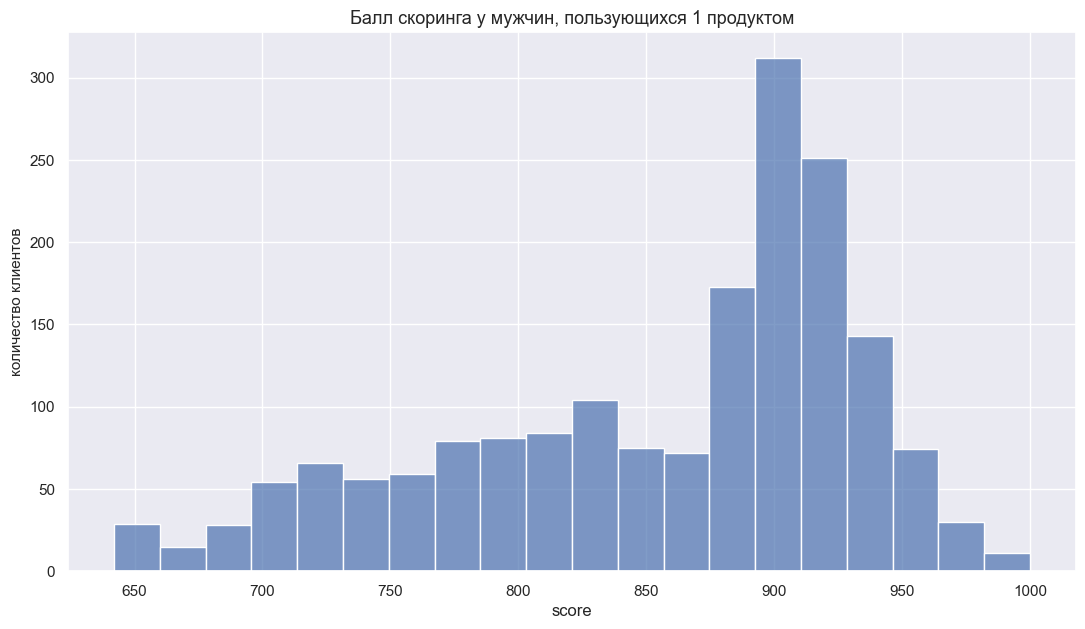

In [72]:
plt.figure(figsize=(13,7))
sns.histplot(data = data.query('products == 1 and gender == "male"'), x = 'score', alpha = .7)
plt.title('Балл скоринга у мужчин, пользующихся 1 продуктом',fontsize = 13)
plt.xlabel('score')
plt.ylabel('количество клиентов', fontsize = 11)
plt.show()

У большинства клиентов балл кредитного скоринга в интервале 870 - 930

In [73]:
segment_one = data.query('products == 1 and gender == "male" and score > 870 and score < 930')
print('Размер сегмента:', len(segment_one))

Размер сегмента: 769


In [74]:
(segment_one.groupby('products').agg({
     'gender': pd.Series.mode,
     'age':'mean',
     'balance':'median',
     'credit_card':'mean',
     'score':'mean',
     'equity':'mean',
     'churn':'mean',
     })
 .round(2)
 .T
)

products             1
gender            male
age              39.43
balance      746308.92
credit_card       0.82
score           902.48
equity             0.8
churn             0.06

Самый лояльный сегмент - отток 6%. Мужчины с одним продуктом банка, у большинства имеется кредитная карта. Средний возраст 39-40 лет, средний балл скоринга - 902, средний балл собственности - 1. Медианный баланс на счете ~750 тысяч.  

**Рекомендации для первого сегмента**  

Клиенты данной группы самые лояльные, поэтому выделять крупные рекламные бюджеты было бы нецелесообразно. Мы бы рекомендовали ввести внутренние метрики по активности и удовлетворенности клиентов, отслеживать их ежемесячно и оперативно реагировать на все изменения. Главным триггером для изменения маркетинговой политики данного сегмента будет являться снижение уровня лояльности.

**Второй сегмент**  

Отбираем по основным признакам: пол - женский, количество продуктов - 2, для остальных границ построим распределения признаков возраст, балл собственности и балл скоринга.

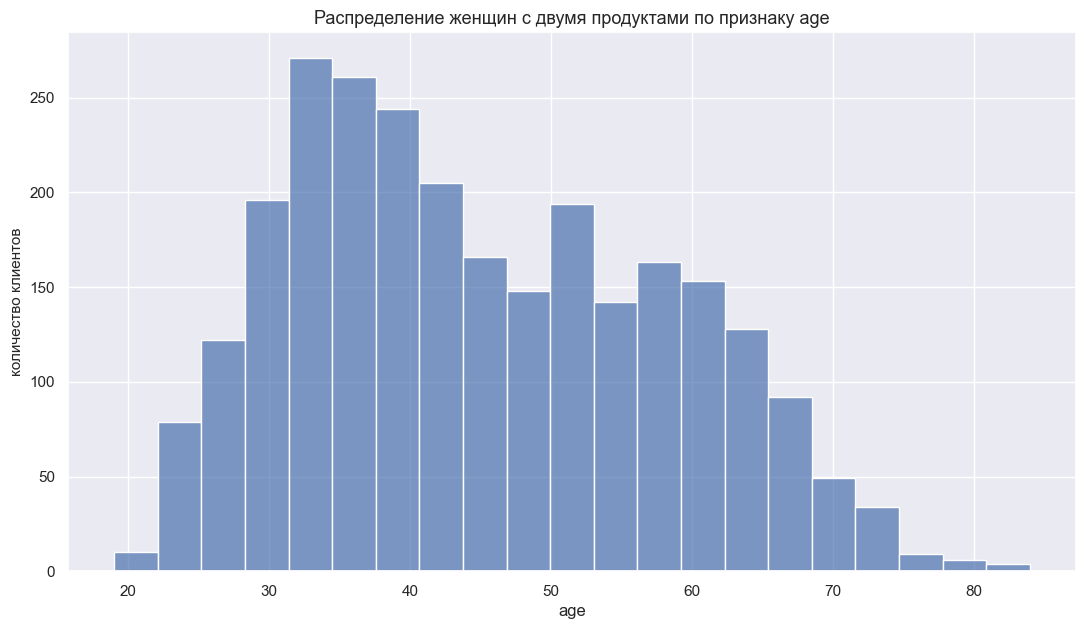

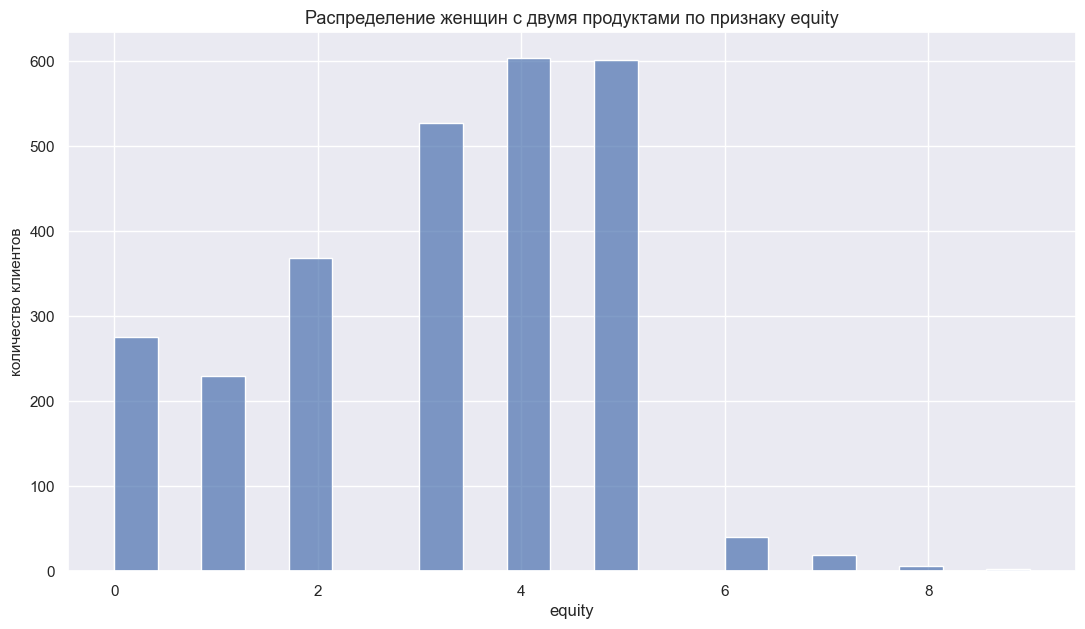

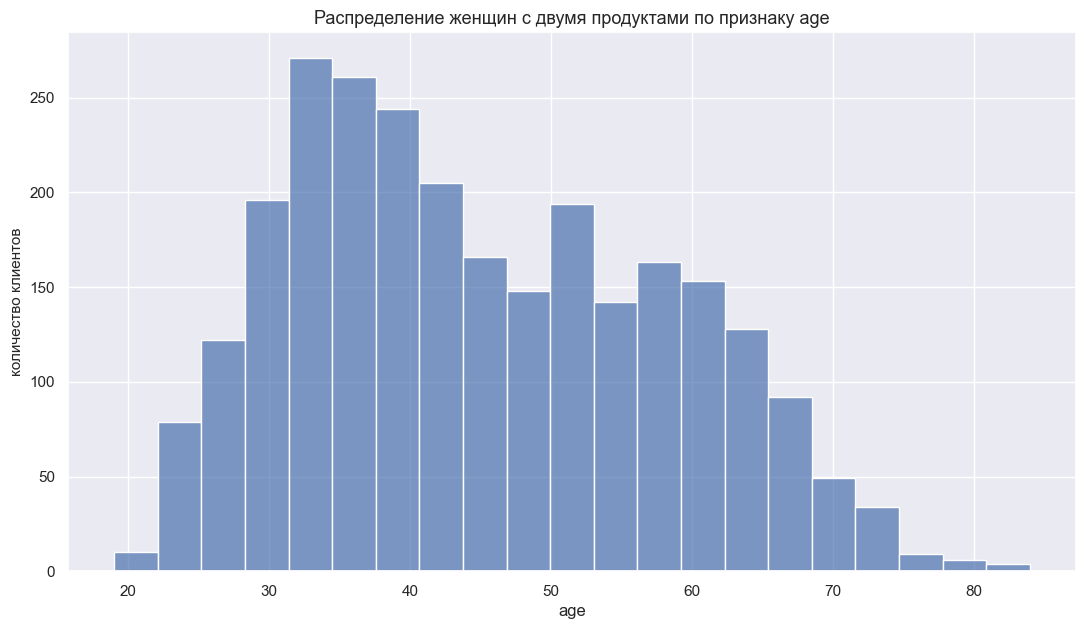

In [75]:
for column in ['age', 'equity', 'age']:
    plt.figure(figsize=(13,7))
    sns.histplot(data = data.query('products == 2 and gender == "female"'), x = column, alpha = .7)
    plt.title(f'Распределение женщин с двумя продуктами по признаку {column}',fontsize = 13)
    plt.xlabel(column)
    plt.ylabel('количество клиентов', fontsize = 11)
plt.show()

Категория клиентов с двумя продуктами изначально была самая многочисленная (более 5 тысяч), чтобы сделать более компактный сегмент отфильтруем значения по баллам собственности и скорингу.

In [76]:
segment_two = data.query('products == 2 and gender == "female" and equity >= 3 and equity < 6 and score > 800 and score < 900')
print('Размер сегмента:', len(segment_two))

Размер сегмента: 1088


In [77]:
(segment_two.groupby('products').agg({
     'gender': pd.Series.mode,
     'age':'mean',
     'balance':'median',
     'credit_card':'mean',
     'score':'mean',
     'equity':'mean',
     'churn':'mean',
     })
 .round(2)
 .T
)

products             2
gender          female
age              45.06
balance      598224.68
credit_card       0.54
score            850.8
equity            4.03
churn             0.18

Отток второго сегмента равен среднему оттоку по банку - 18%. Женщины, пользующиеся двумя продуктами банка, средний возраст 45 лет, медианный баланс на счете ~ 600 тысяч. Половина клиентов пользуется кредитной картой. Средний балл скоринга - 850, средний балл собственности 4.  

**Рекомендации для второго сегмента**  

Позицию данных клиентов мы бы охарактеризовали как пограничную - процент оттока равен среднему оттоку по банку и клиенты могут как стать более лояльными, так и уйти в сторону оттока. Главной задачей маркетологов в данном случае будет не допустить увеличение процента оттока, а удержать его на имеющемся уровне как минимум. Для данной группы мы бы рекомендовали проводить опросы/анкетирование клиентов для выявления потребностей и повышения уровня лояльности. 

**Третий сегмент**  

Женщины, пользующиеся тремя продуктами банка

In [78]:
segment_three = data.query('products == 3 and gender == "female"')
print('Размер сегмента:', len(segment_three))

Размер сегмента: 591


In [79]:
(segment_three.groupby('products').agg({
     'gender': pd.Series.mode,
     'age':'mean',
     'balance':'median',
     'credit_card':'mean',
     'score':'mean',
     'equity':'mean',
     'churn':'mean',
     })
 .round(2)
 .T
)

products            3
gender         female
age             48.34
balance      656184.0
credit_card       0.3
score          836.46
equity           3.41
churn            0.21

Женщины, пользующиеся тремя продуктами банка, отток составляет 21%, что превышает средний показатель по банку. Средний возраст вырос - 48 лет, медианный баланс на счете ~ 660 тысяч. Средний кредитный балл - 836, балл собственности - 3+. Кредитная карта имеется только у 30 % клиентов.  

**Рекомендации для третьего сегмента**  

В данной группе процент оттока превышает средний показатель по банку, соответственно необходимо проанализировать поведение клиентов и выявить их потребности, для этого мы также рекомендовали бы провести анкетирование с целью получения обратной связи. Процент пользования кредитной картой составляет 30%, что значительно ниже показателя по банку (68%), в связи с этим проанализировать возможность предоставления более выгодных условий для данного сегмента, например конкурентные условия по кредитованию, индивидуальные продукты, пробный период премиального обслуживания.

**Четвертый сегмент**  

Мужчины, использующие более 4х продуктов банка

In [80]:
segment_four = data.query('products > 3 and gender == "male"')
print('Размер сегмента:', len(segment_four))

Размер сегмента: 305


In [81]:
(segment_four.groupby('products').agg({
     'gender': pd.Series.mode,
     'age':'mean',
     'balance':'median',
     'credit_card':'mean',
     'score':'mean',
     'equity':'mean',
     'churn':'mean',
     })
 .round(2)
 .T
)

products             4          5
gender            male       male
age               38.7       37.4
balance      892522.19  597268.19
credit_card       0.74        1.0
score           876.79      862.8
equity            4.27        4.2
churn             0.68        0.5

Самый молодой сегмент клиентов, показывающий самый высокий процент оттока - более 50%. Мужчины, пользуются 4 и 5 продуктами банка, средний возраст 37-38 лет. Медианные показатели баланса на счете различаются у мужчин в 4 и с 5ю продуктами, если вывести среднее, то оно значительно превышает показатели балансов клиентов из других сегментов. Практически у всех клиентов имеется кредитная карта. Средний балл кредитного скоринга 862-877, балл собственности - 4.  

**Рекомендации для четвертого сегмента**  

Молодая и динамичная группа, вероятно следящая за конкурентами и трендами из чего следует высокий показатель оттока. Данный сегмент является высококонкурентным и чувствительным к условиям, поэтому перед выделением маркетинговых бюджетов, мы бы порекомендовали проанализировать прибыльность данного сегмента для банка, т.к. если по клиенту наблюдается отрицательная экономическая прибыльность, то банк не проводит мероприятия по его сохранению. С другой стороны мы бы рекомендовали добавить сервис персонального обслуживания (персональный менеджер, комната обслуживания и иные привилегии), т.к. несмотря на более высокие расходы это позволяет повысить лояльность клиентов.

## Шаг 6. Итоговые выводы и рекомендации

На основании полученных данных мы проанализировали информацию о клиентах регионального банка провели исследование по количеству используемых продуктов банка и по оттоку клиентов.  

Основные выводы:
- **Портрет клиента** Чаще других клинтами банка становятся пользователи в возрасте от 32-37 лет из города Ярославль. Самые высокие показатели медианного баланса у клиентов без кредитной карты (более 600 тысяч), клиентов с баллом собственности 5 (более 800 тысяч) и количеством продуктов 4 (более 800 тысяч). Клиенты в возрасте более 60 лет также обладают самым высоким медианным показателем баланса на счете. По количеству продуктов банка больше всего клиентов с двумя продуктами (51%), на втором месте клиенты с одним продуктом - 33%. Как по количеству клиентов, так и по медианным показателям баланса и дохода разницы между мужчинами и женщинами не наблюдается.
- **Кредитная карта** Кредитная карта является востребованным продуктом банка (68% всех клиентов). Чаще других кредитная карта была выдана клиентам из Ярославля (72%), мужчинам (74%), клиентам в возрасте до 40 лет, баллом кредитного скоринга до 800 и клиентам с балансом на счете до 500 тысяч. Здесь стоит отметить, что среди клиентов, у которых 2 или 4 продукта банка, чуть более 30% не обладают кредитной картой, а среди клиентов с тремя продуктами у 64% пользователей кредитная карта отсутствует.  
- **Количество продуктов** С увеличением количества продуктов растет среднее значение баланса на счете и количество баллов собственности, также растет процент оттока клиентов, максимальное значение 63% у клиентов с 4 продуктами. Самый высокий средний оценочный доход у клиентов с одним продуктом, самый низкий - клиенты с 3 продуктами. У всех клиентов с 5 продуктами есть кредитная карта, у клиентов с тремя продуктами в большей степени кредитная карта отсутствует. 
- **Портрет клиента, попадающего в отток** Чаще других в отток попадают клиенты с балансом на счете более 700 тысяч и с оценочным доходом более 100 тысяч, в возрасте до 35 лет и в интервале 50-60 лет. У клиентов с баллом сотственности от 3 и количеством продуктом от 2х процент оттока увеличивается. Также больший процент оттока наблюдается у клиентов без кредитной карты и у более активных клиентов. Мужчины чаще попадают в отток чем женщины. Город проживания клиента практически не влияет на отток 
- **Корреляционный анализ:** 
    - матрица корреляции Спирмена выявила умеренную взаимосвязь целевого признака количество продуктов (products) и балл собственности (equity) - 0.46, и у признака отток (churn) с признаками балл собственности (equity) - 0.27 и количество продуктов (products) - 0.27
    - матрица корреляции phik - сильные взаимосвязи видны между признаками балл кредитного скоринга (score) и количество продуктов (products) - 0.42, количество продуктов (products) и балл собственности (equity) - 0.58. У целевого признака оттока (churn) можно отметить признаки: балл кредитного скоринга (score) - 0.23, балл собственности (equity) - 0.35 и количество продуктов (products) - 0.26
- **Проверка статистических гипотез:**
    - Гипотеза 1. Возраст клиентов, пользующихся одним продуктом равен возрасту клиентов, пользующихся двумя продуктами.  
    `Гипотеза подтвердилась.` Среднее значение возраста клиентов, пользующихся одним и двумя продуктами - 42 года.
    - Гипотеза 2. Оценочный доход клиентов, пользующихся одним продуктом равен оценочному доходу клиентов, пользующихся двумя продуктами.  
    `Гипотеза подтвердилась.` Средние показатели дохода по группам составили 120 и 123 тысячи. 
    - Гипотеза 3 . Баланс клиентов, определенных в отток равен балансу оставшихся клиентов.  
    `Гипотеза не подтвердилась.` Средние значения сильно различаются. Среднее значение баланса лояльных клиентов ~ 733 тысячи, среднее значение баланса отточных клиентов ~ 1 млн. 134 тысячи.
    - Гипотеза 4. Доли оттока среди мужчин с кредитной картой и без равны.  
    `Гипотеза не подтвердилась.` Мужчины без кредитной карты чаще попадали в отток чем мужчины-держатели данного продукта (42% против 27%).  
- **Сегментация клиентов по количеству используемых продуктов:** 
    - **Первый сегмент** (размер 769). Самый лояльный сегмент - отток 8%. Мужчины с одним продуктом банка у большинства имеется кредитная карта. Средний возраст 39-40 лет, средний балл скоринга - 902, средний балл собственности - 1. Медианный баланс на счете ~750 тысяч.  
    `Рекомендации`. Клиенты данной группы самые лояльные, поэтому выделять крупные рекламные бюджеты было бы нецелесообразно. Мы бы рекомендовали ввести внутренние метрики по активности и удовлетворенности клиентов, отслеживать их ежемесячно и оперативно реагировать на все изменения. Главным триггером для изменения маркетинговой политики данного сегмента будет являться снижение уровня лояльности.
    - **Второй сегмент** (размер 1088). Отток второго сегмента равен среднему оттоку по банку - 18%. Женщины, пользующиеся двумя продуктами банка, средний возраст 45 лет, медианный баланс на счете ~ 600 тысяч. Половина клиентов пользуется кредитной картой. Средний балл скоринга - 850, средний балл собственности 4.  
    `Рекомендации`. Позицию данных клиентов мы бы охарактеризовали как пограницную - процент оттока равен среднему оттоку по банку и клиенты могут как стать более лояльными, так и уйти в сторону оттока. Главной задачей маркетологов в данном случае будет не допустить увеличение процента оттока, а удержать его на имеющемся уровне как минимум. Для данной группы мы бы рекомендовали проводить опросы/анкетирование клиентов для выявления потребностей и повышения уровня лояльности.
    - **Третий сегмент** (размер 591). Женщины, пользующиеся тремя продуктами банка, отток составляет 21%, что превышает средний показатель по банку. Средний возраст вырос - 48 лет, медианный баланс на счете ~ 660 тысяч. Средний кредитный балл - 836, балл собственности - 3+. Кредитная карта имеется только у 30 % клиентов.  
    `Рекомендации`. В данной группе процент оттока превышает средний показатель по банку, соотвественно необходимо проанализировать поведение клиентов и выявить их потребности, для этого мы также рекомендовали бы провести анкетирование с целью получения обратной связи. Процент пользования кредитной картой составляет 30%, что значительно ниже показателя по банку (68%), в связи с этим проанализировать возможность предоставления более выгодных условий для данного сегмента, например конкурентные условия по кредитованию, индивидуальные продукты, пробный период премиального обслуживания.
    - **Четвертый сегмент** (размер 305). Самый молодой сегмент клиентов, показывающий самый высокий процент оттока - более 50%. Мужчины, пользуются 4 и 5 продуктами банка, средний возраст 37-38 лет. Медианные показатели баланса на счете различаются у мужчин в 4 и с 5ю продуктами, если вывести среднее, то оно значительно превышает показатели балансов клиентов из других сегментов. Практически у всех клиентов имеется кредитная карта. Средний балл кредитного скоринга 862-877, балл собственности - 4.  
    `Рекомендации`. Молодая и динамичная группа, вероятно следящая за конкурентами и трендами из чего следует высокий показатель оттока. Данный сегмент является высококонкурентным и чувствительным к условиям, поэтому перед выделением маргетинговых бюджетов, мы бы порекомендовали проанализировать прибыльность данного сегмента для банка, т.к. если по клиенту наблюдается отрицательная экономическая прибыльность, то банк не проводит мероприятия по его сохранению. С другой стороны мы бы рекомендовали добавить сервис персонального обслуживания (персональный менеждер, комната обслуживания и иные привилегии), т.к. несмотря на более высокие расходы это позволяет повысить лояльность клиентов.